In [79]:
# Modules to be imported
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rcParams
import seaborn as sb
import numpy as np
import datetime
from datetime import datetime
from pptx import Presentation
from pptx.util import Inches
from pathlib import Path
start = datetime.now()

In [80]:
strain = "Micrococcus Luteus"

In [81]:
layoutpath = "C:/Users/j4mes/Jupyter/Microbiology Test/Lipid Experiment Plate Layout.csv"
plate_layout = pd.read_csv(layoutpath, index_col = 0)
plate_layout = pd.DataFrame(data=plate_layout, index=plate_layout.index)

In [82]:
# Load data
data_path = "C:/Users/j4mes/Jupyter/Microbiology Test/22_07_08 M_Luteus Lipids 48h (PR2).csv"
raw_data = pd.read_csv(data_path, index_col=0, encoding = 'unicode_escape')

In [83]:
# Removes the temperature column
data = raw_data.drop(["T° 600"], axis=1)

In [84]:
# What do: key = sample name, value 1 = conecntration, value 2 = locations

info_dict = {}

# range is 8 rather than 12 because iloc works on rows
for x in range(8):
    for cell in plate_layout.iloc[x]:
        if "," in cell:
            key = cell[:cell.index("(")-1]
            info_dict[key] = [cell[cell.index("(")+1:cell.index(",")], cell[cell.index(",")+2:cell.index(")")]]
            
        else:
            key = cell[:cell.index("(")-1] 
            info_dict[key] = ["N/A", cell[cell.index("(")+1:cell.index(")")]]
                   

sample_df = pd.DataFrame(data=info_dict)
sample_df = sample_df.transpose()
sample_df.columns = ["Conc.", "Location"]

def sample_search(term):
    a = dict((key, info_dict[key]) for key in info_dict.keys() if term in key) 
    b = pd.DataFrame(data=a)
    b = b.transpose()
    b.columns = ["Conc.", "Location"]
    print(b)

def cell_search(cell_list):
    for cell in cell_list:
        c = [sample_df.iloc[x] for x in range(len(sample_df.index)) if cell == sample_df.iloc[x][1]]
    d = pd.DataFrame(data=c)
    print(d)

In [85]:
blank_dict = {
    plate_layout.iloc[6][11]: data['G12'], 
    plate_layout.iloc[7][11]: data['H12']
}

blank = pd.DataFrame(data=blank_dict, index=data.index)
blank_mean = [blank.iloc[x].mean(axis=0) for x in range(0, len(blank), 1)]
blank_correction = [(blank_mean[x] - blank_mean[x]) for x in range(0, len(blank), 1)]
blank_df = pd.DataFrame(data = blank_correction, index = data.index)
blank_df.columns = ["Blank"]

In [86]:
letter_dict = {
    "A": 0, "B": 1, "C": 2, "D": 3, "E": 4, "F": 5, "G": 6, "H": 7
}

In [87]:
ind_df_list = []
def create_basic_df(cell_list):
  df = pd.DataFrame(data=data[cell_list])
  df.columns = [(plate_layout.iloc[letter_dict[f"{cell[0]}"]][(int(cell[1:]) - 1)]) for cell in cell_list]
  df.columns = [a.replace(f"{a[a.index(','):]}", ")") if "," in a else a[:a.index("(")] for a in df.columns]
  df["Mean"] = [df.iloc[x].mean(axis=0) for x in range(0, len(df), 1)]
  df["Corrected Mean"] = [(df["Mean"][x] - blank_mean[x]) for x in range(0, len(df), 1)]
  ind_df_list.append(df.iloc[:, :2])
  return df

In [88]:
one_low = create_basic_df(['A4', 'B4'])
one_medium = create_basic_df(['A3', 'B3'])
one_high = create_basic_df(['A2', 'B2'])
two_low = create_basic_df(['C4', 'D4'])
two_medium = create_basic_df(['C3', 'D3'])
two_high = create_basic_df(['C2', 'D2'])
three_low = create_basic_df(['E4', 'F4'])
three_medium = create_basic_df(['E3', 'F3'])
three_high = create_basic_df(['E2', 'F2'])
four_low = create_basic_df(['G4', 'H4'])
four_medium = create_basic_df(['G3', 'H3'])
four_high = create_basic_df(['G2', 'H2'])
five_low = create_basic_df(['A7', 'B7'])
five_medium = create_basic_df(['A6', 'B6'])
five_high = create_basic_df(['A5', 'B5'])
six_low = create_basic_df(['C7', 'D7'])
six_medium = create_basic_df(['C6', 'D6'])
six_high = create_basic_df(['C5', 'D5'])
seven_low = create_basic_df(['E7', 'F7'])
seven_medium = create_basic_df(['E6', 'F6'])
seven_high = create_basic_df(['E5', 'F5'])
eight_low = create_basic_df(['G7', 'H7'])
eight_medium = create_basic_df(['G6', 'H6'])
eight_high = create_basic_df(['G5', 'H5'])
nine_low = create_basic_df(['A10', 'B10'])
nine_medium = create_basic_df(['A9', 'B9'])
nine_high = create_basic_df(['A8', 'B8'])
ten_low = create_basic_df(['C8', 'D8'])
ten_medium = create_basic_df(['C9', 'D9'])
ten_high = create_basic_df(['C10', 'D10'])
eleven_low = create_basic_df(['E10', 'F10'])
eleven_medium = create_basic_df(['E9', 'F9'])
eleven_high = create_basic_df(['E8', 'F8'])
twelve_low = create_basic_df(['G10', 'H10'])
twelve_medium = create_basic_df(['G9', 'H9'])
twelve_high = create_basic_df(['G8', 'H8'])
thirteen_low = create_basic_df(['C11', 'D11'])
thirteen_medium = create_basic_df(['A12', 'B12'])
thirteen_high = create_basic_df(['A11', 'B11'])
fourteen_low = create_basic_df(['E12', 'F12'])
fourteen_medium = create_basic_df(['E11', 'F11'])
fourteen_high = create_basic_df(['C12', 'D12'])
control = create_basic_df(['A1', 'B1', 'C1', 'D1'])
vehicle = create_basic_df(['E1', 'F1', 'G1', 'H1'])
broth = create_basic_df(['G11', 'H11'])

In [89]:
controls_df = pd.concat([control.iloc[:, -1], vehicle.iloc[:, -1], broth.iloc[:, -1]], axis=1)
controls_df.columns = ["Control", "Vehicle", "Broth"]

In [90]:
# What this needs to do: take the corrected mean column from the relevant tables and create a new df containing
# them and the corrected mean from the control sample
means_list = []

def lipid_df(df_list):
  df = pd.DataFrame(data=[df["Corrected Mean"] for df in df_list])
  df = df.transpose()
  df.columns = [df.columns[0] for df in df_list]
  means_list.append(df)
  df1 = pd.concat([df, controls_df], axis = 1)
  return df1

In [91]:
one = lipid_df([one_low, one_medium, one_high])
two = lipid_df([two_low, two_medium, two_high])
three = lipid_df([three_low, three_medium, three_high])
four = lipid_df([four_low, four_medium, four_high])
five = lipid_df([five_low, five_medium, five_high])
six = lipid_df([six_low, six_medium, six_high])
seven = lipid_df([seven_low, seven_medium, seven_high])
eight = lipid_df([eight_low, eight_medium, eight_high])
nine = lipid_df([nine_low, nine_medium, nine_high])
ten = lipid_df([ten_low, ten_medium, ten_high])
eleven = lipid_df([eleven_low, eleven_medium, eleven_high])
twelve = lipid_df([twelve_low, twelve_medium, twelve_high])
thirteen = lipid_df([thirteen_low, thirteen_medium, thirteen_high])
fourteen = lipid_df([fourteen_low, fourteen_medium, fourteen_high])

In [92]:
means_df = pd.concat(means_list, axis = 1)
means_df = pd.concat([means_df, controls_df], axis = 1)
#means_df = means_df.iloc[:, :-3]
#means_df

In [93]:
# Export spreadsheets
with pd.ExcelWriter(f"{datetime.today().strftime('%y_%m_%d')} {strain} Averages.xlsx") as writer:
    means_df.to_excel(writer, sheet_name='Means')
    plate_layout.to_excel(writer, sheet_name='Plate Layout')
    raw_data.to_excel(writer, sheet_name="Raw Data")
    data.to_excel(writer, sheet_name="Processed Data")

In [94]:
graph_list = []

# Function to create instructions to print out a basic graph for each sub-group
def make_graph(title, df):
  graph = sb.lineplot(data=df, dashes=False, marker='o', ci=None)
  graph.set(title=f'{title}')
  graph.set_xticks(range(0, len(df.index), 4))
  plt.xticks(rotation=90)
  plt.legend(loc="upper left")
  rcParams['figure.figsize'] = 20, 8
  plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5])
  plt.rcParams['axes.facecolor']='white'
  plt.rcParams['savefig.facecolor']='white'
  graph.set(ylabel='Absorption (600nm)')
  graph
  
  plt.savefig(f'{title}.png', facecolor="white")  
  graph_list.append(f'{title}.png')

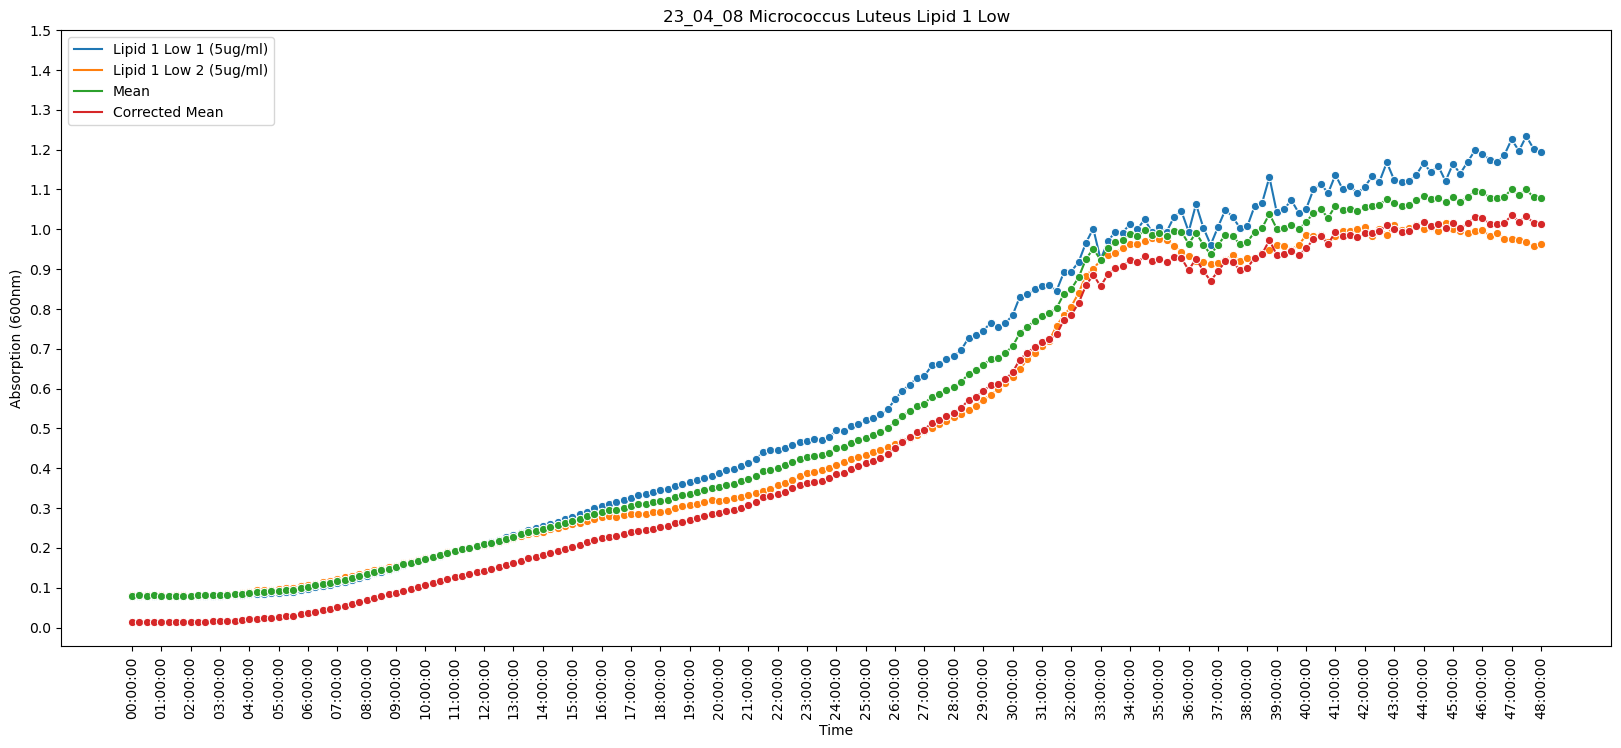

In [95]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 1 Low", one_low)

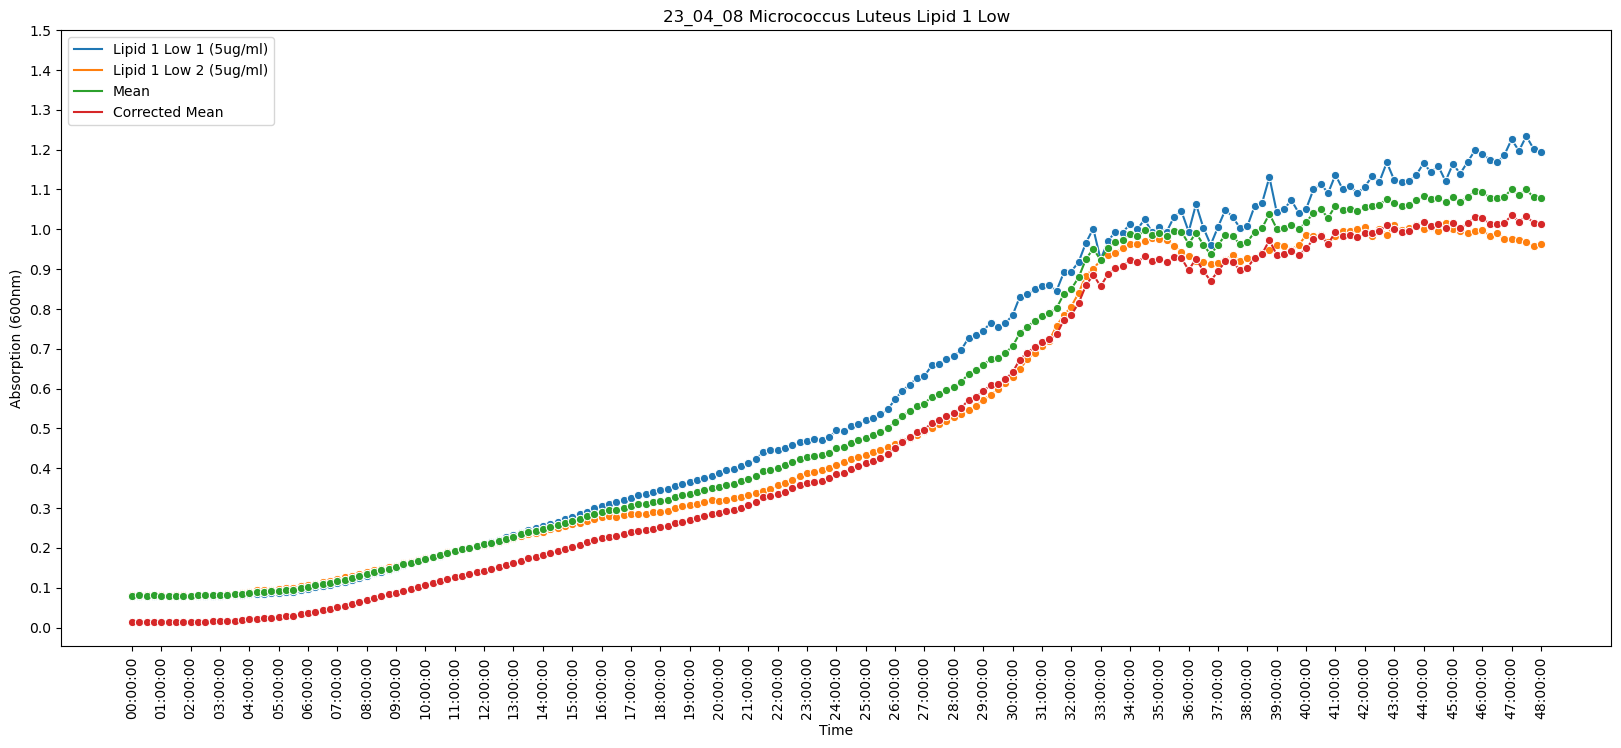

In [96]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 1 Low", one_low)

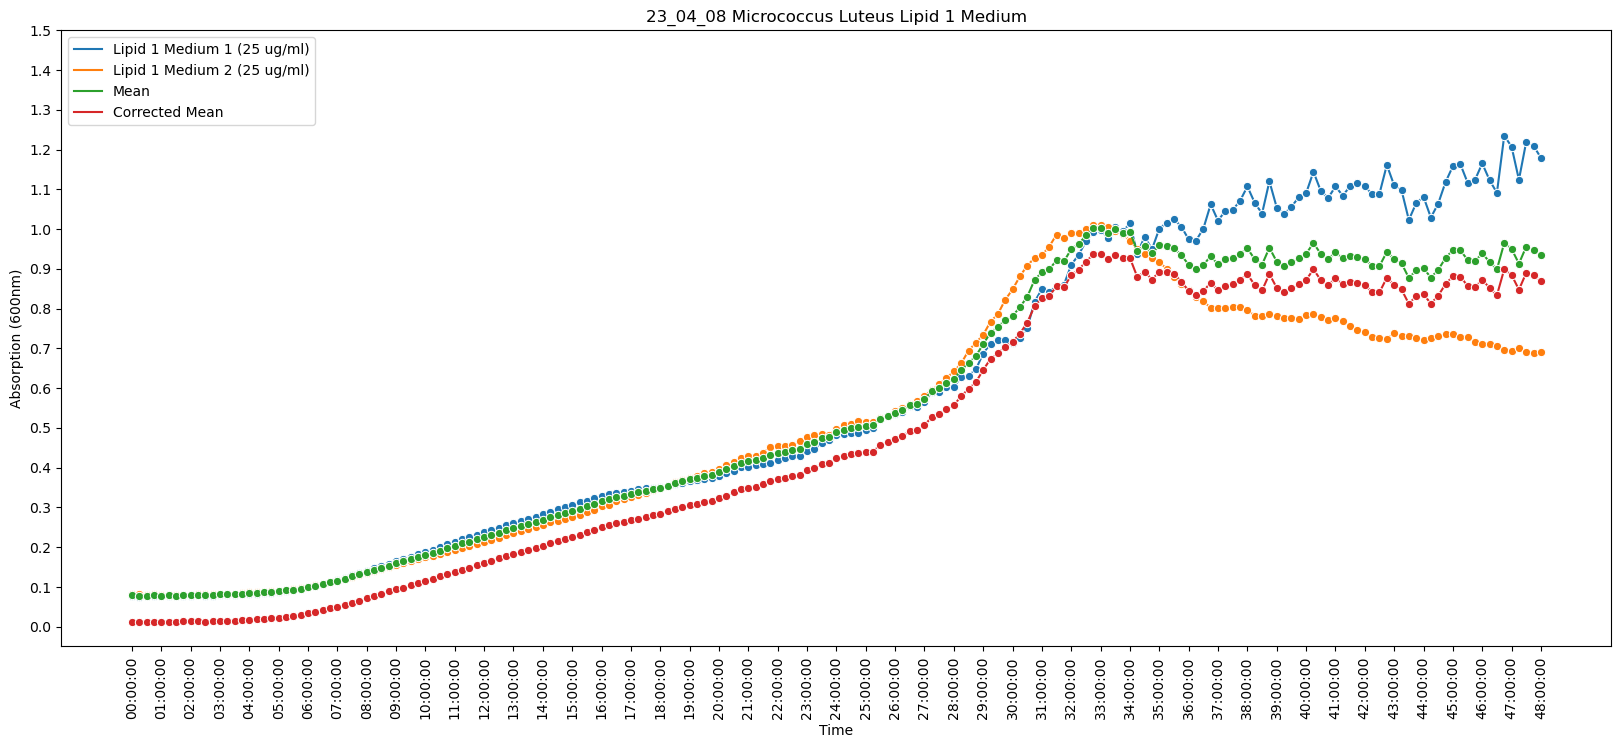

In [97]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 1 Medium", one_medium)

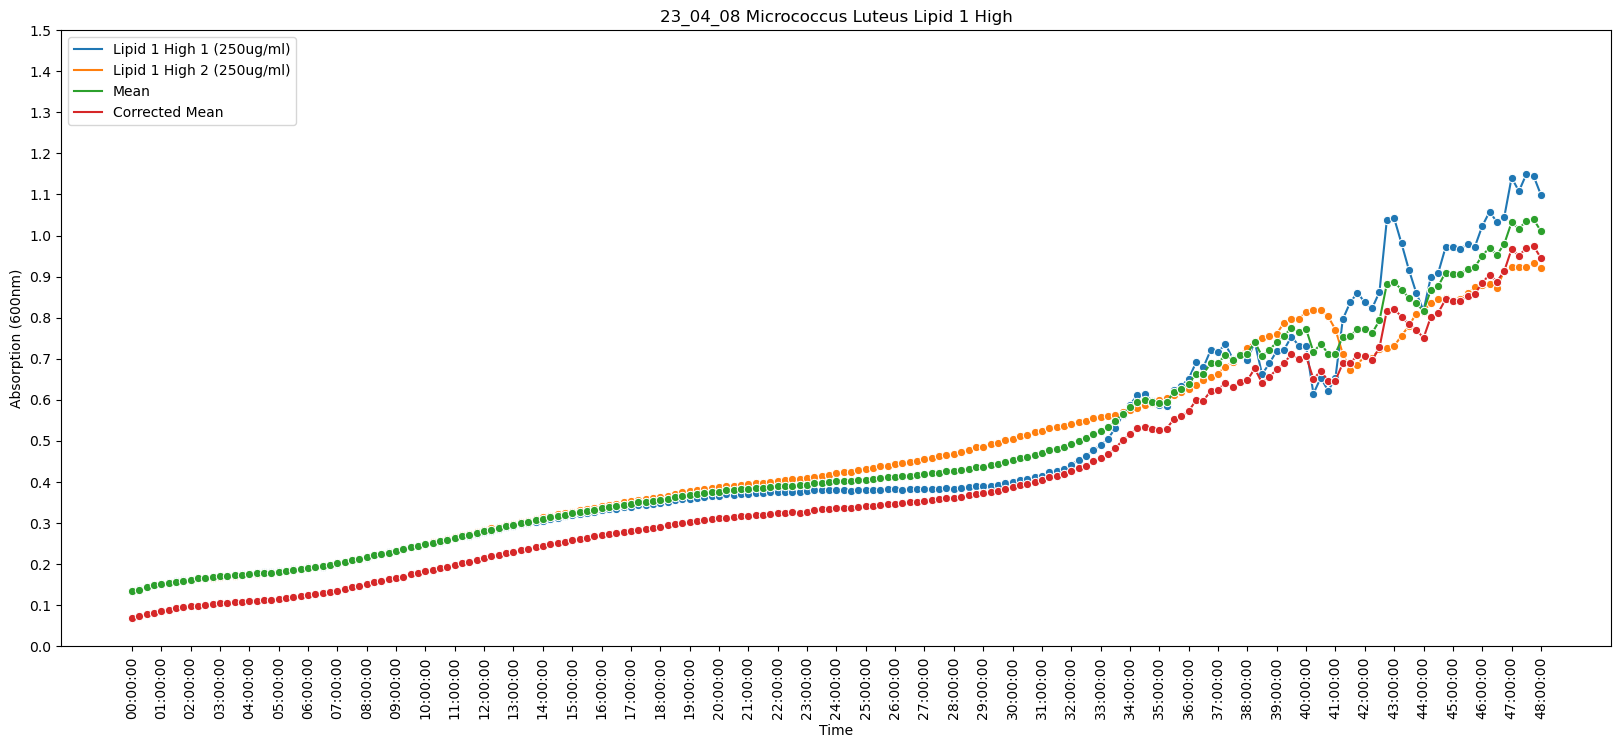

In [98]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 1 High", one_high)

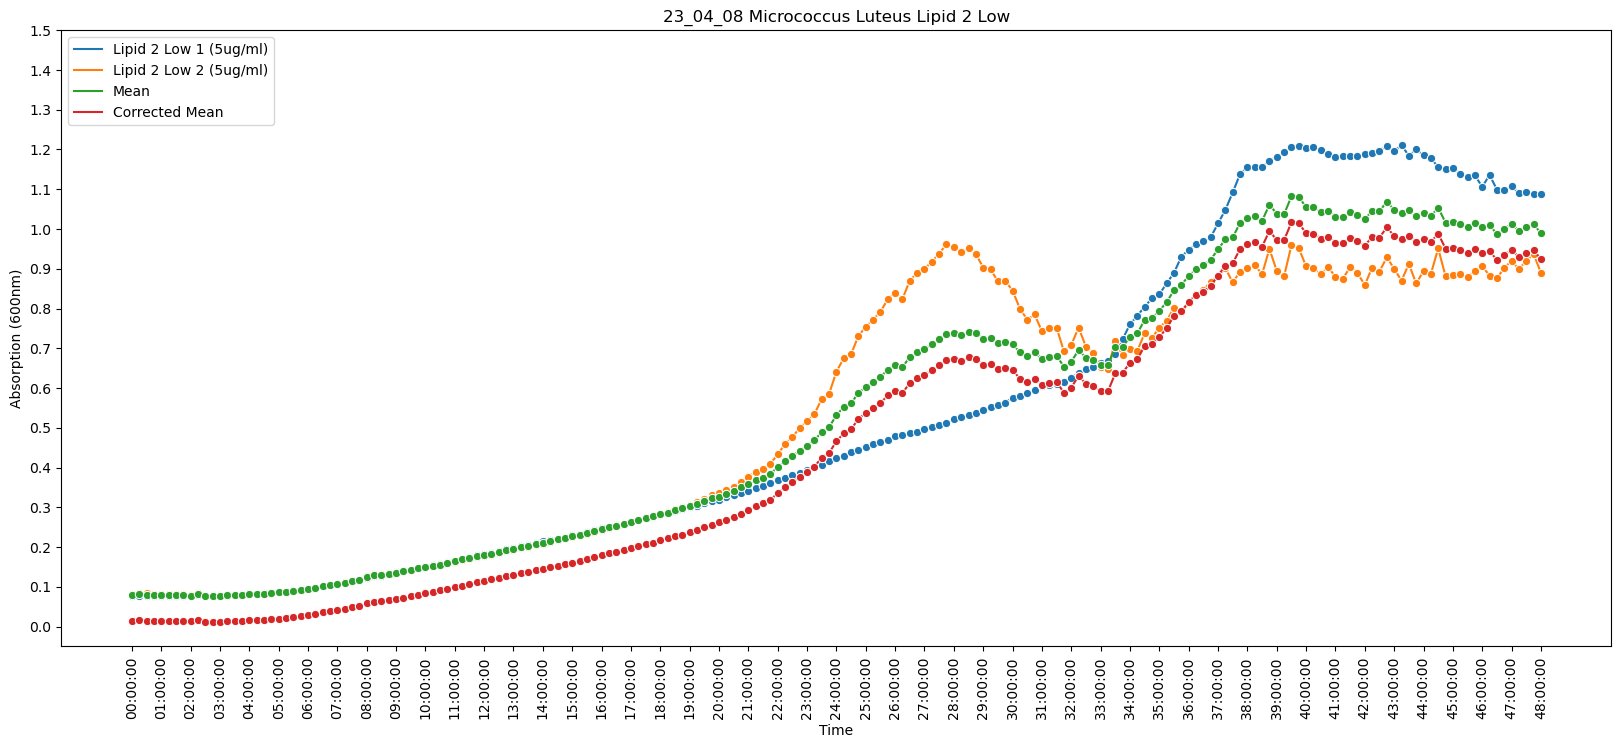

In [99]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 2 Low", two_low)

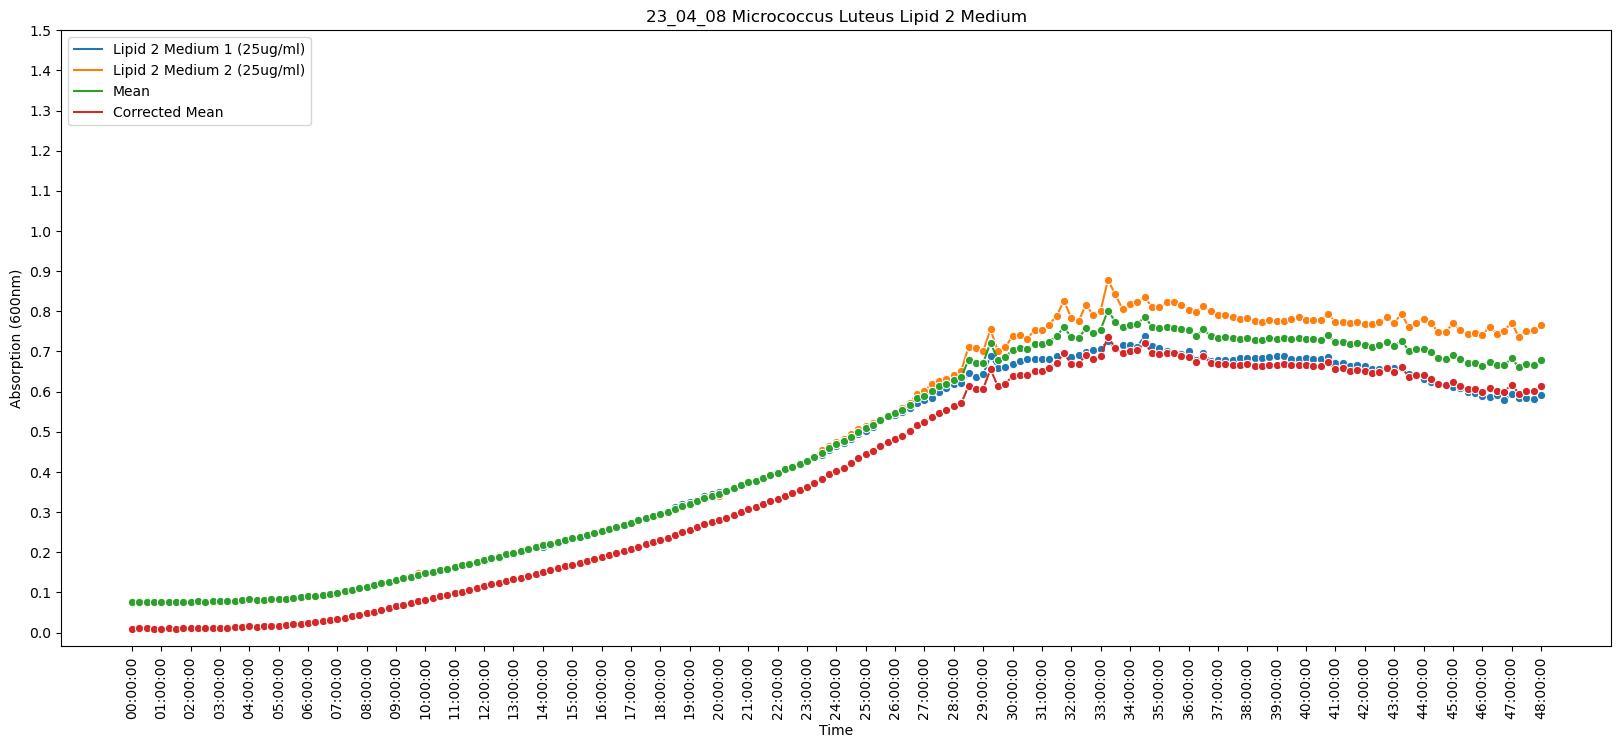

In [100]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 2 Medium", two_medium)

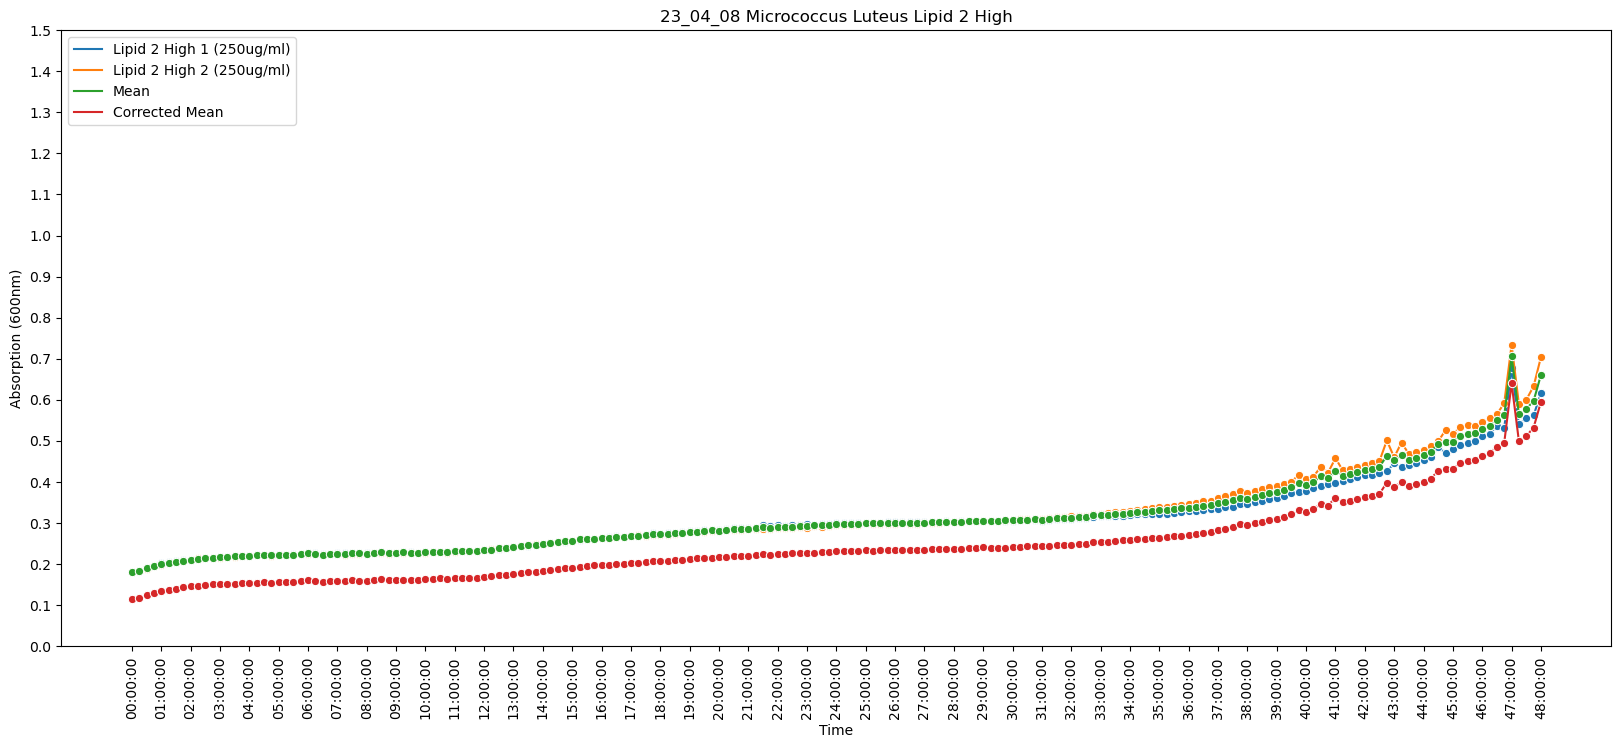

In [101]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 2 High", two_high)

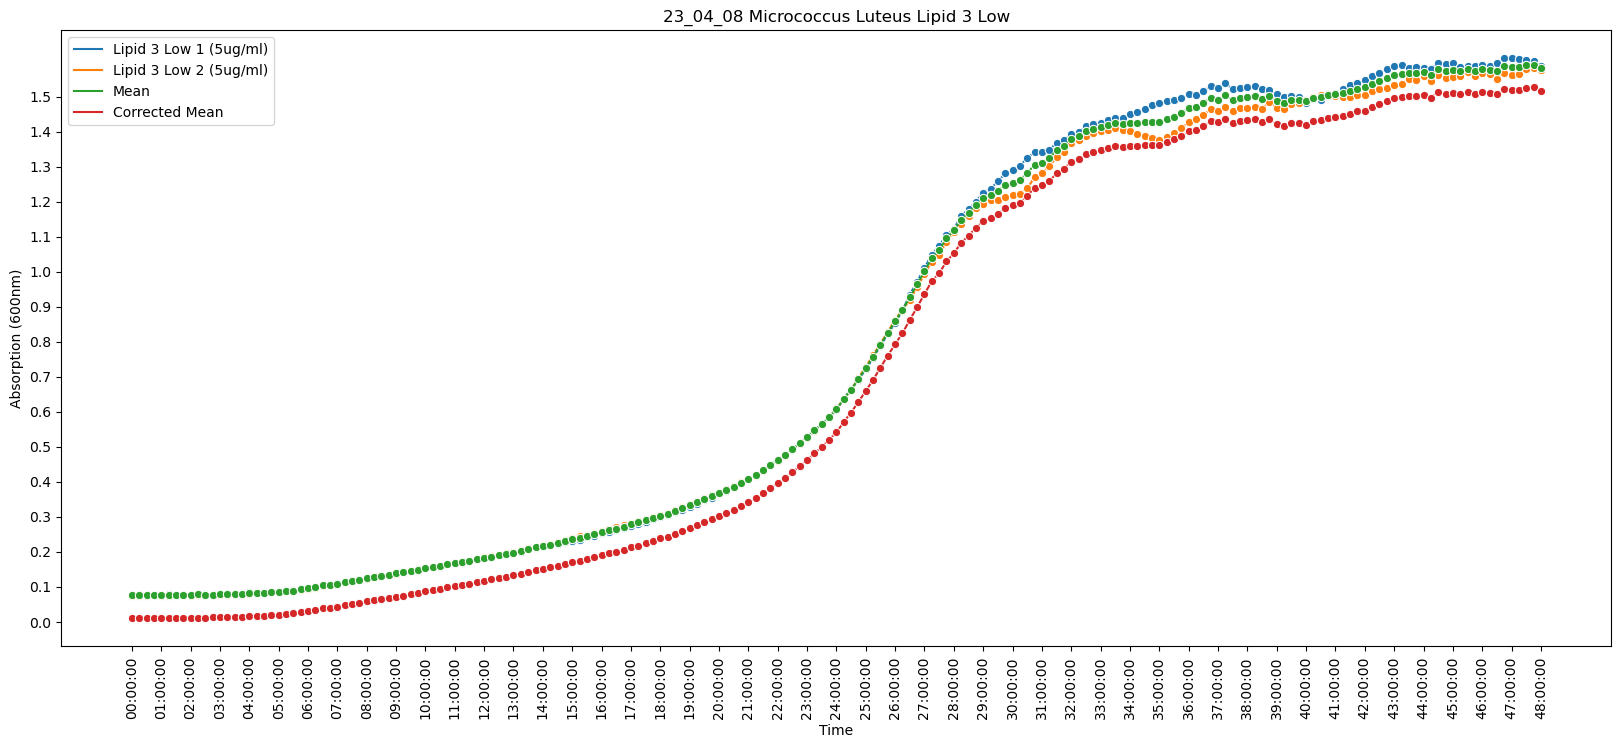

In [102]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 3 Low", three_low)

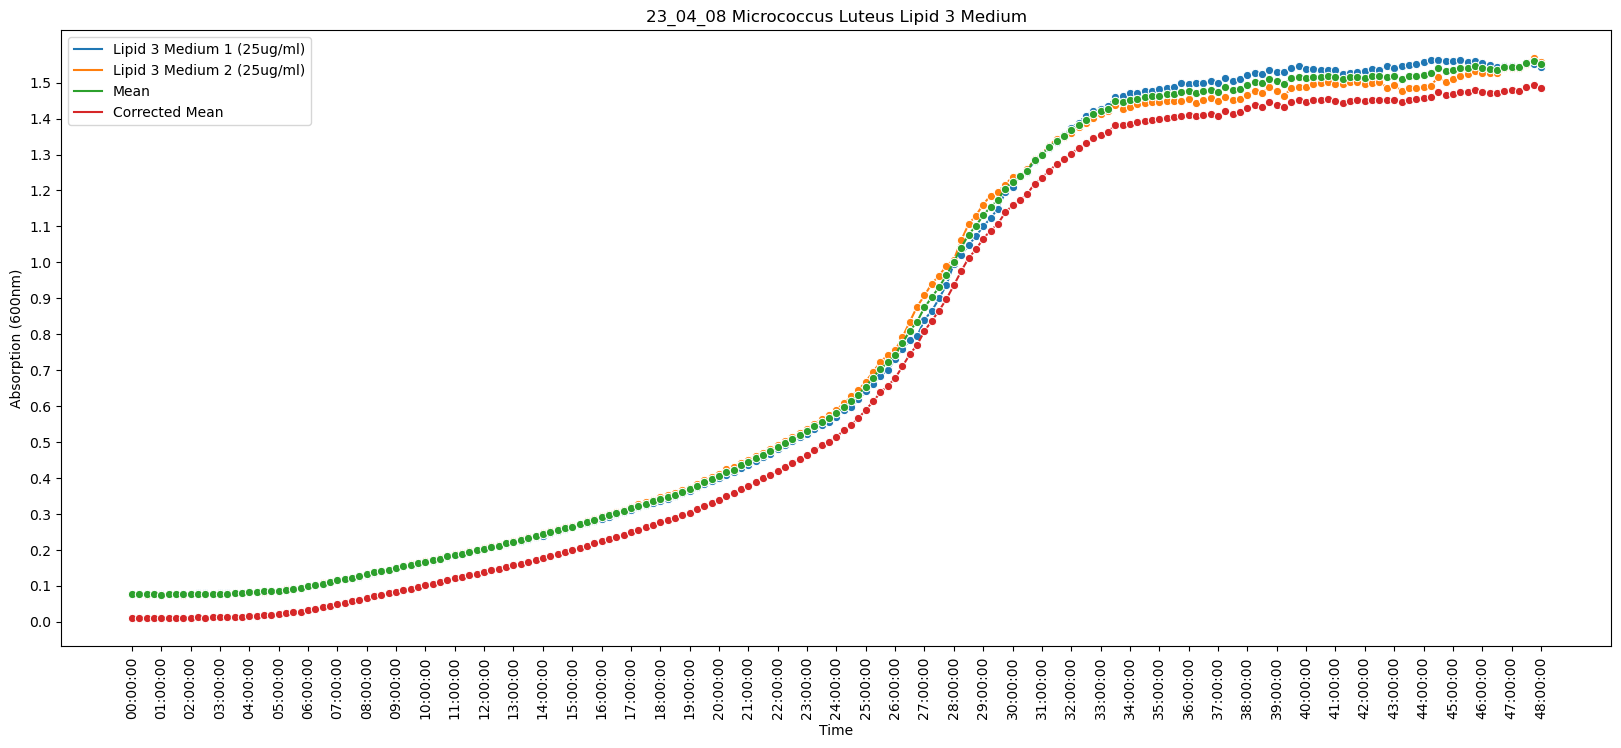

In [103]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 3 Medium", three_medium)

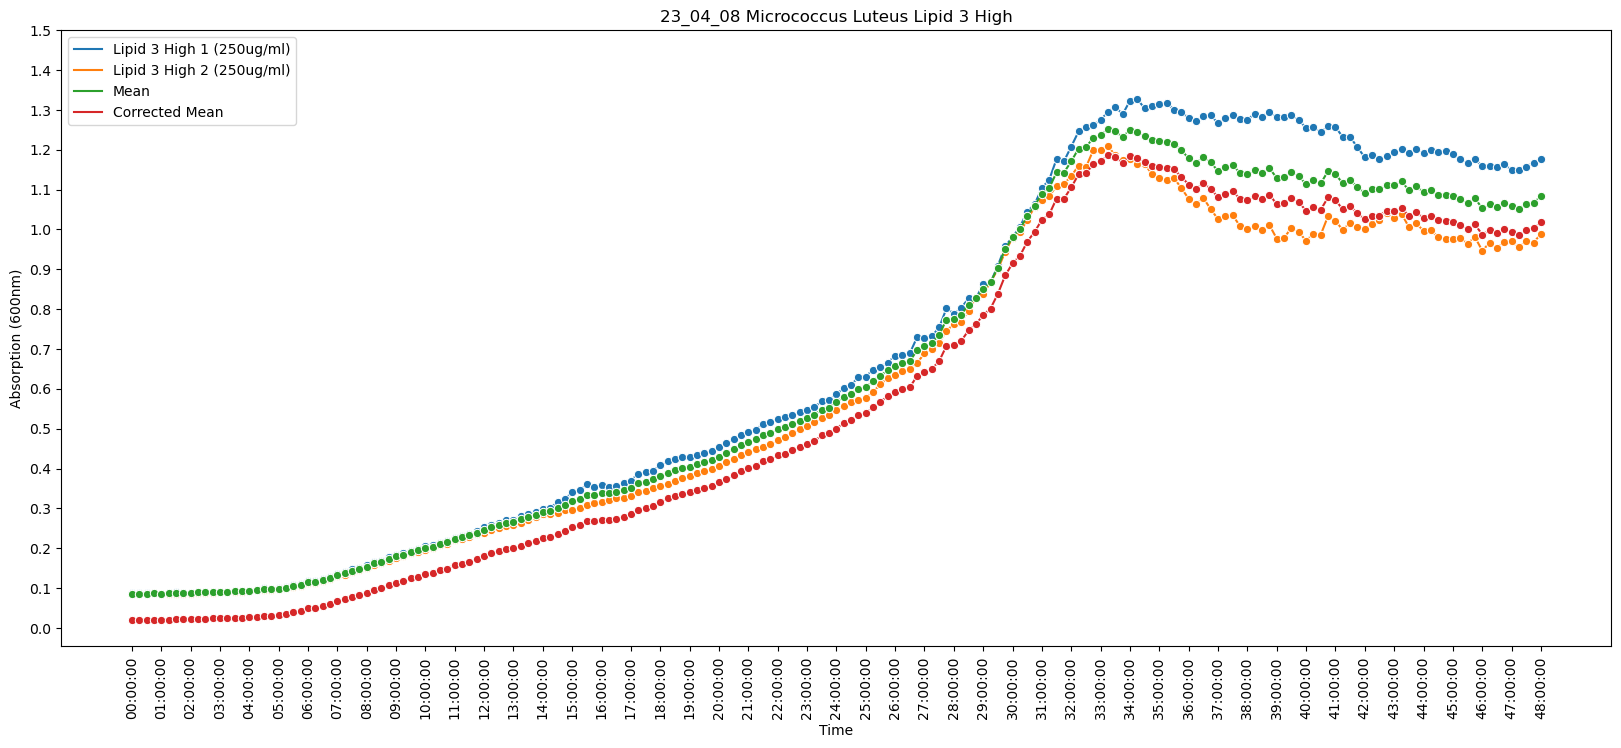

In [104]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 3 High", three_high)

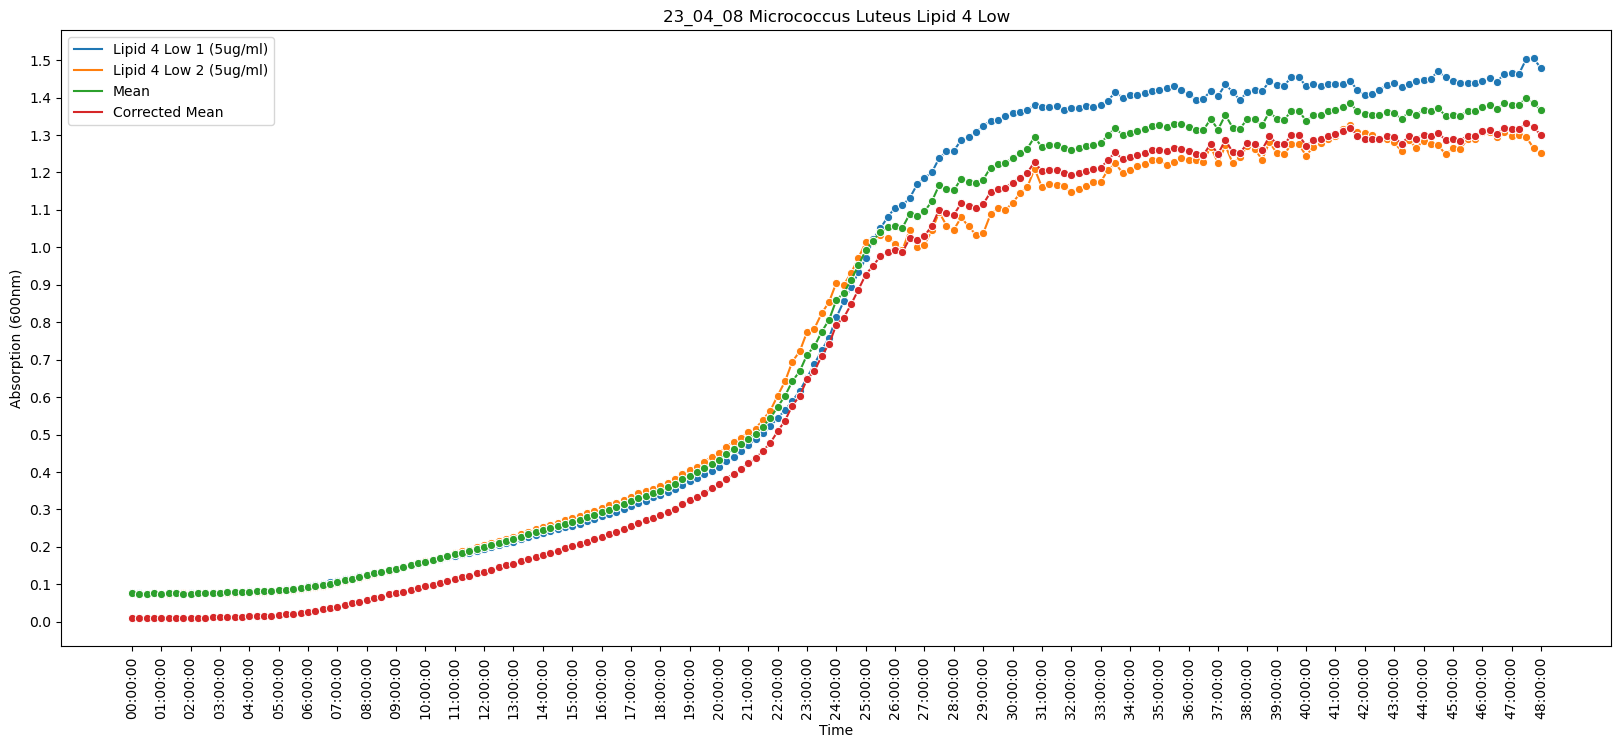

In [105]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 4 Low", four_low)

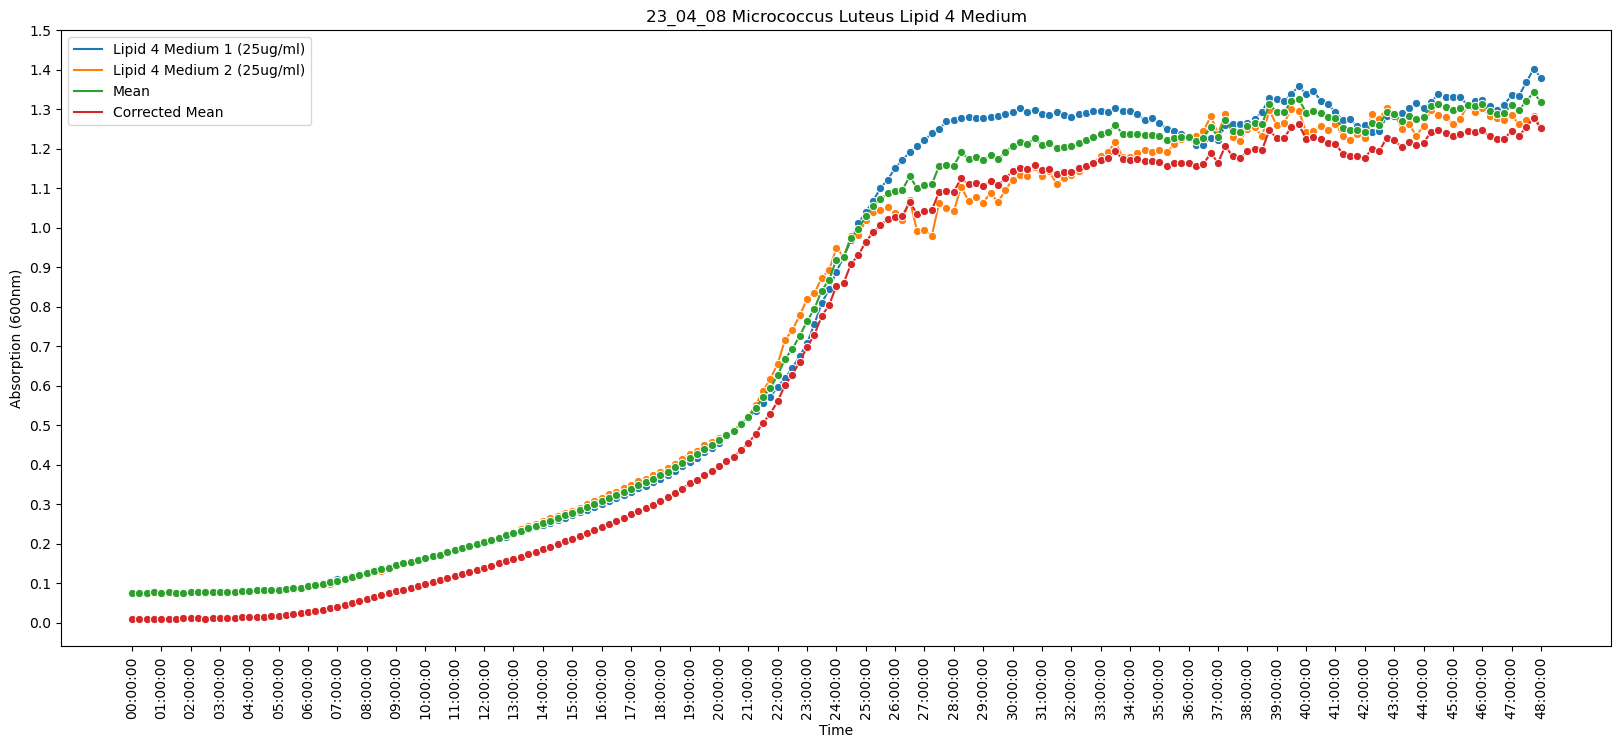

In [106]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 4 Medium", four_medium)

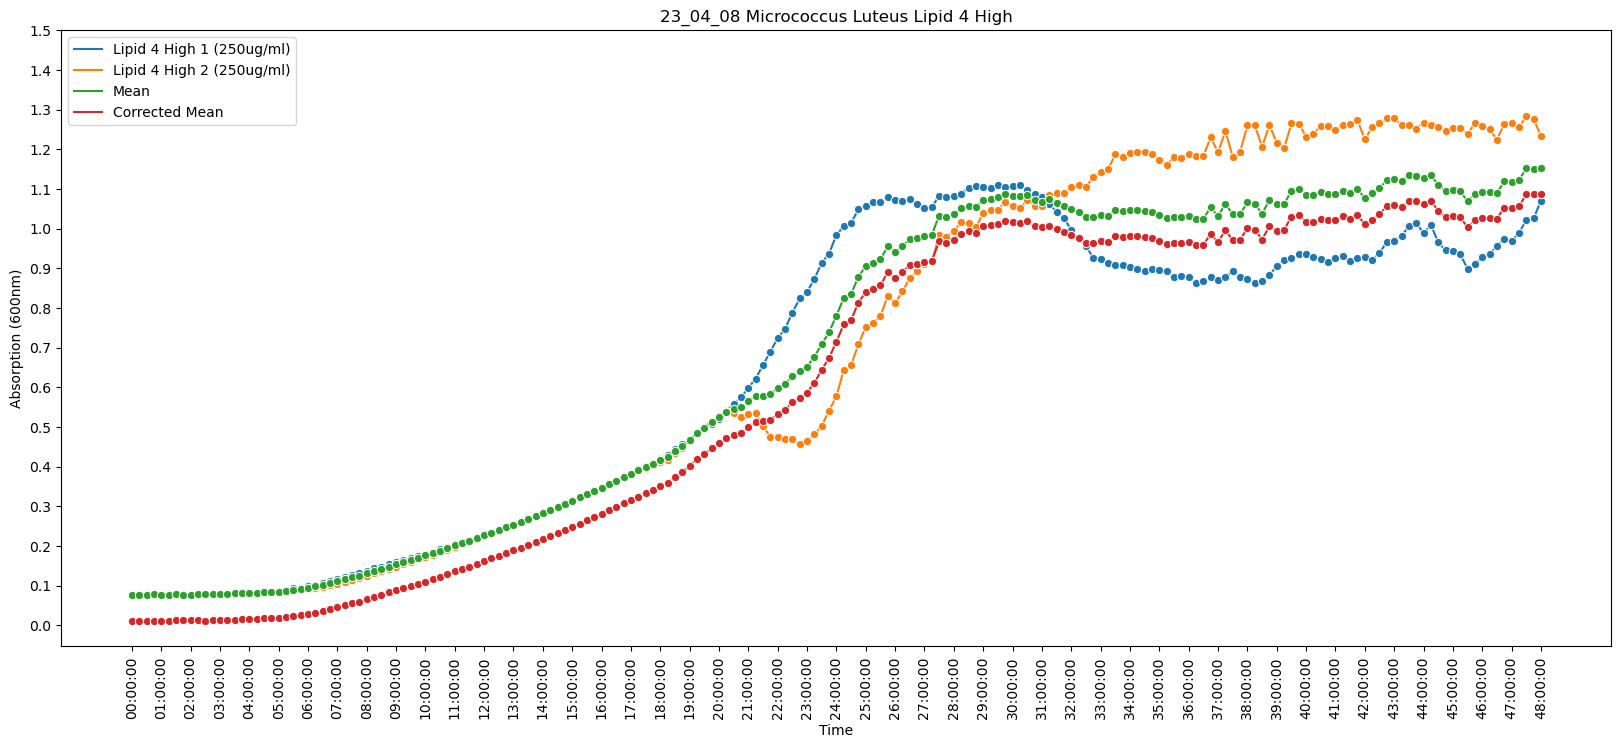

In [107]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 4 High", four_high)

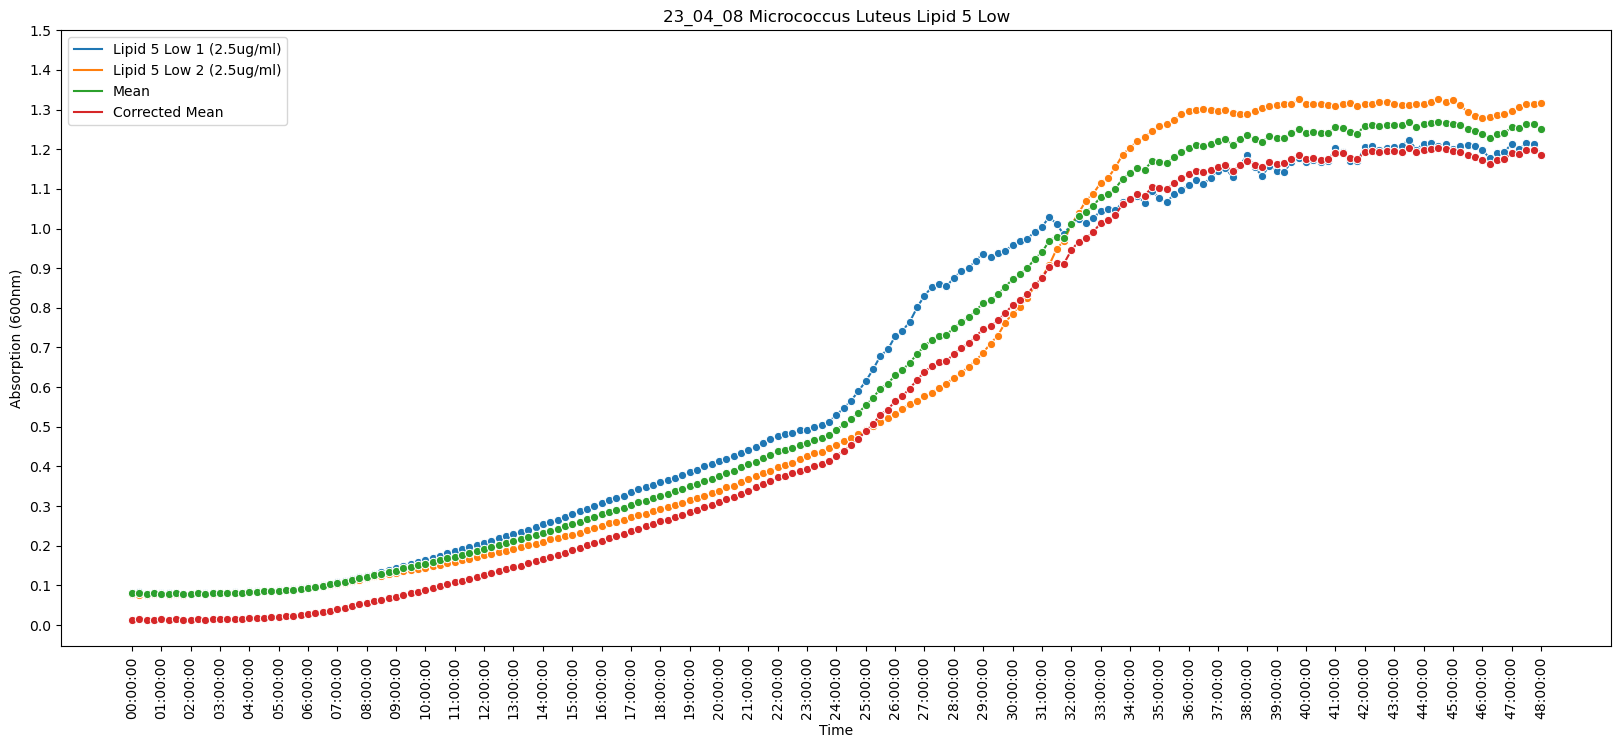

In [108]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 5 Low", five_low)

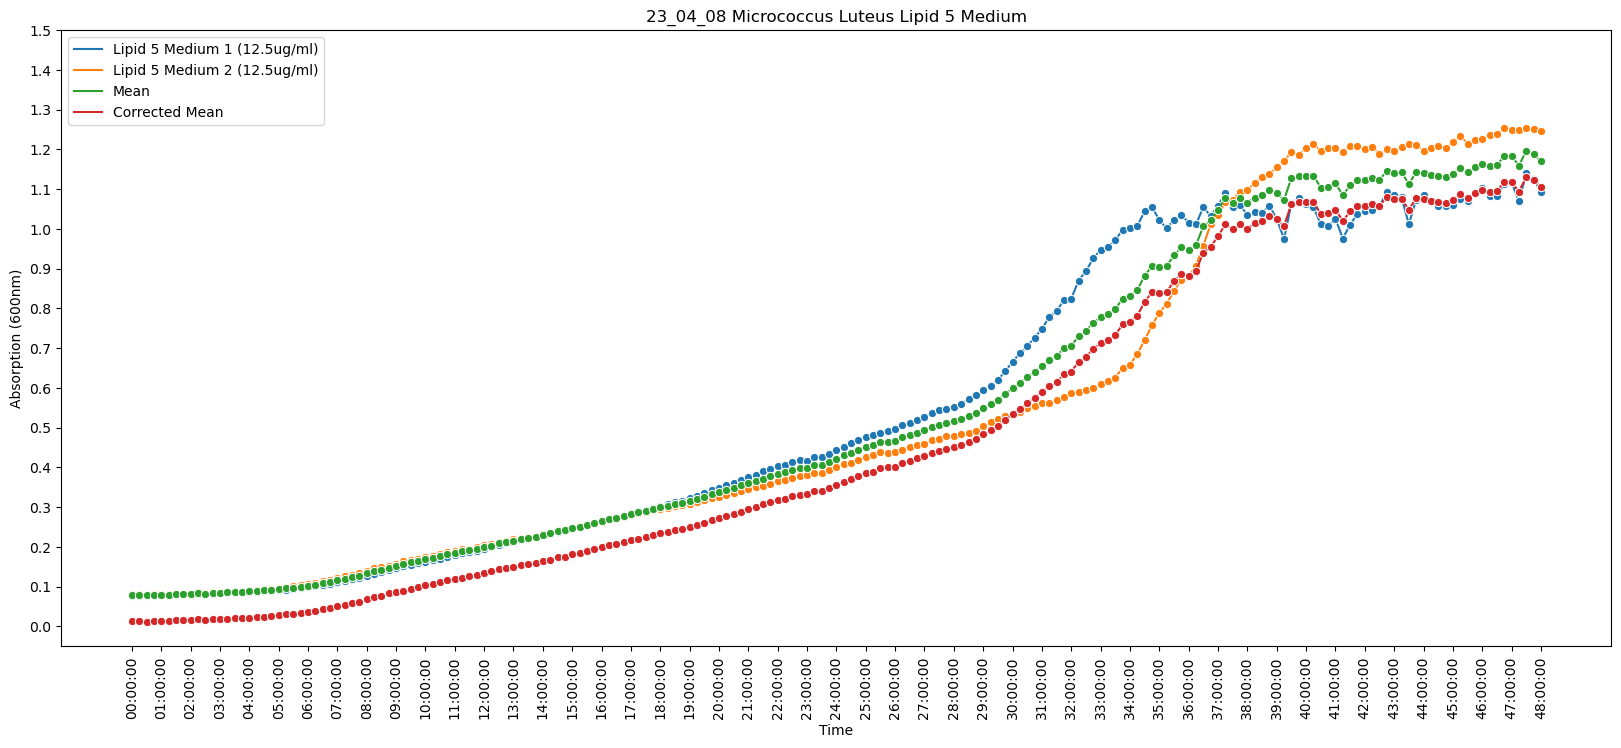

In [109]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 5 Medium", five_medium)

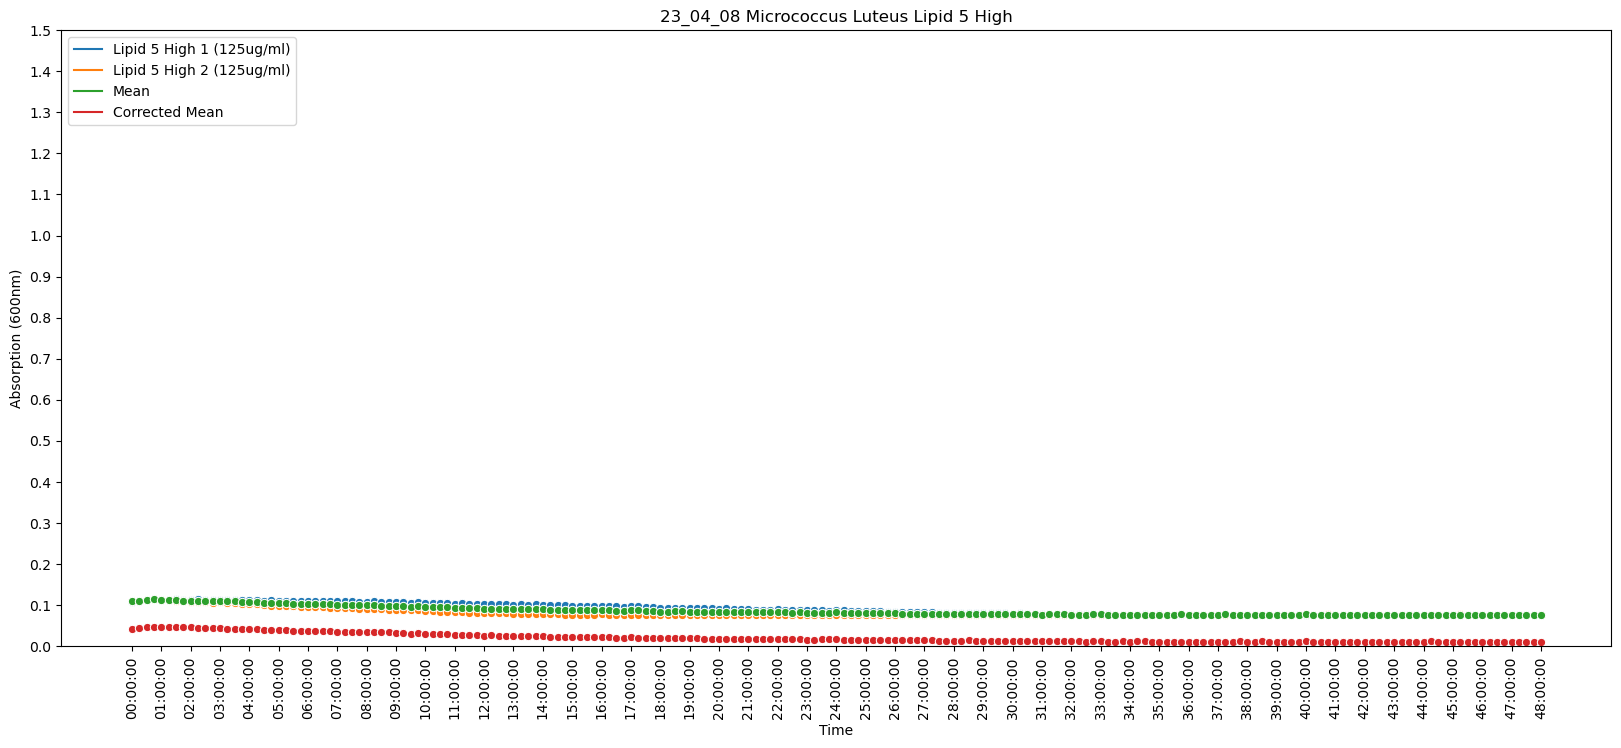

In [110]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 5 High", five_high)

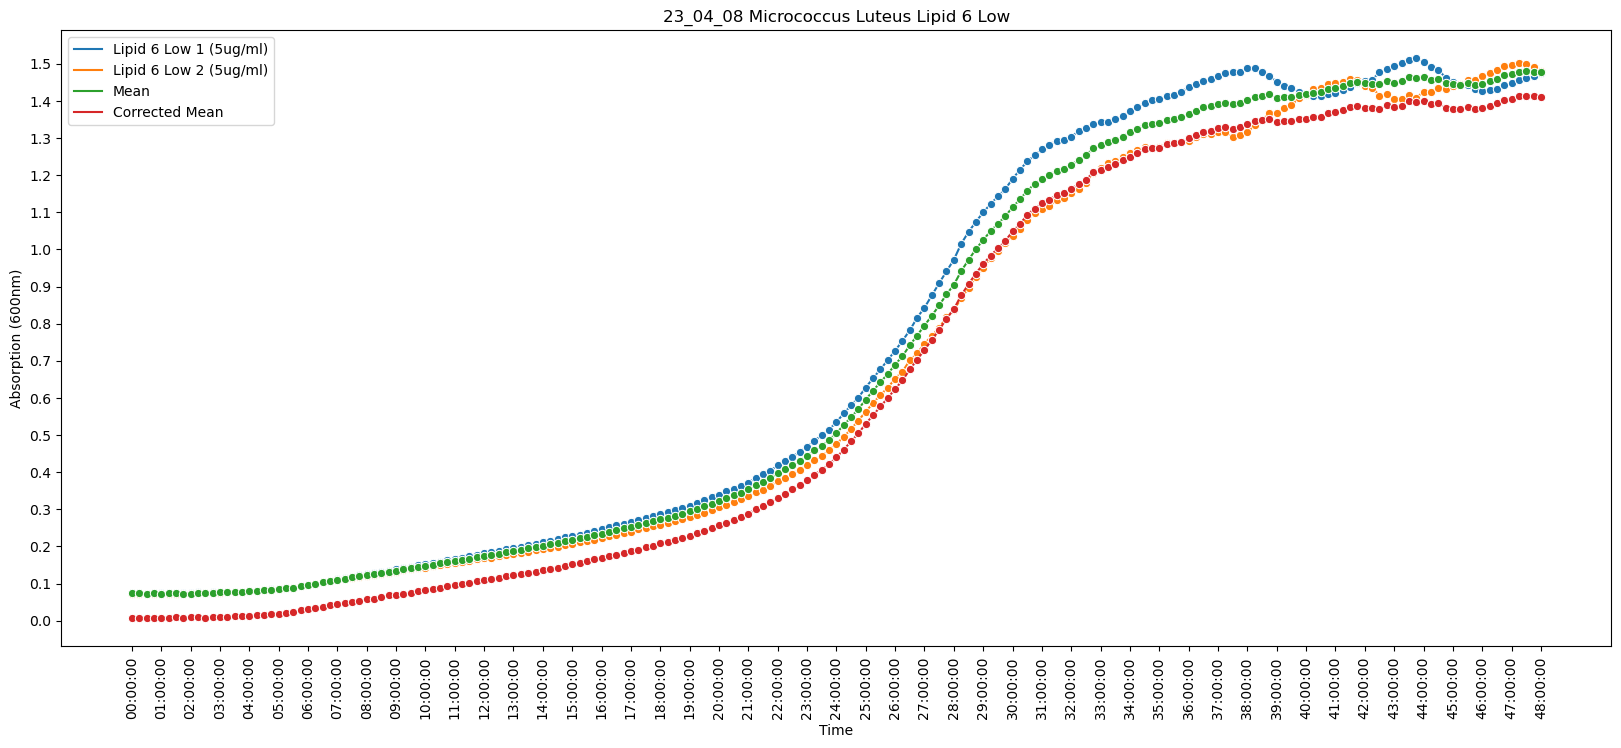

In [111]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 6 Low", six_low)

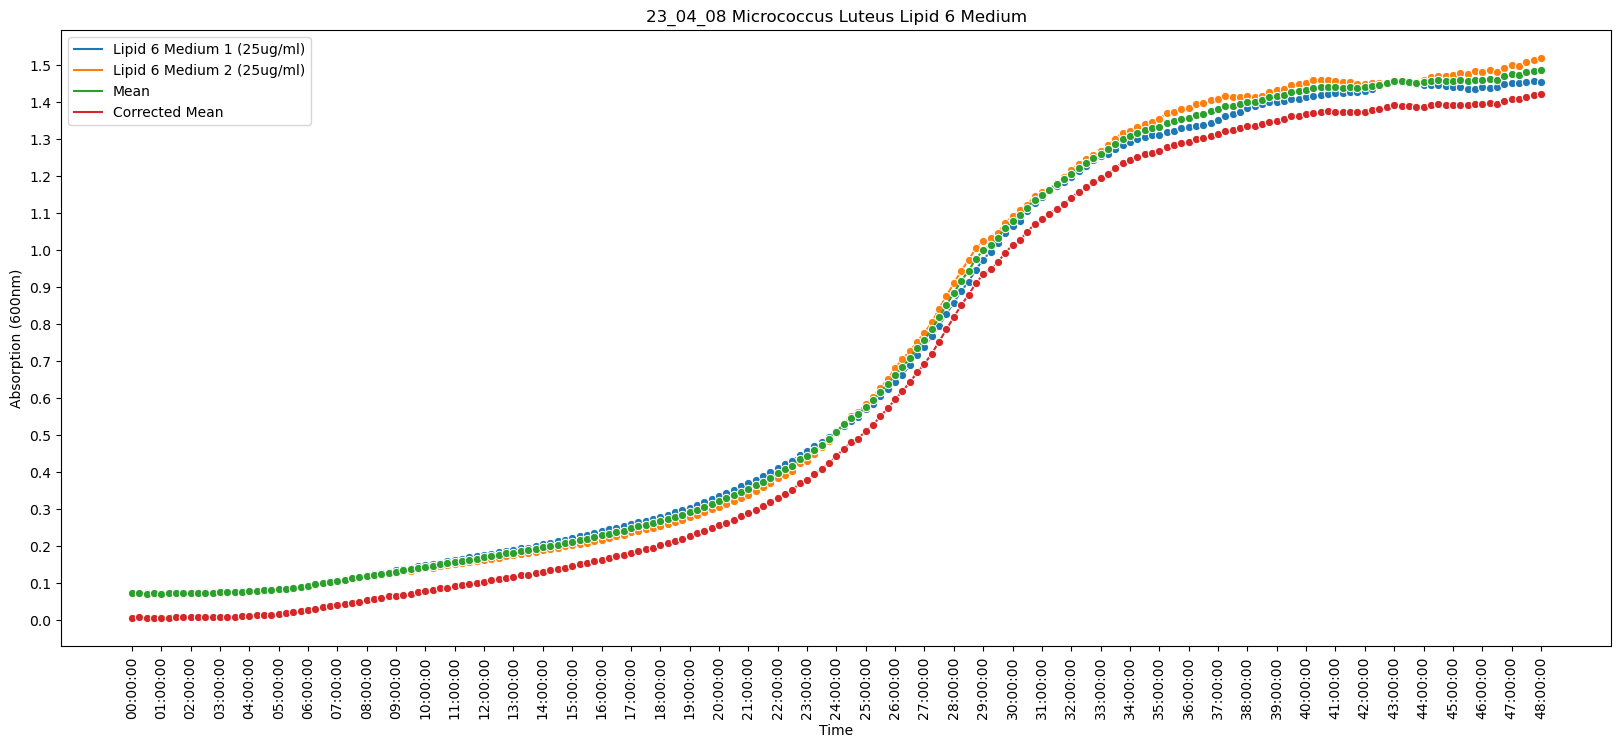

In [112]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 6 Medium", six_medium)

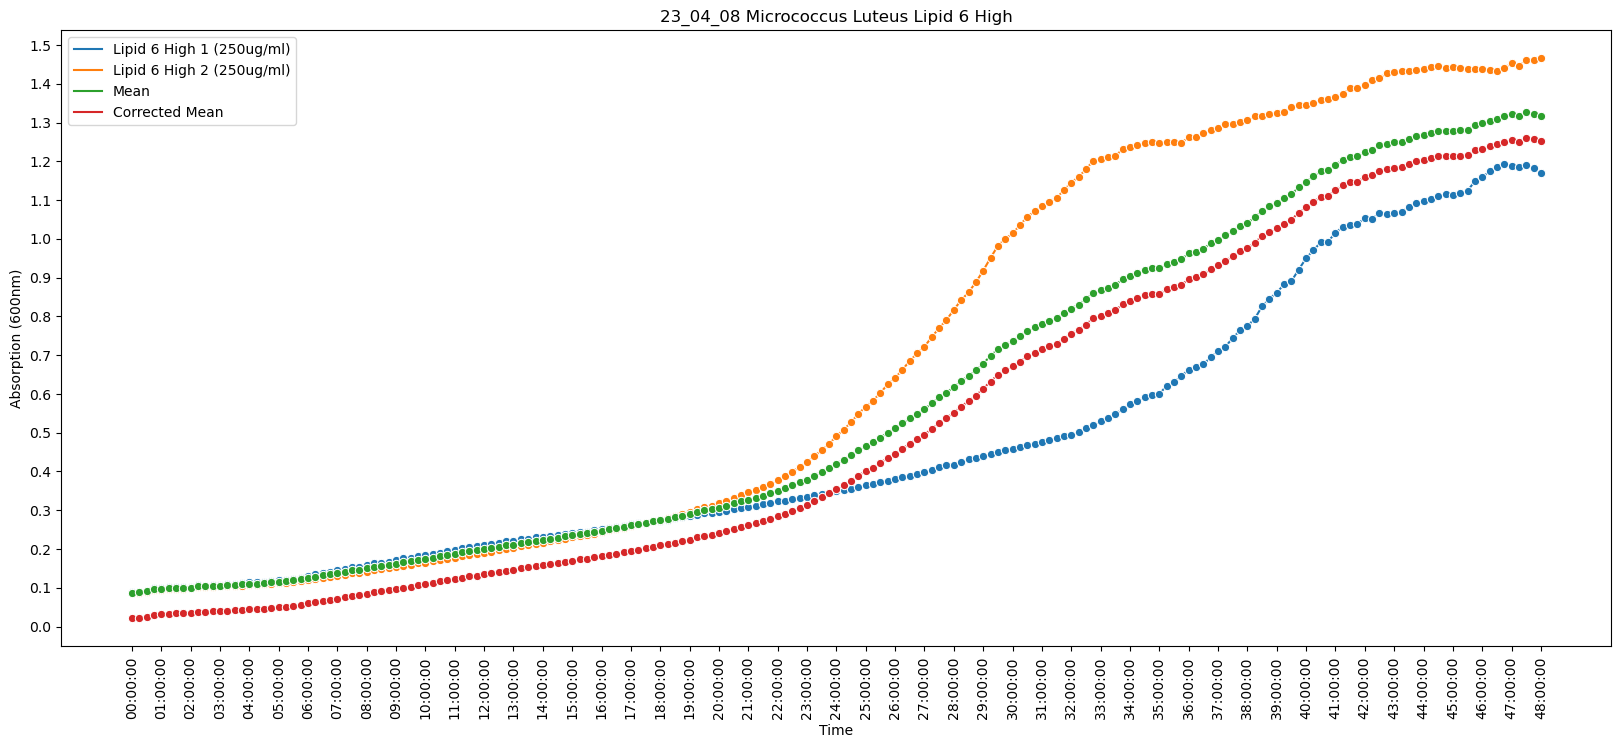

In [113]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 6 High", six_high)

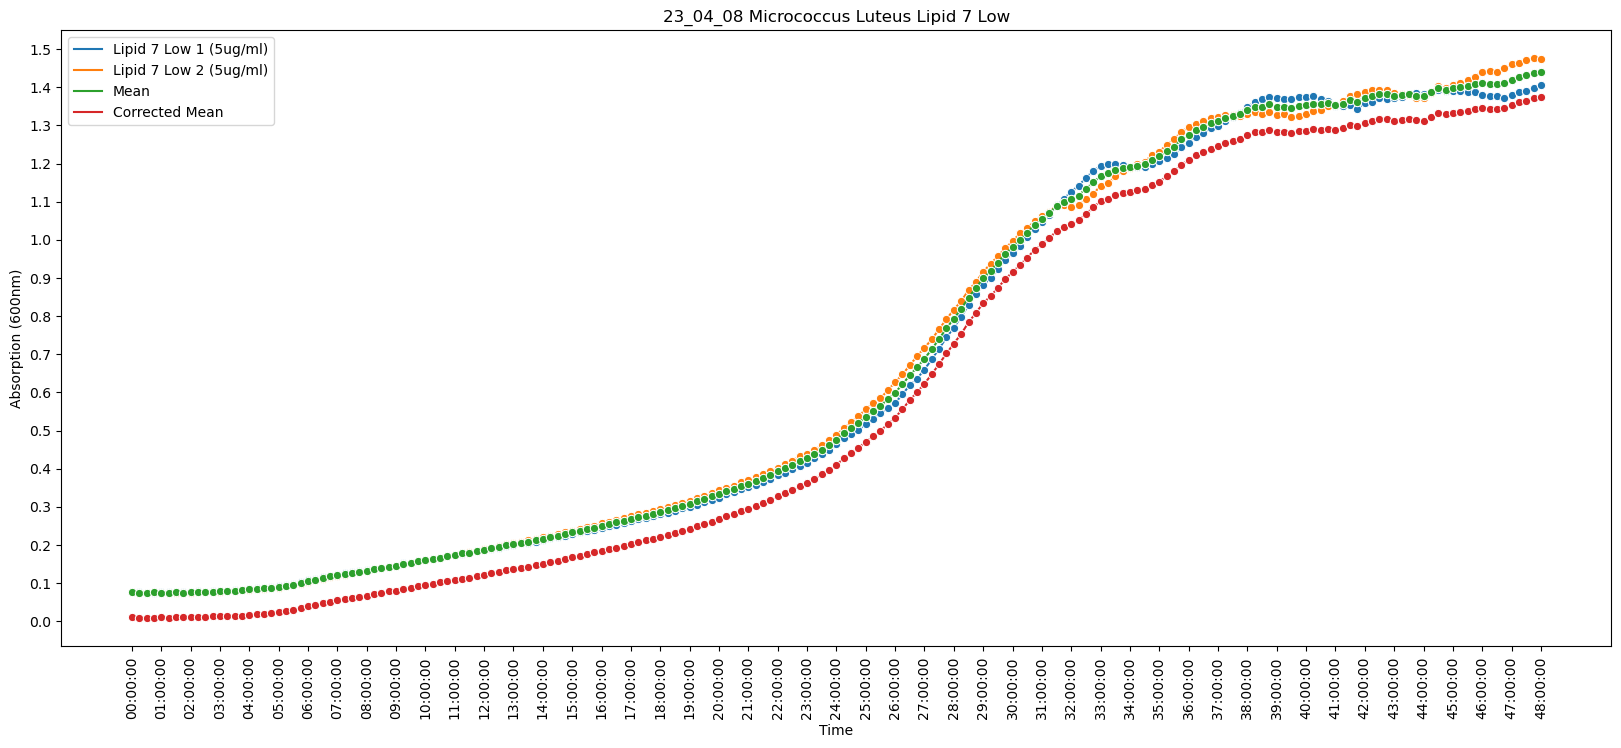

In [114]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 7 Low", seven_low)

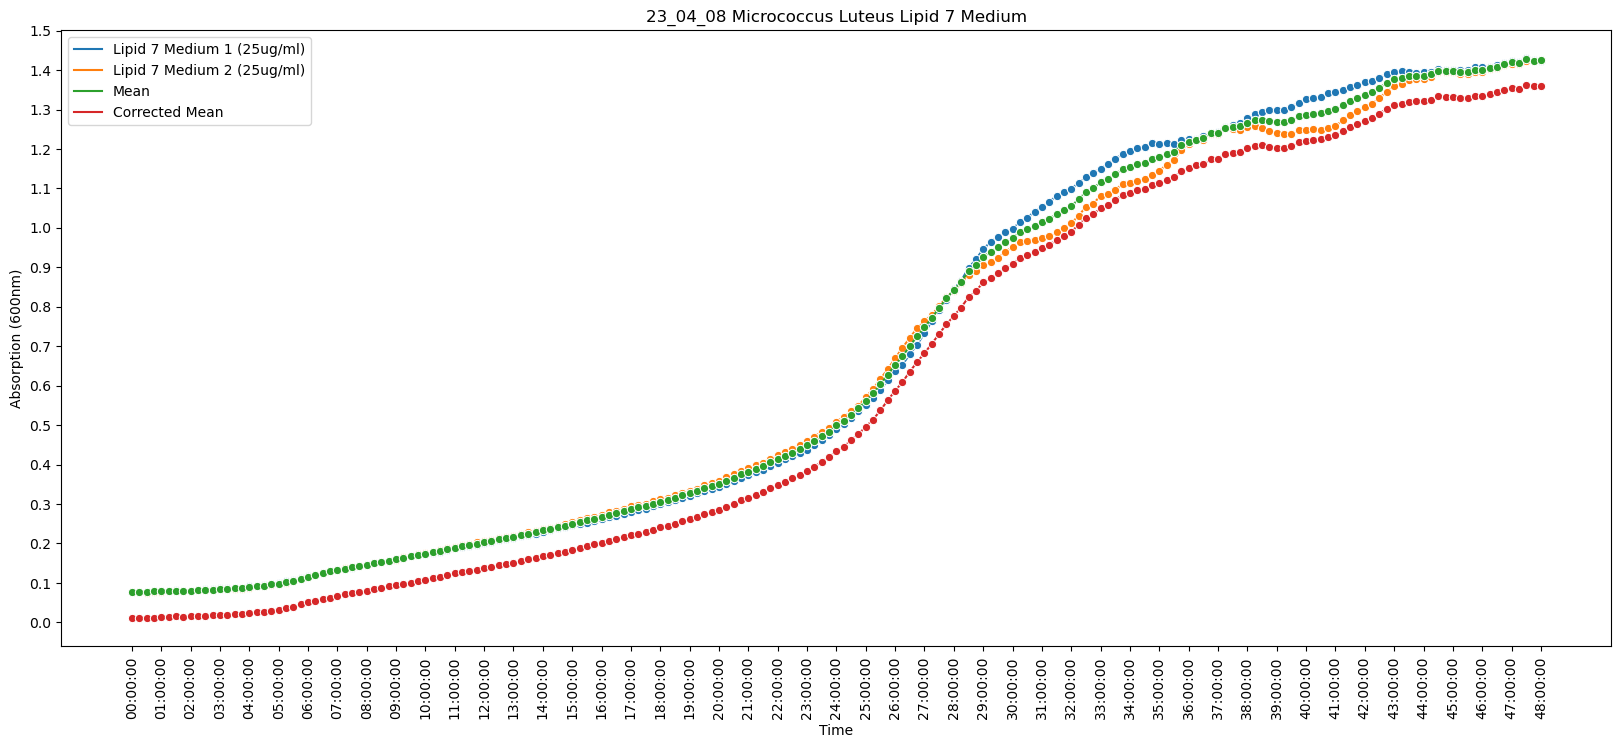

In [115]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 7 Medium", seven_medium)

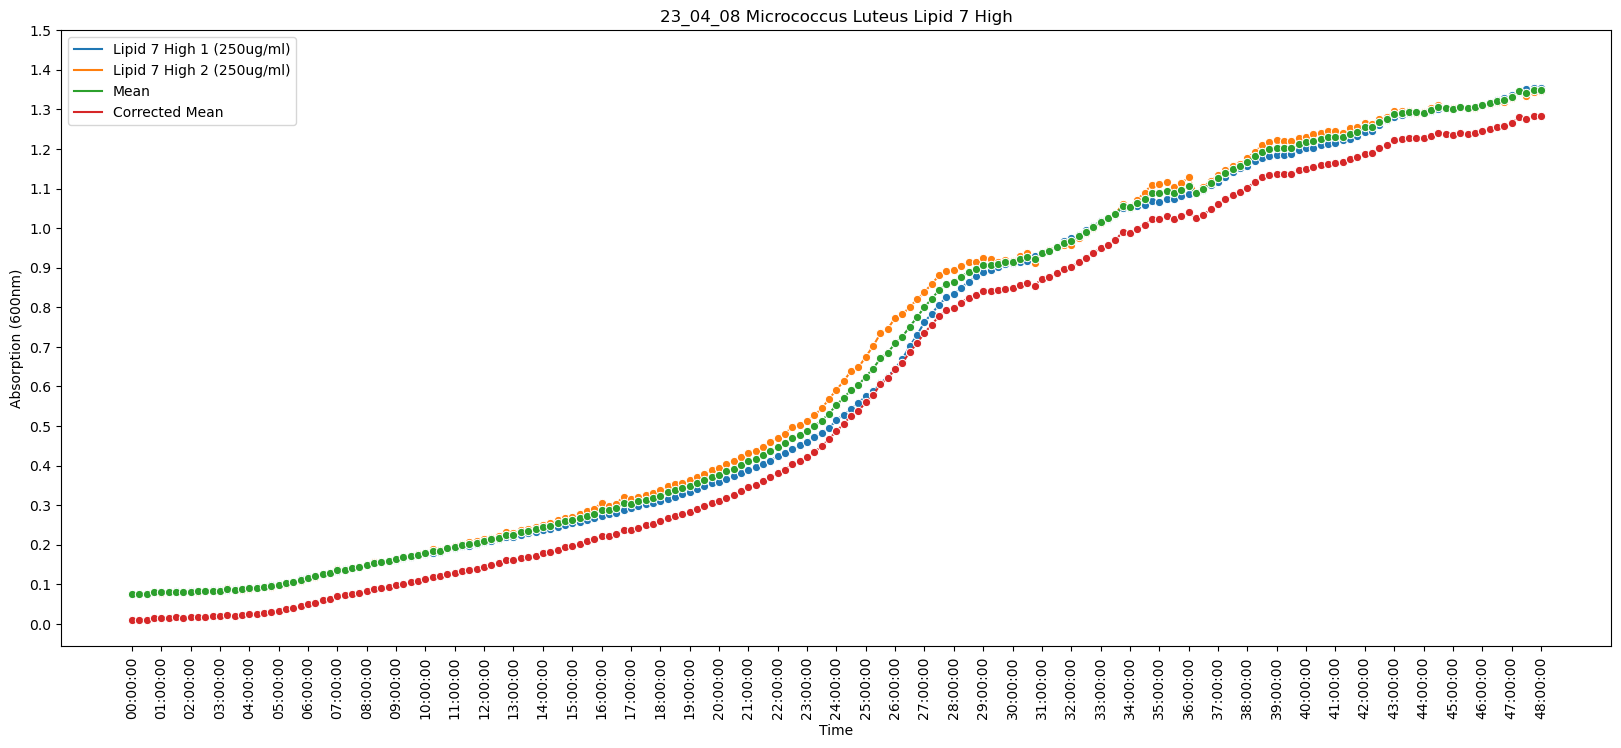

In [116]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 7 High", seven_high)

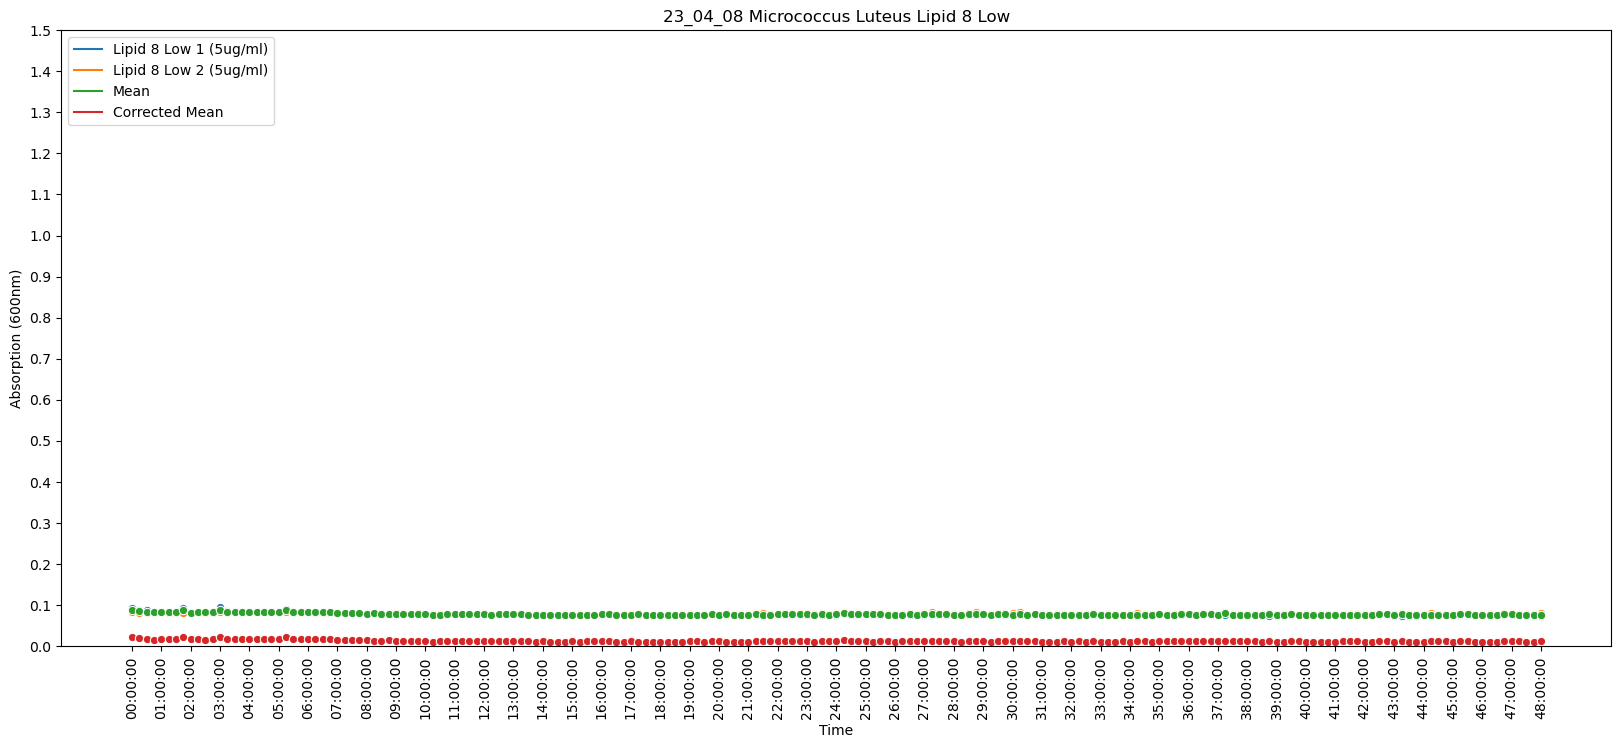

In [117]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 8 Low", eight_low)

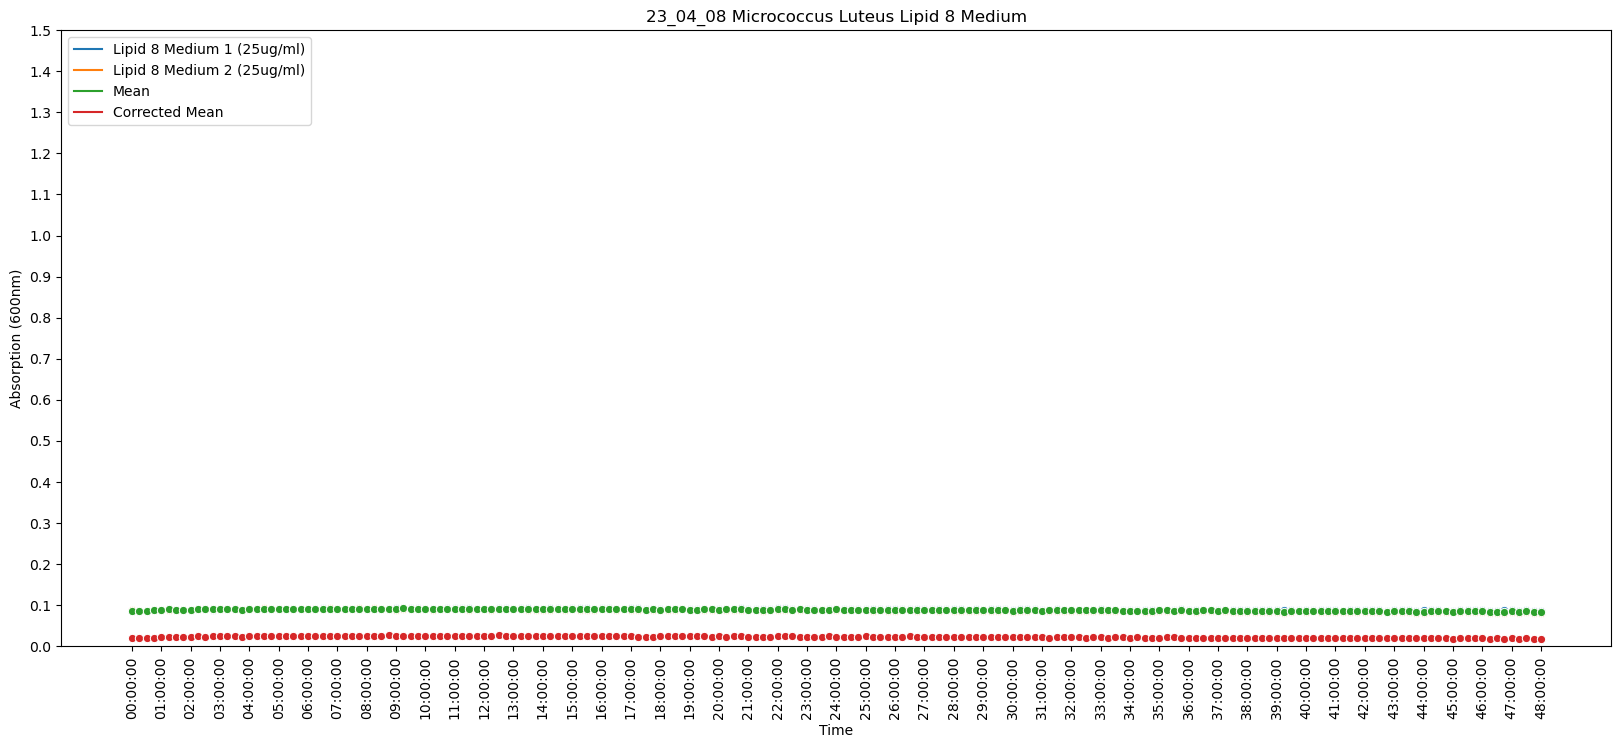

In [118]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 8 Medium", eight_medium)

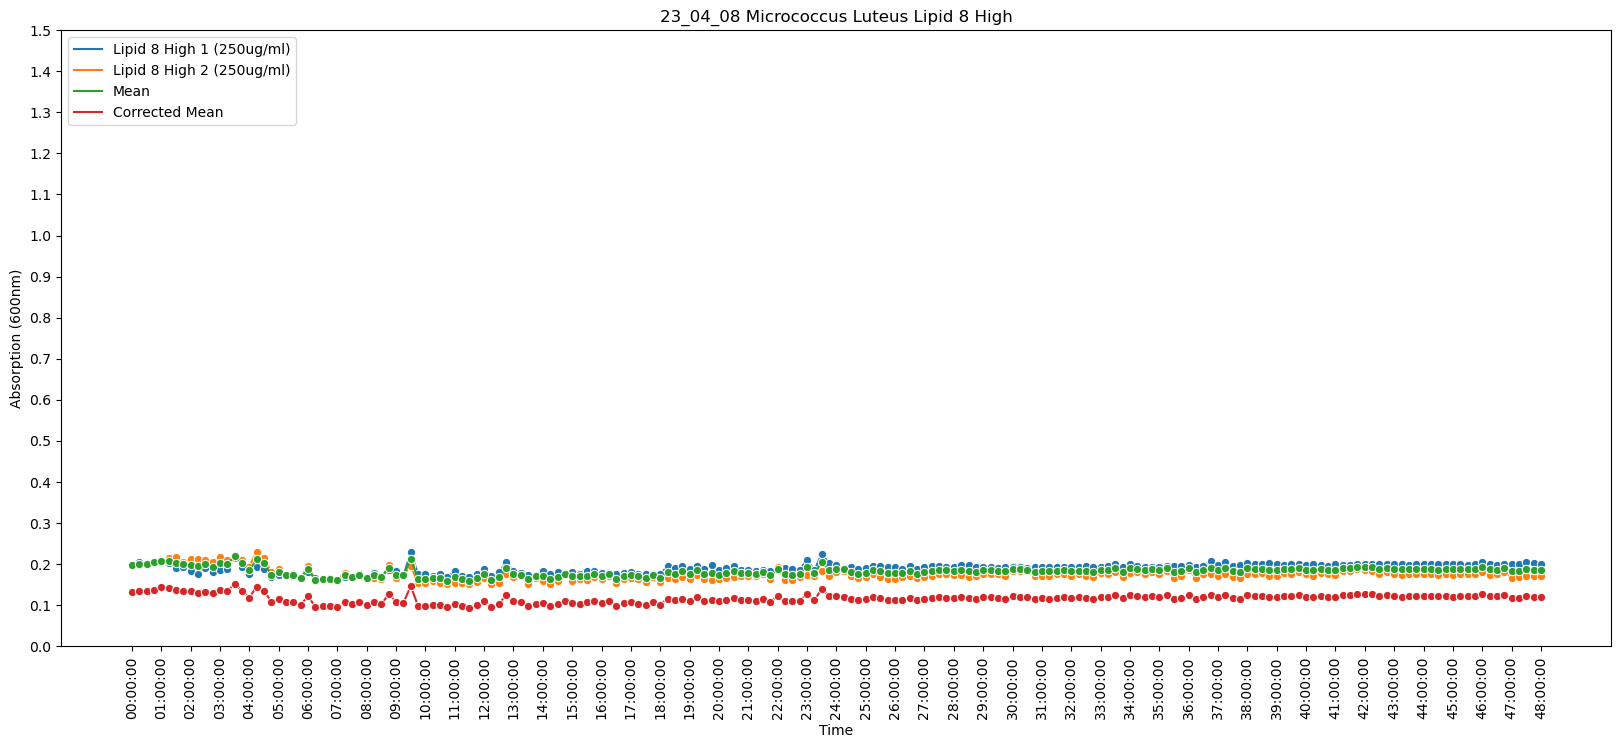

In [119]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 8 High", eight_high)

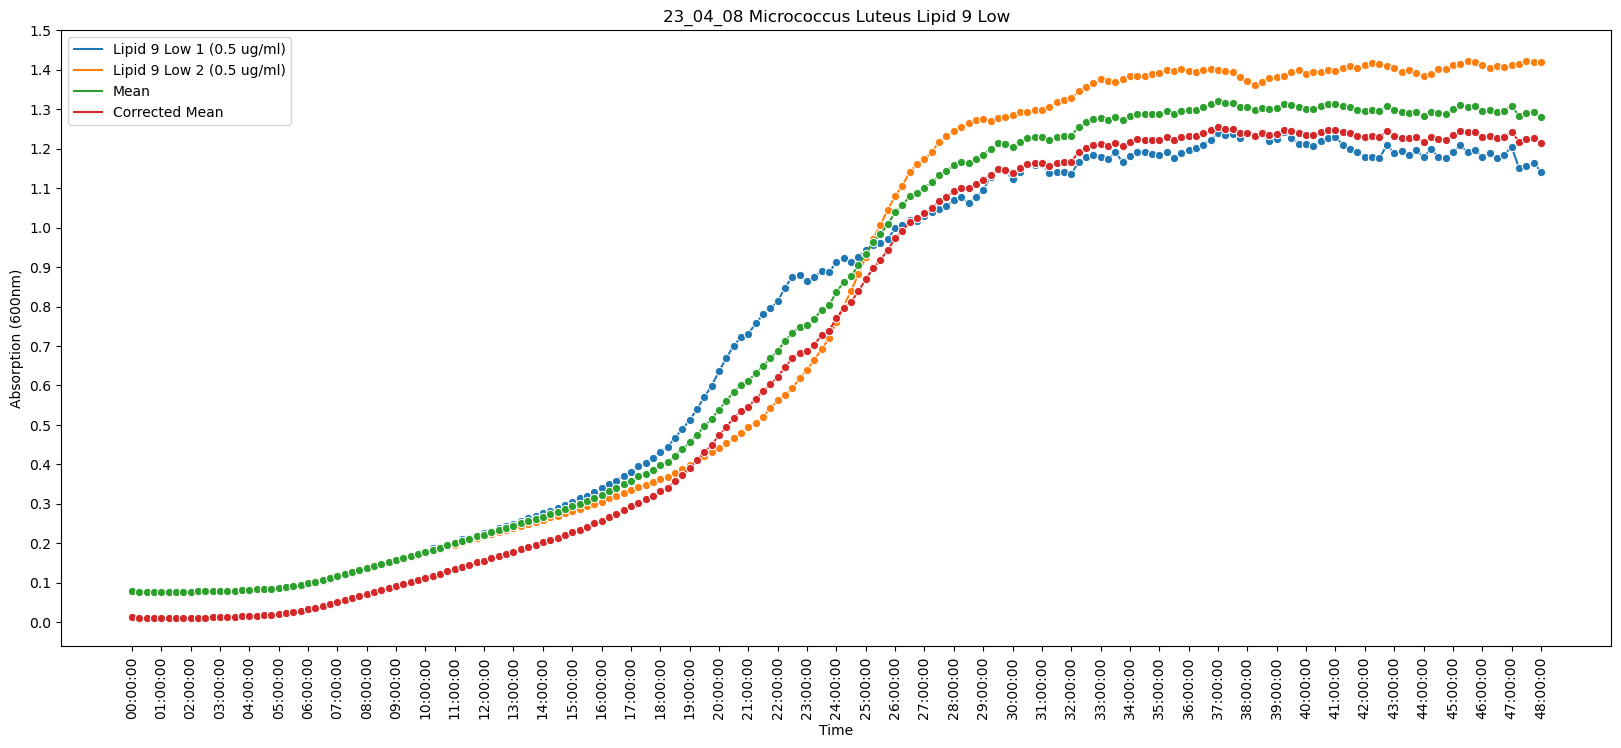

In [120]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 9 Low", nine_low)

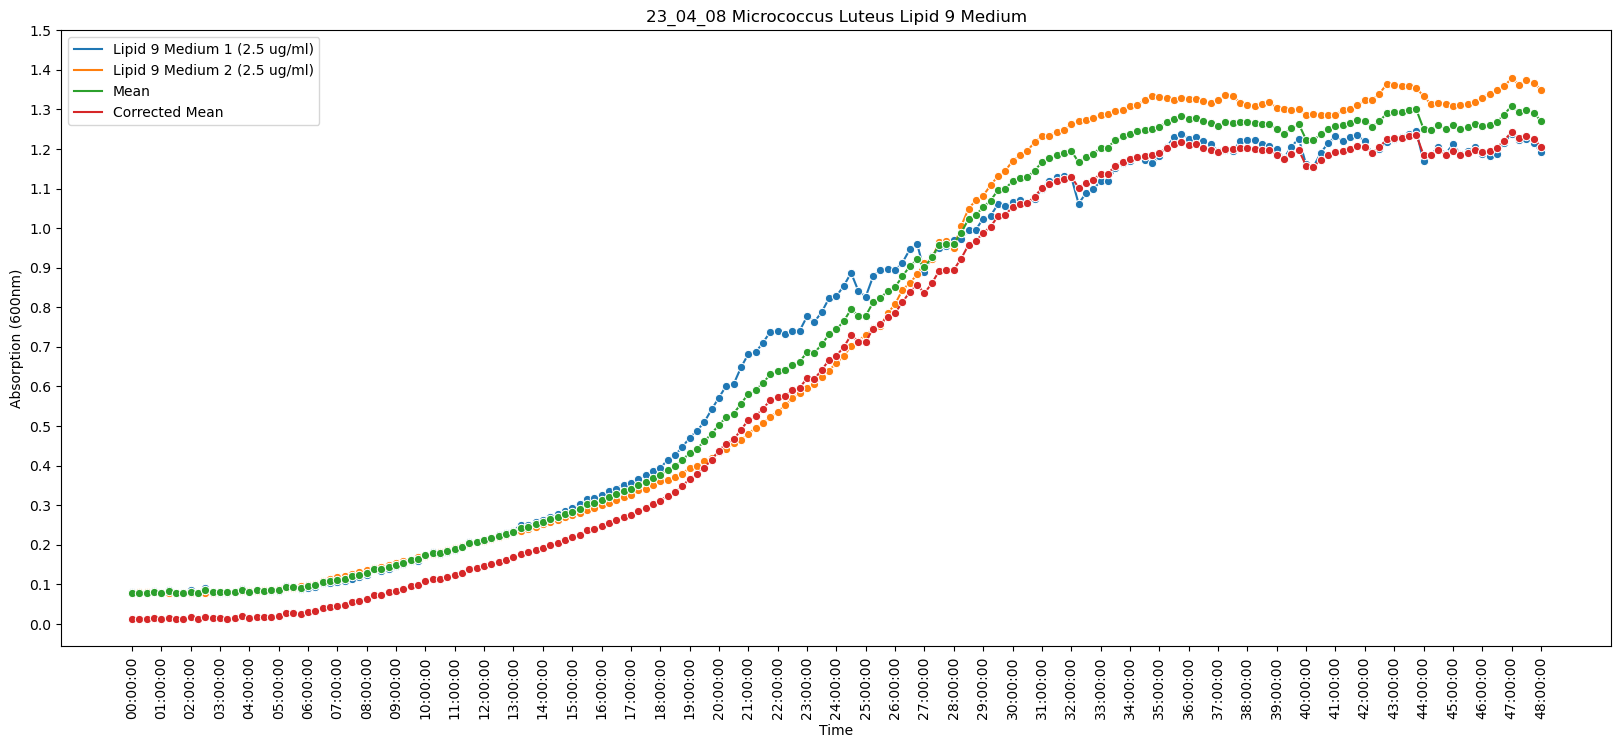

In [121]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 9 Medium", nine_medium)

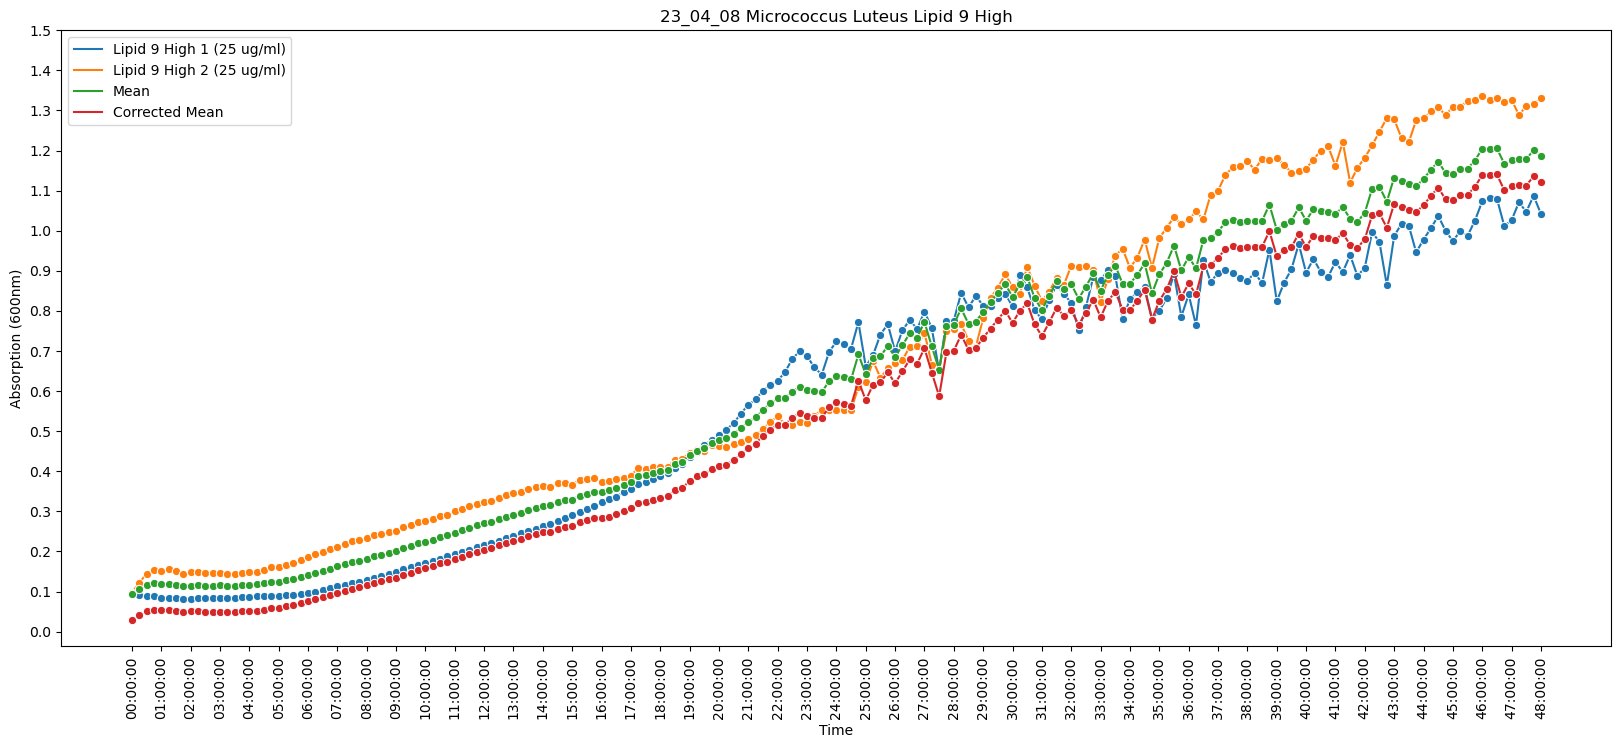

In [122]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 9 High", nine_high)

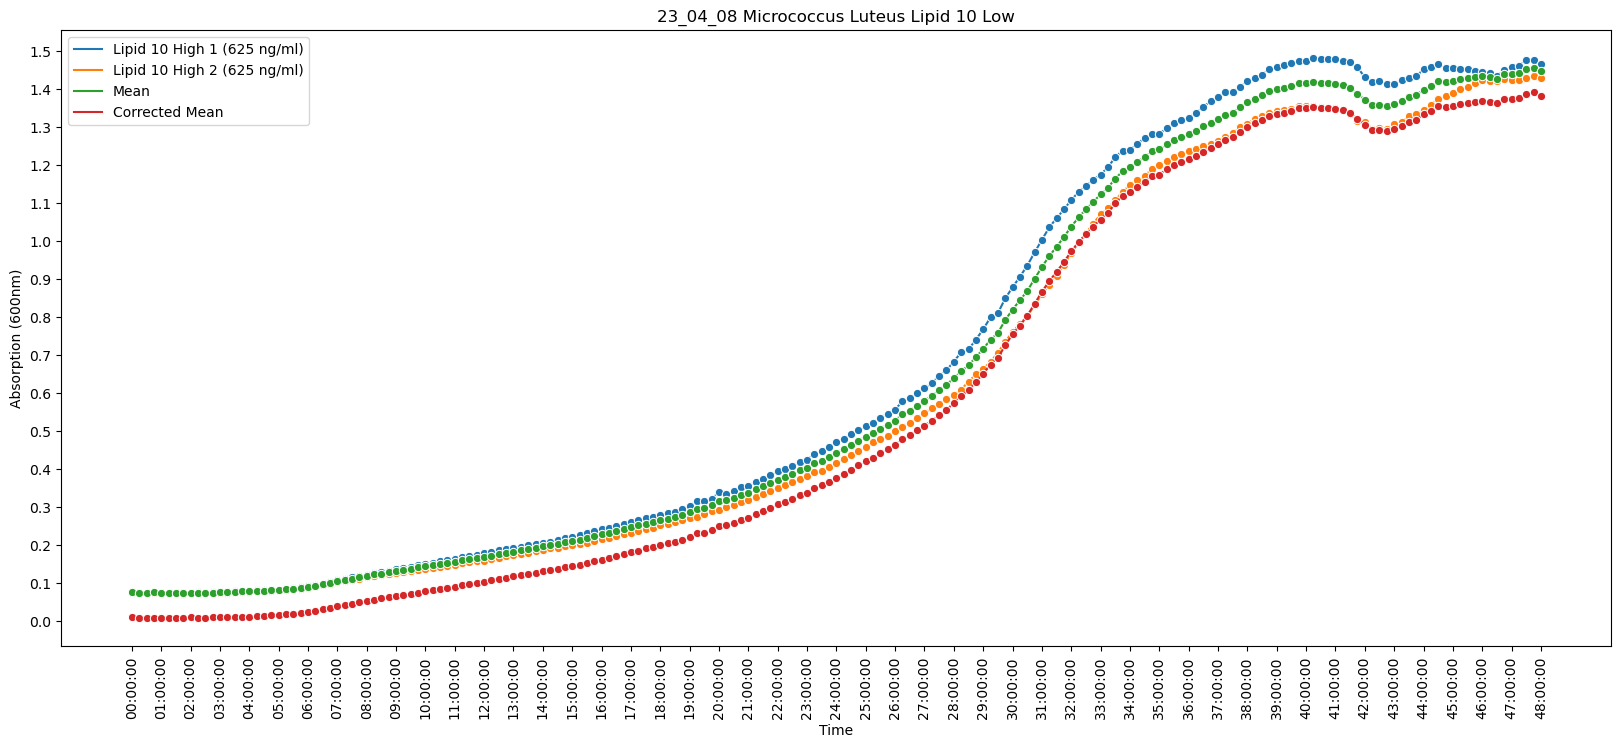

In [123]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 10 Low", ten_low)

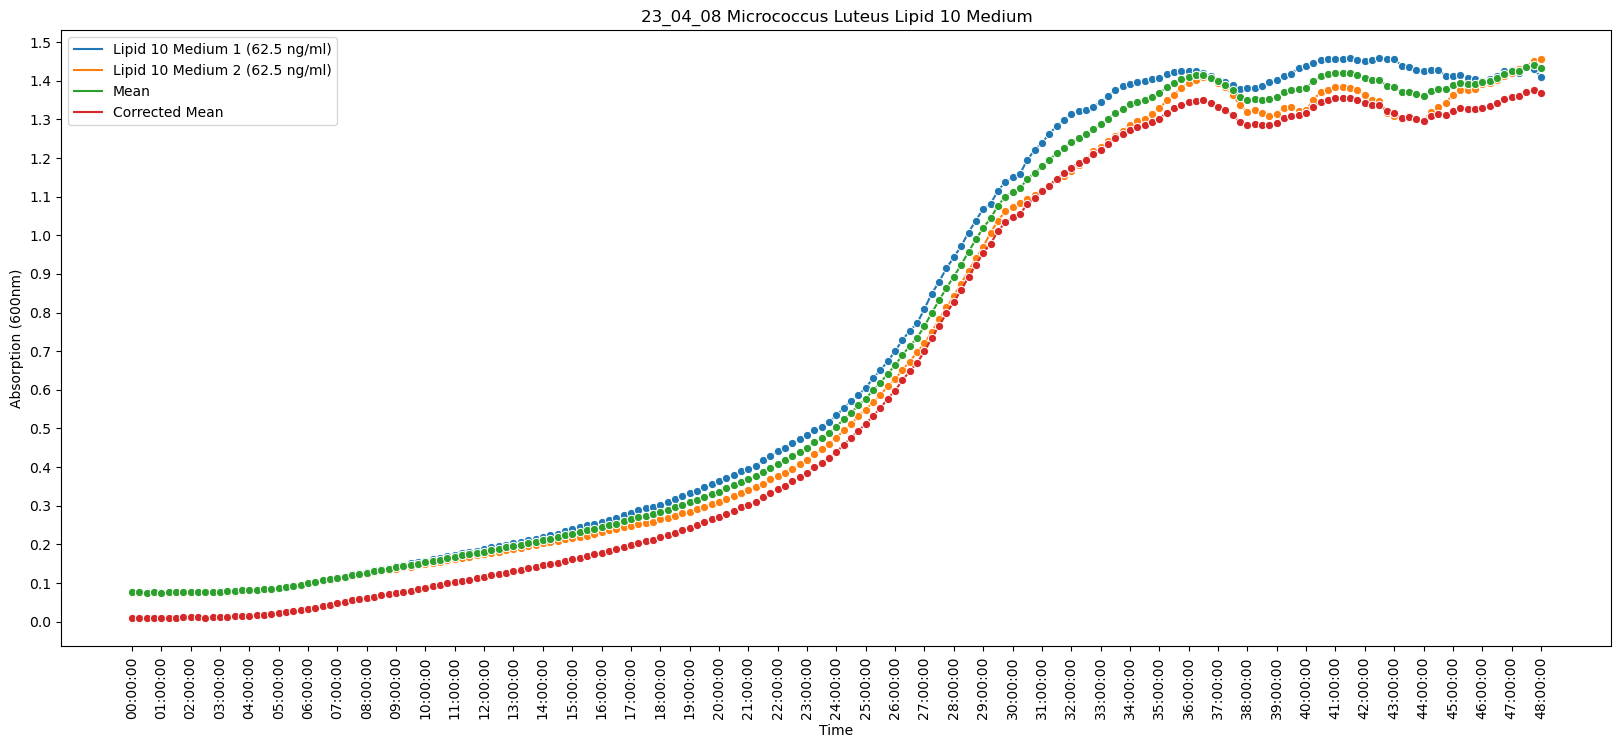

In [124]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 10 Medium", ten_medium)

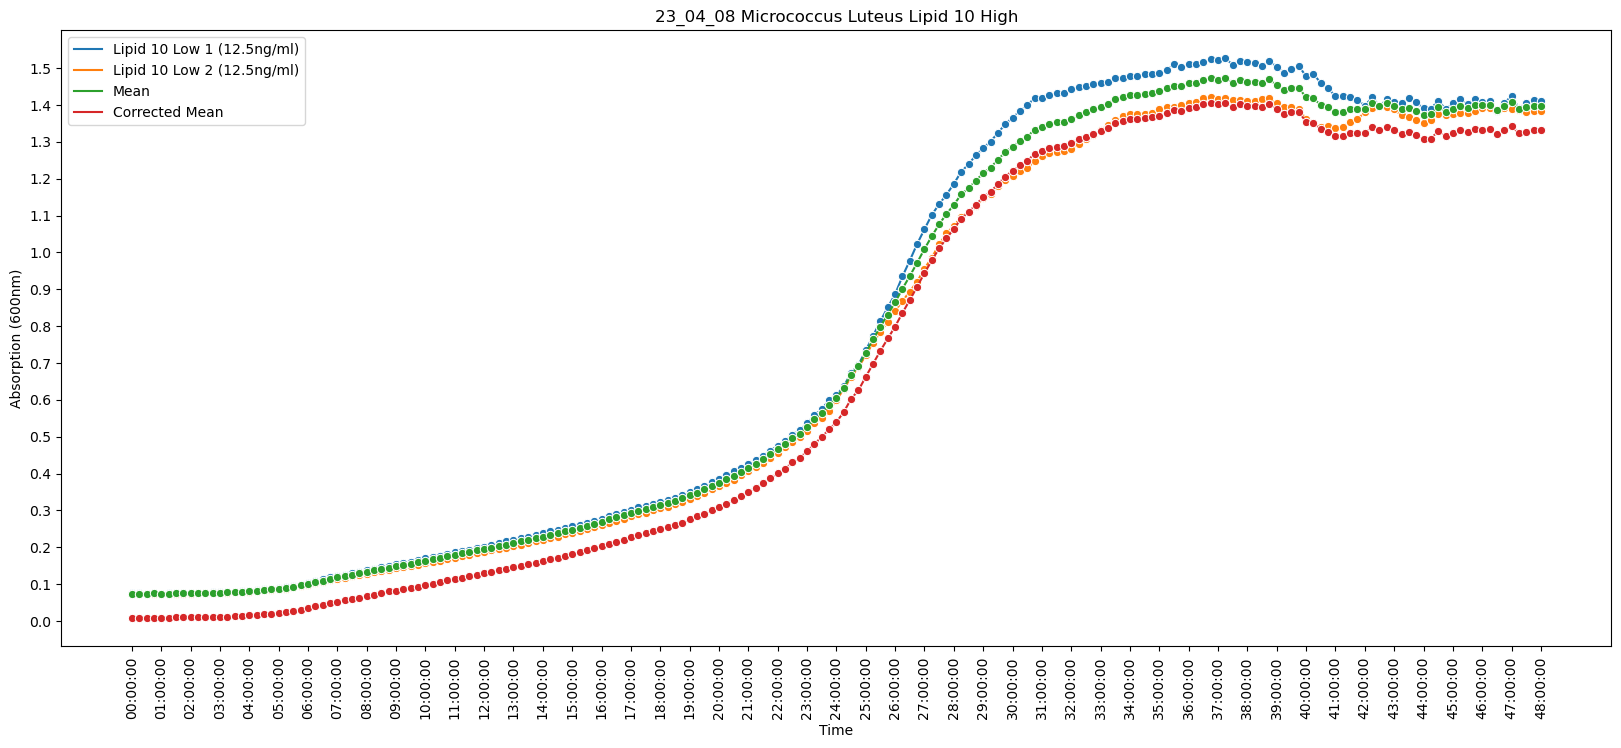

In [125]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 10 High", ten_high)

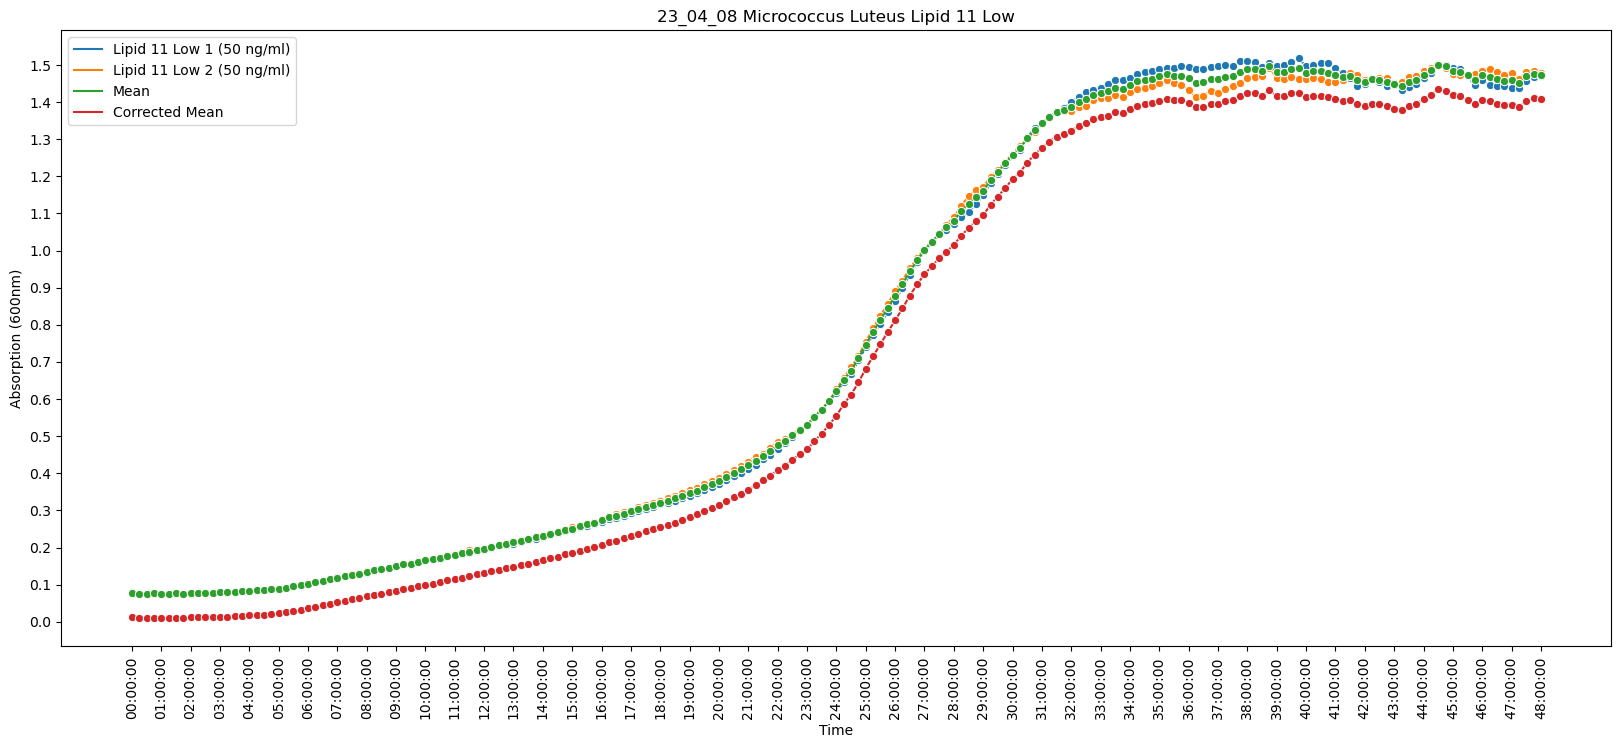

In [126]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 11 Low", eleven_low)

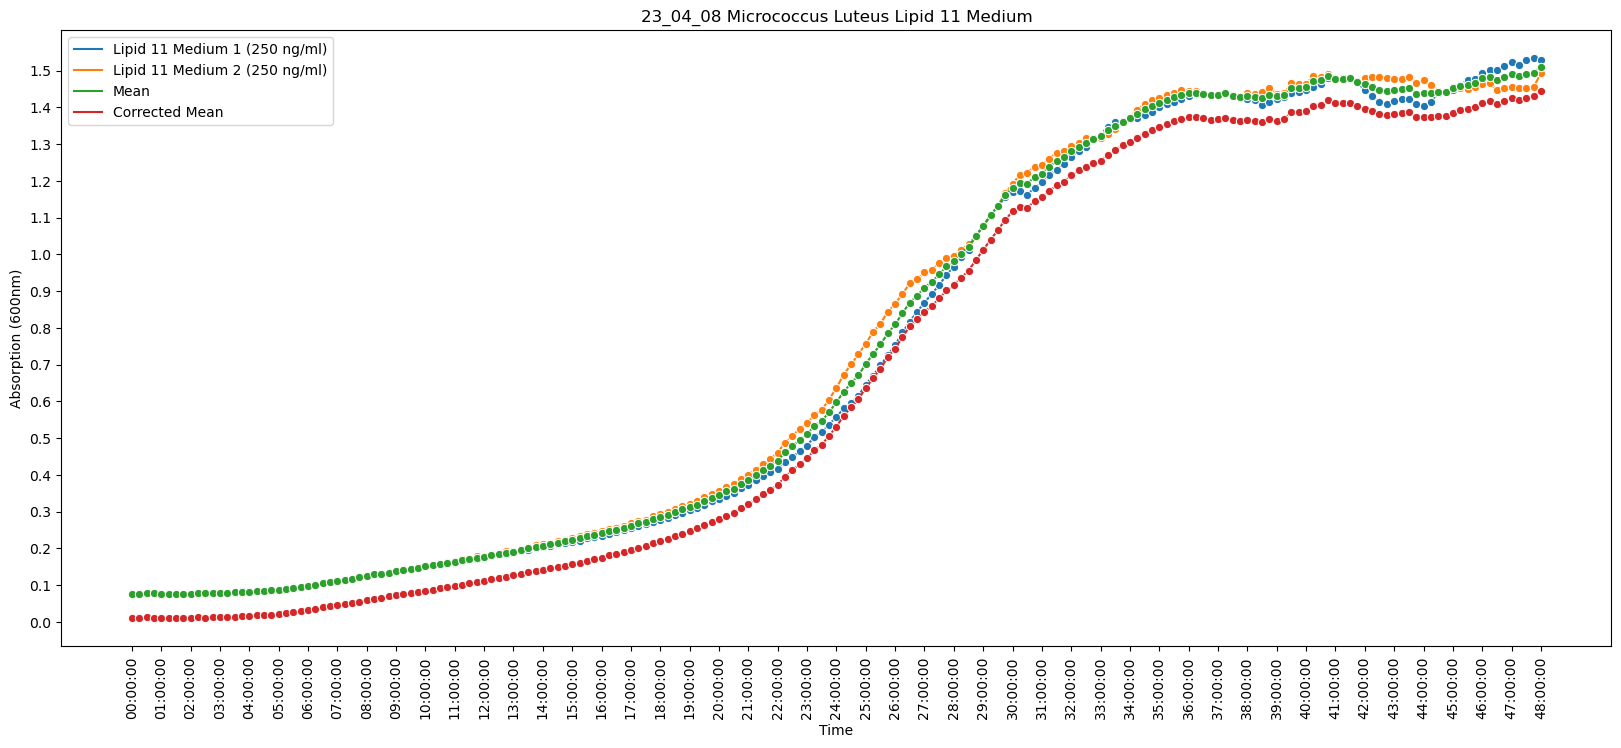

In [127]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 11 Medium", eleven_medium)

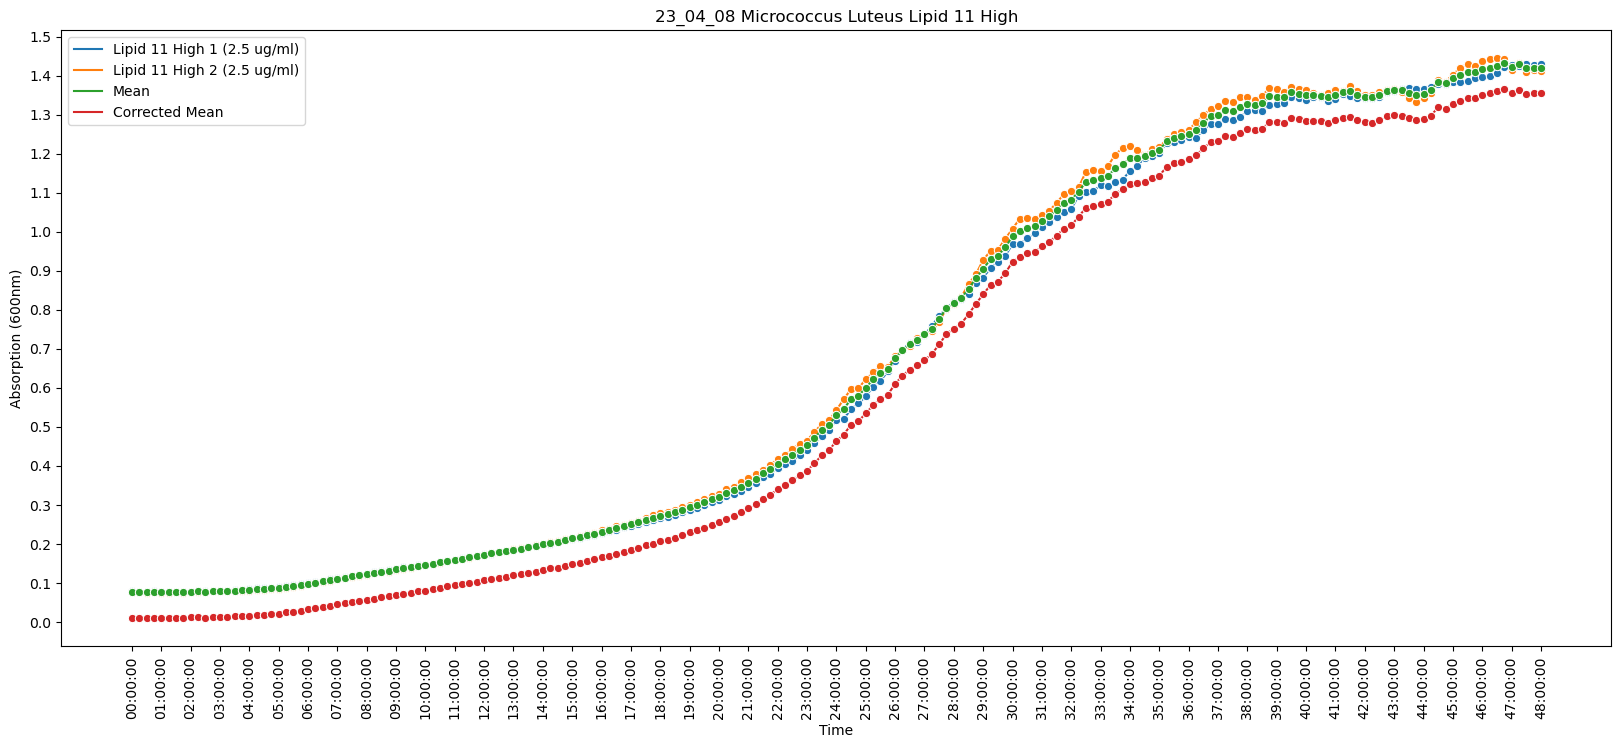

In [128]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 11 High", eleven_high)

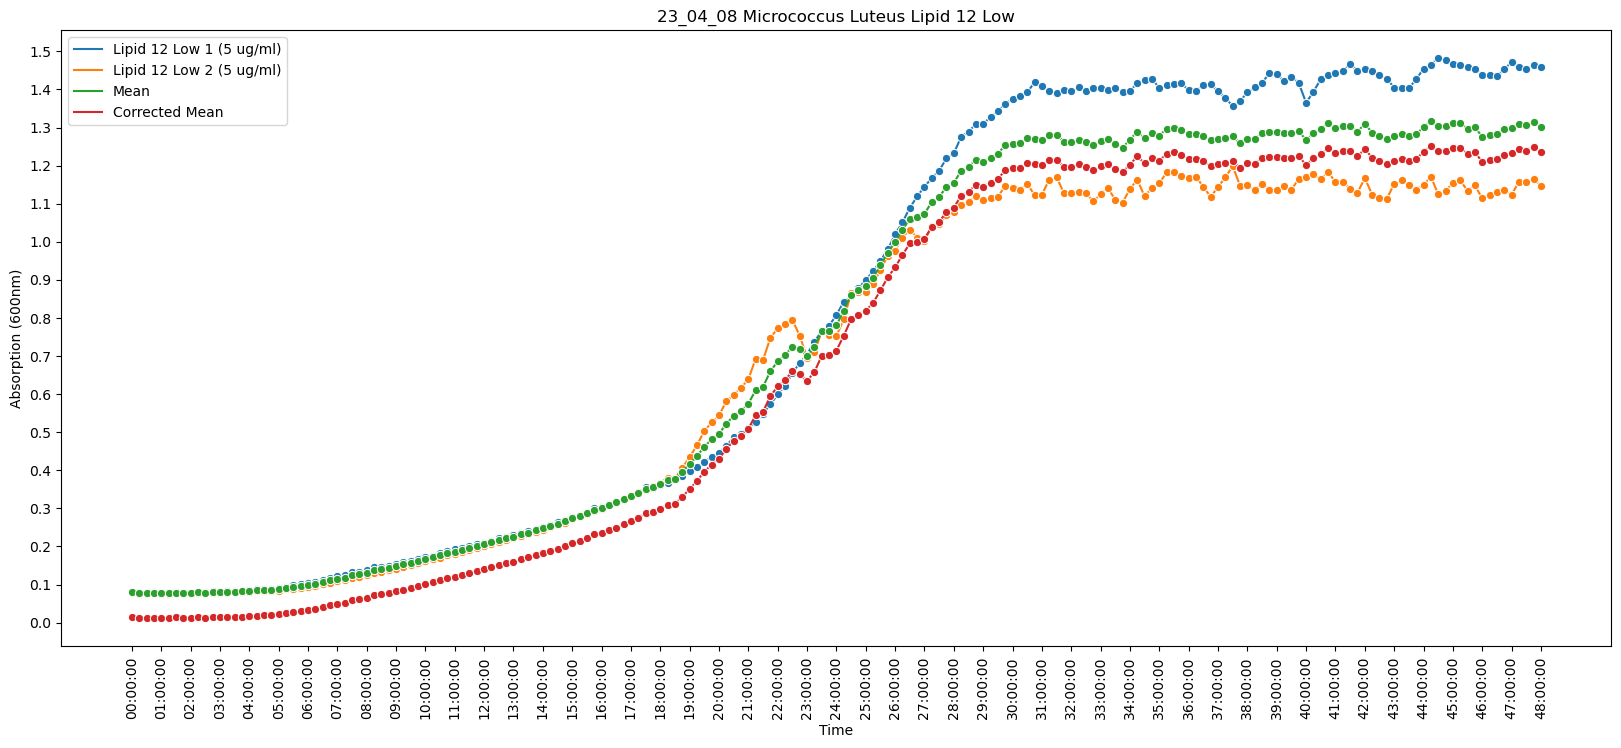

In [129]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 12 Low", twelve_low)

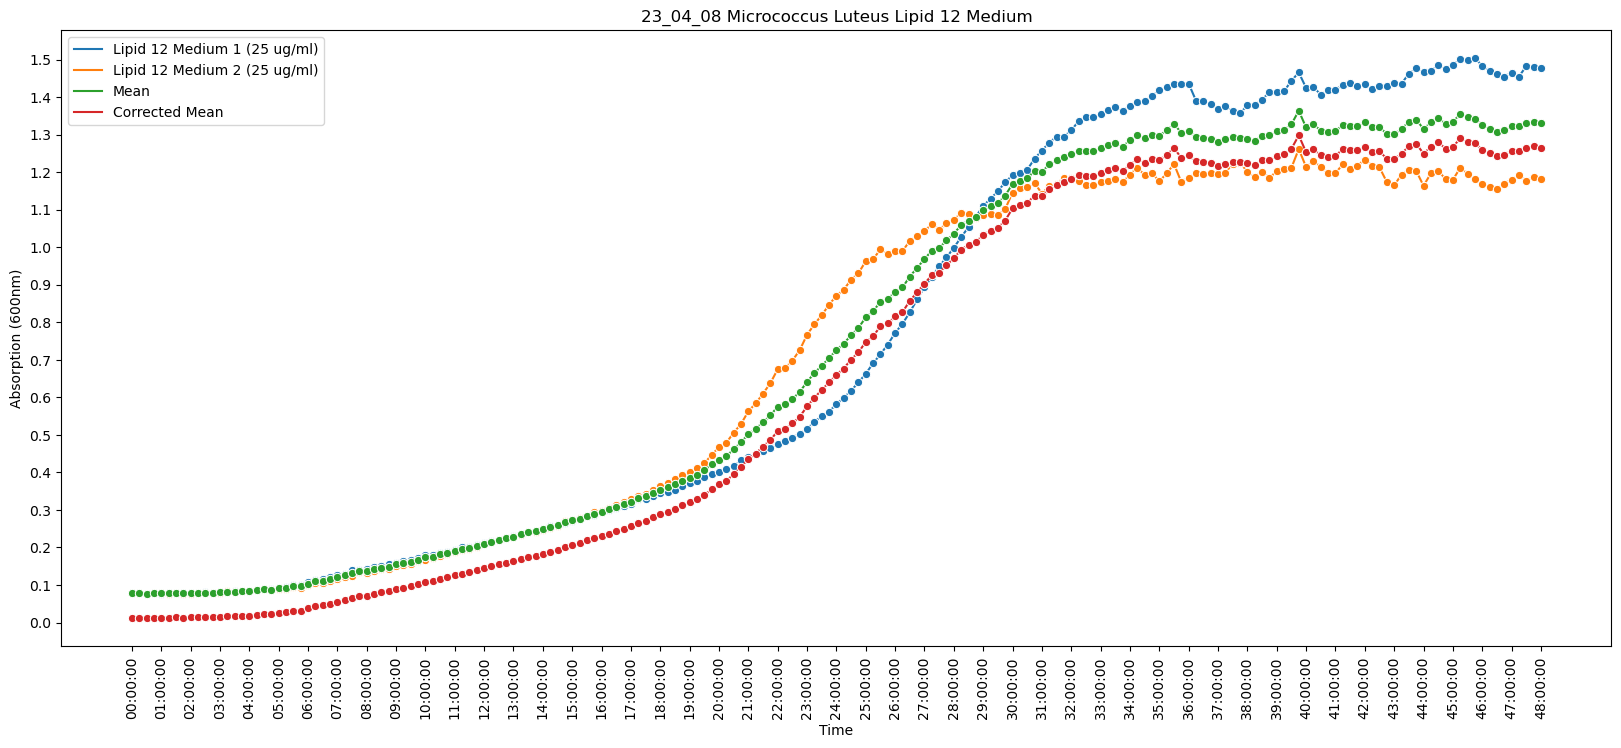

In [130]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 12 Medium", twelve_medium)

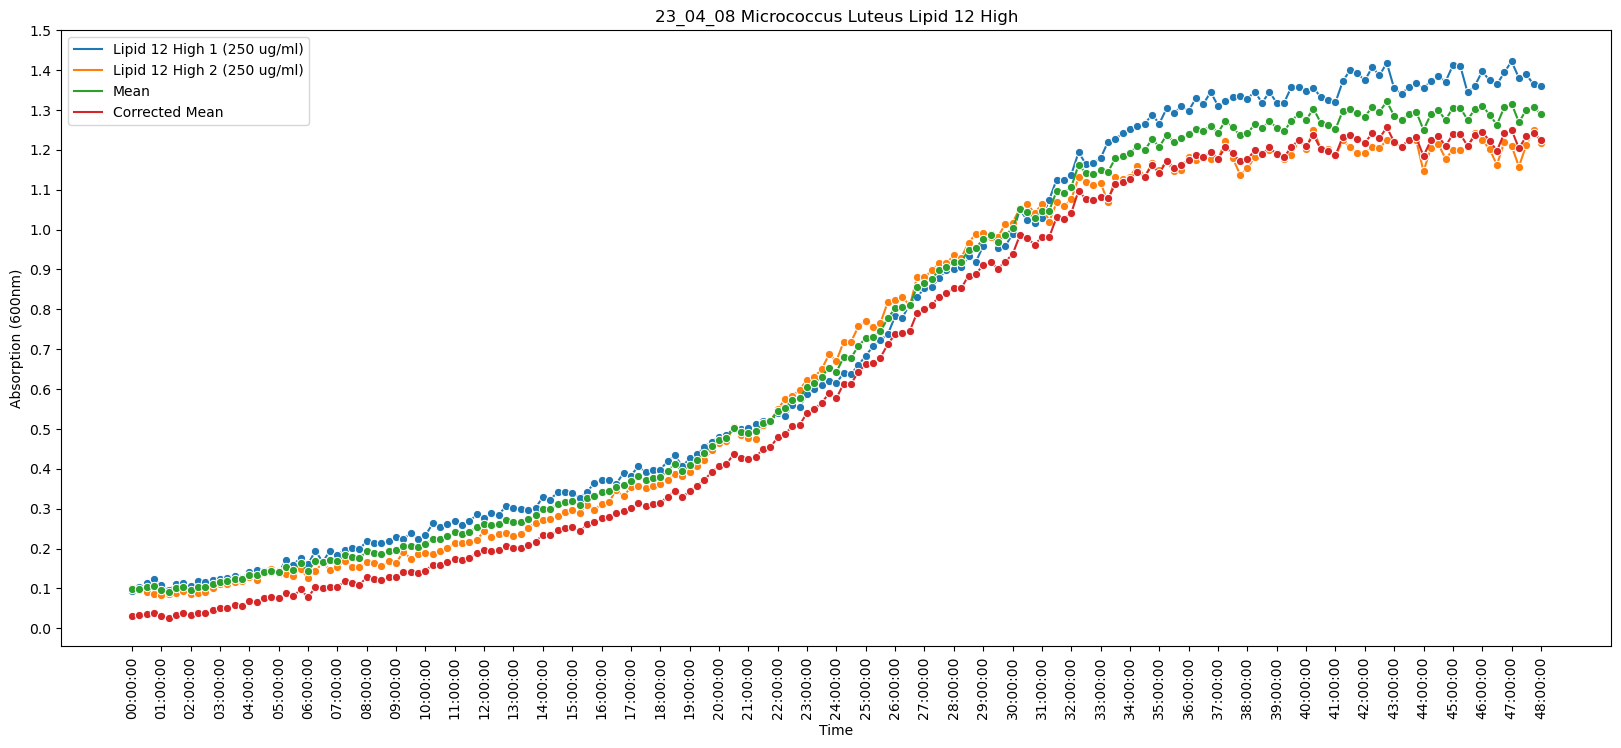

In [131]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 12 High", twelve_high)

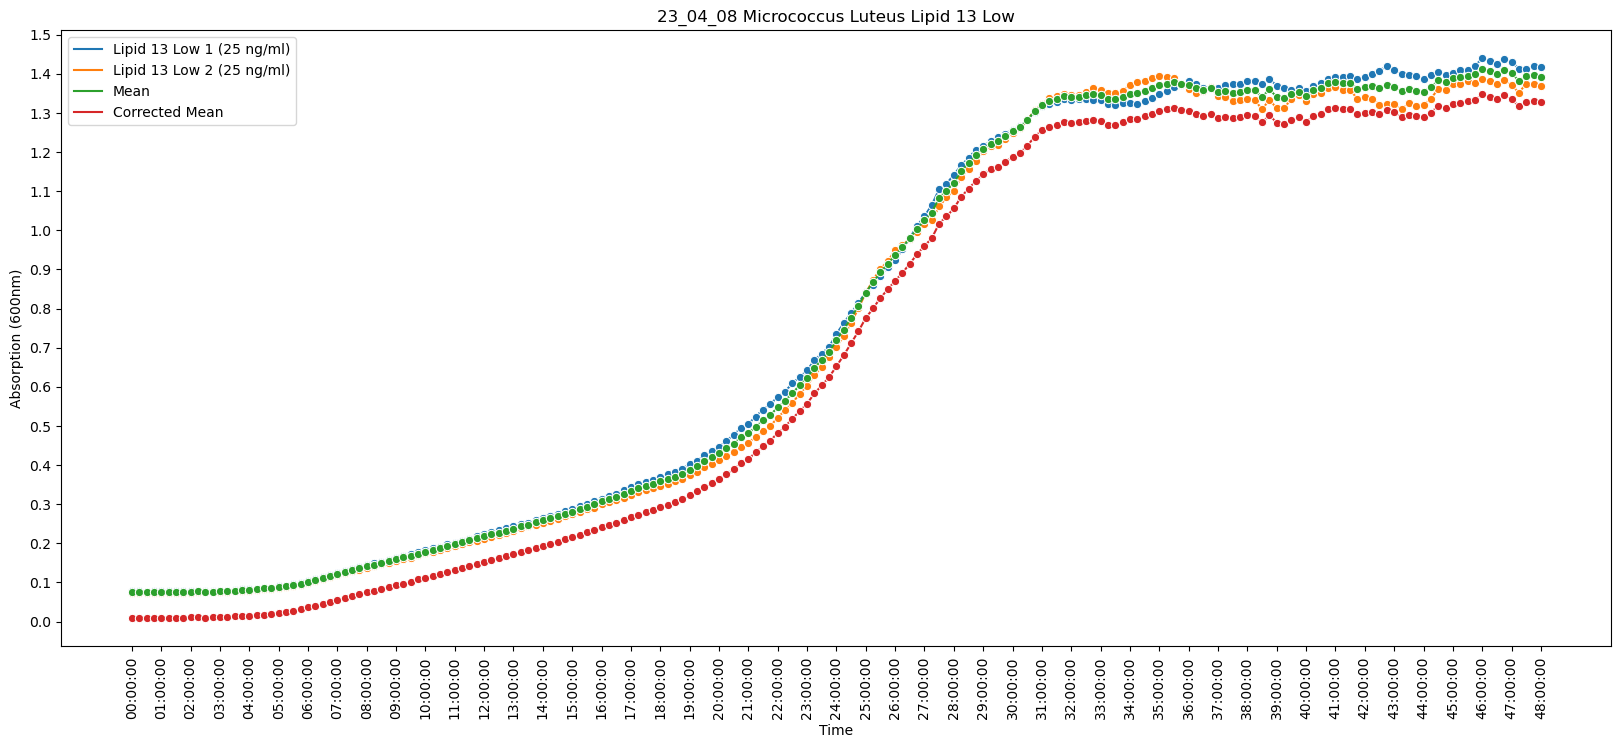

In [132]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 13 Low", thirteen_low)

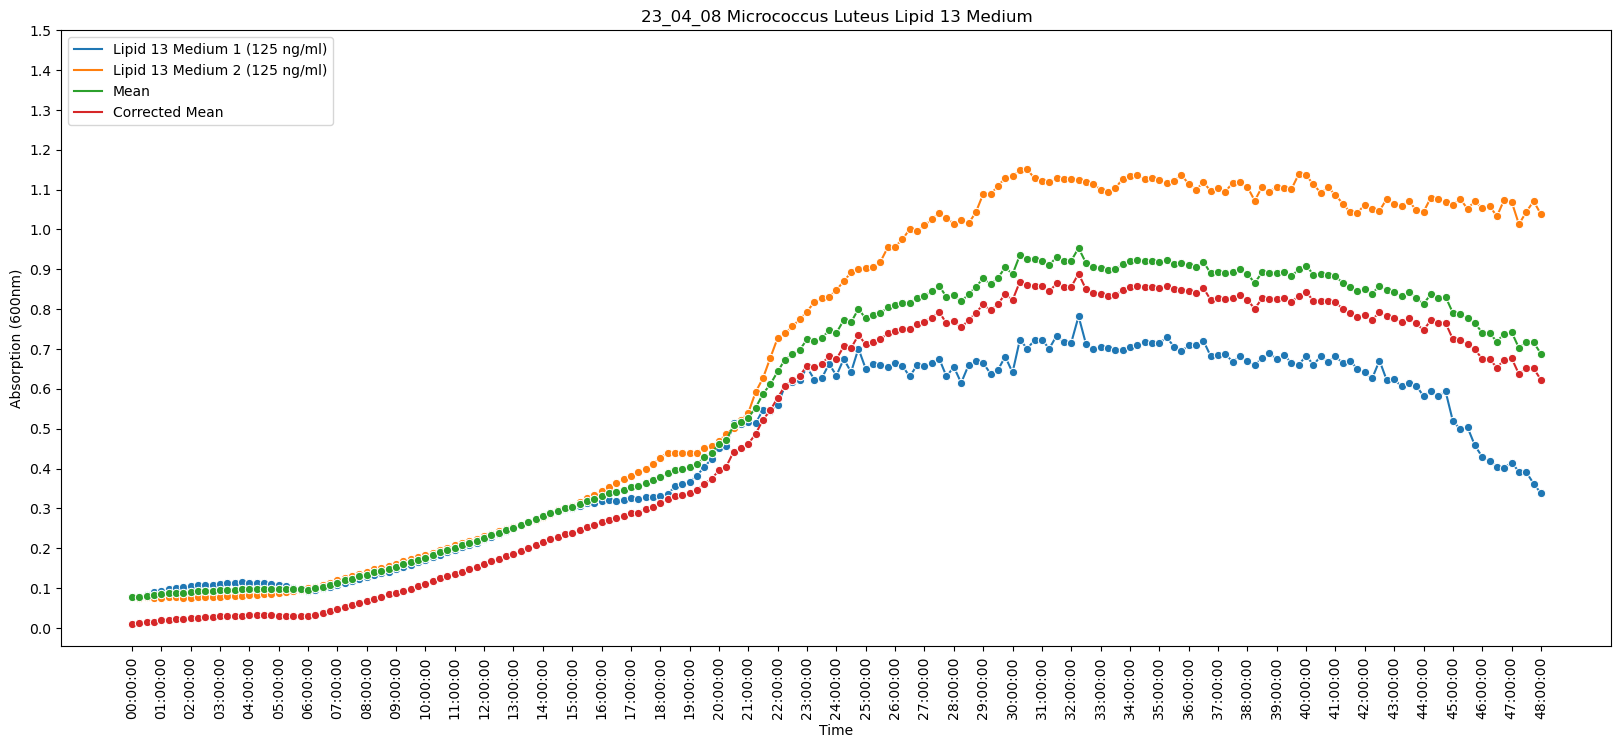

In [133]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 13 Medium", thirteen_medium)

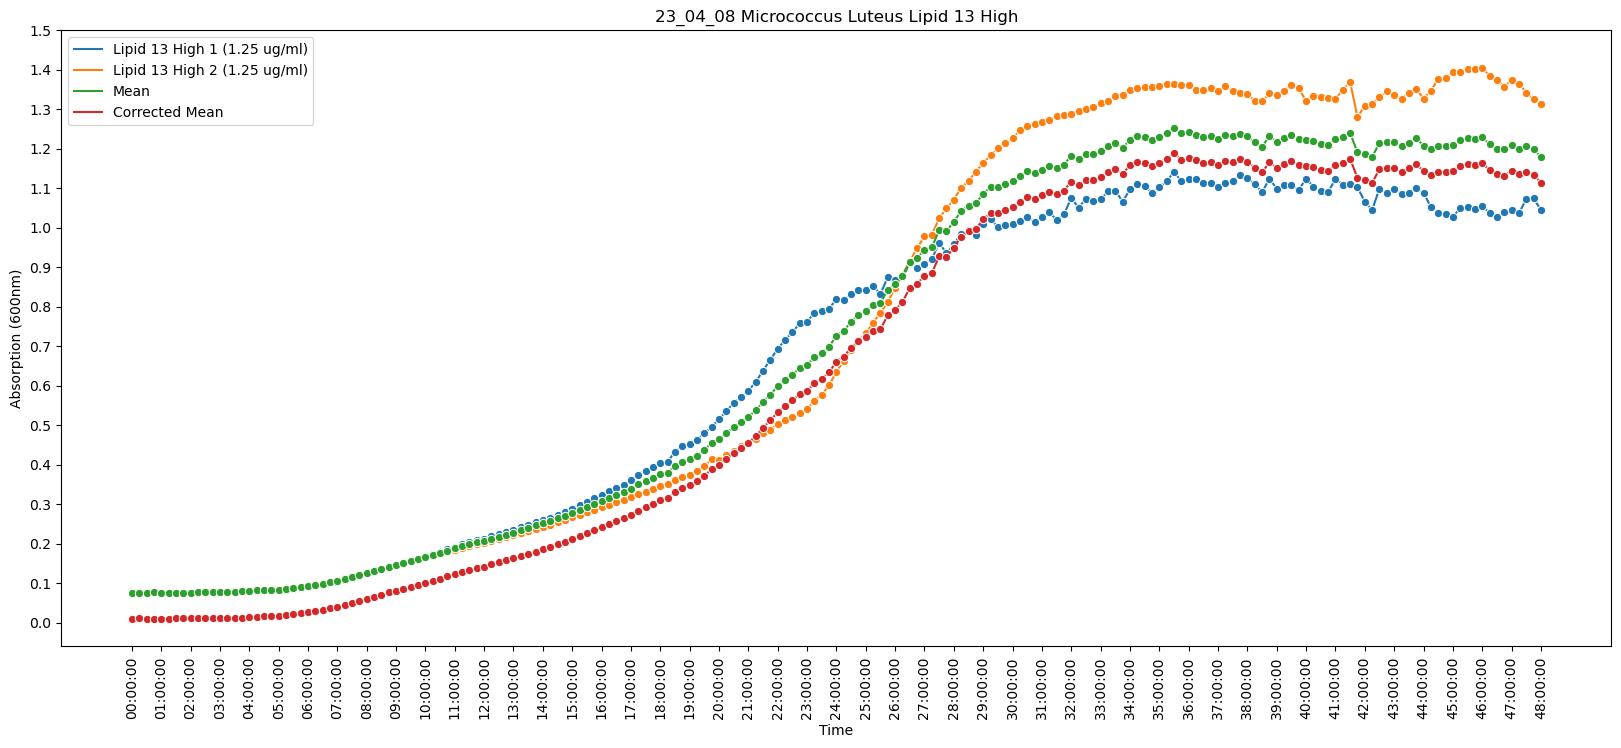

In [134]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 13 High", thirteen_high)

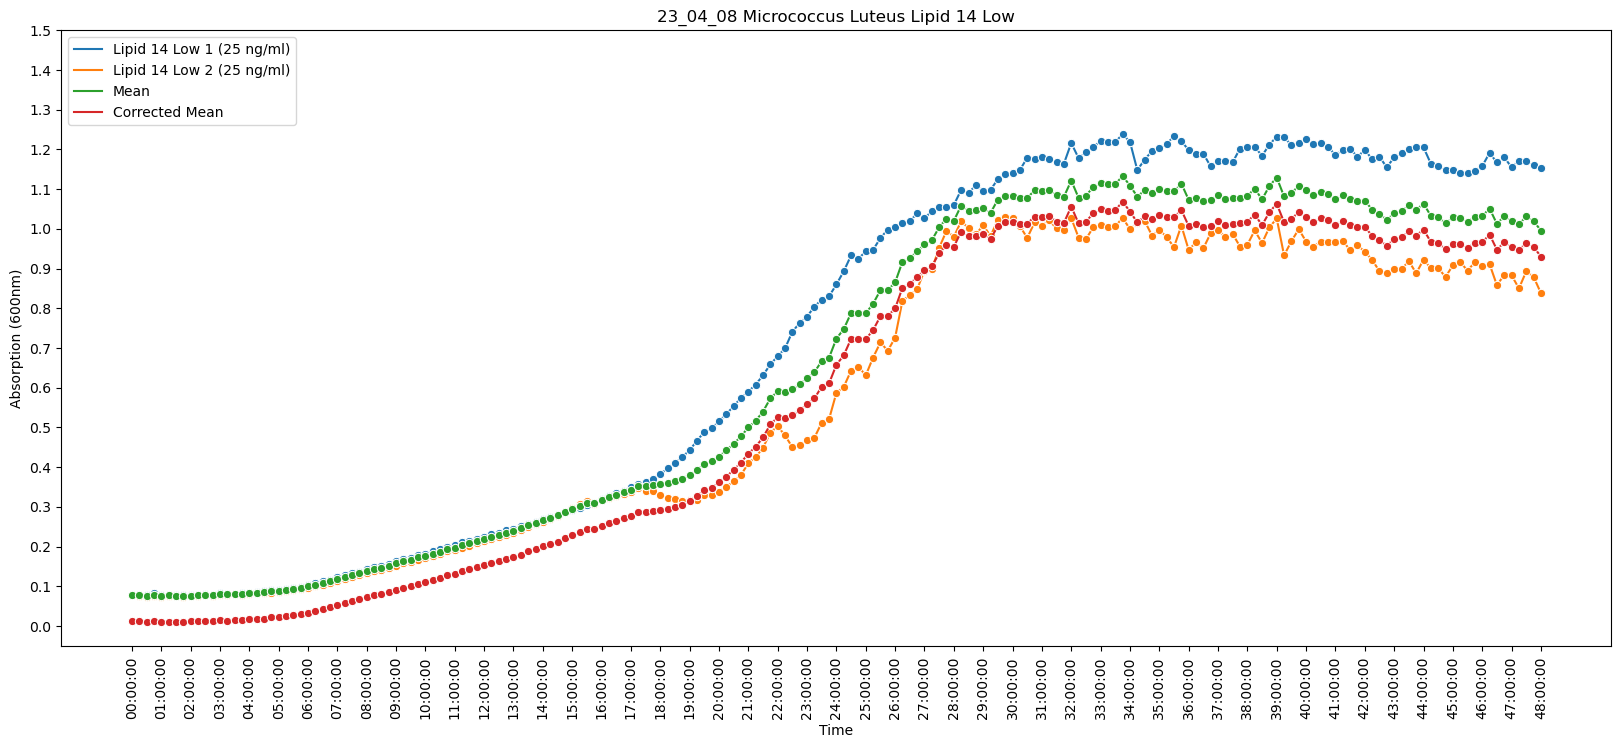

In [135]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 14 Low", fourteen_low)

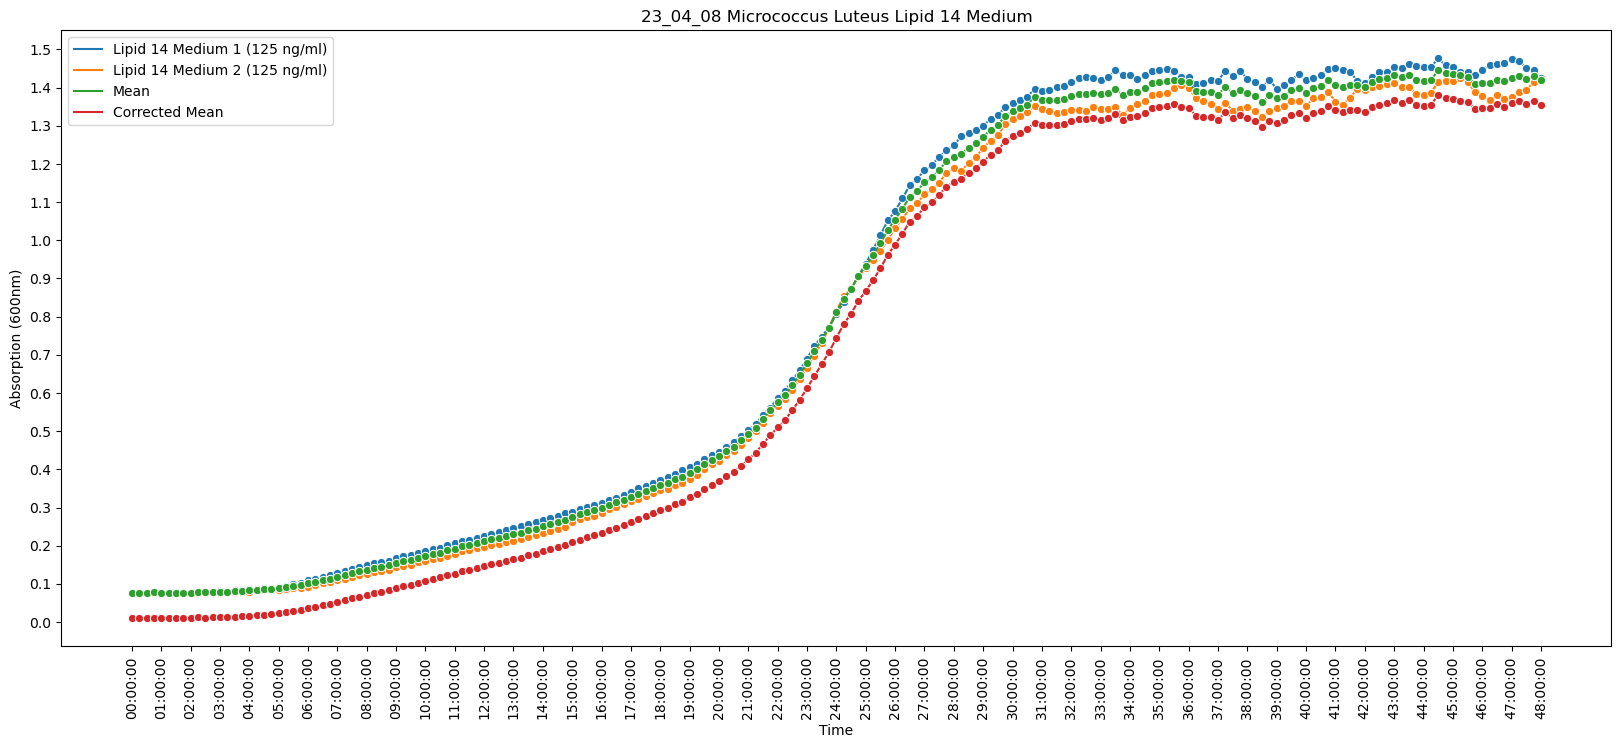

In [136]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 14 Medium", fourteen_medium)

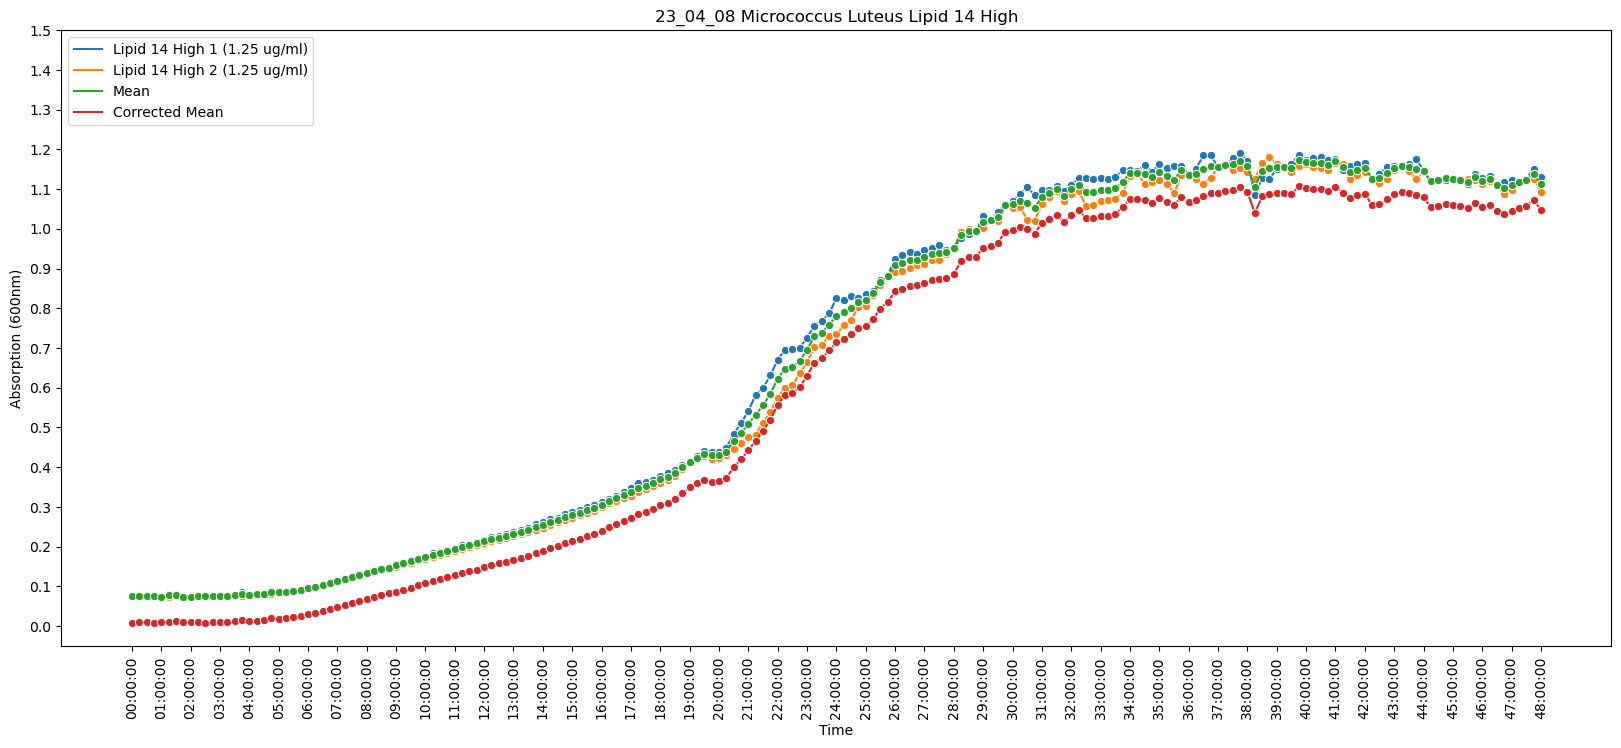

In [137]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 14 High", fourteen_high)

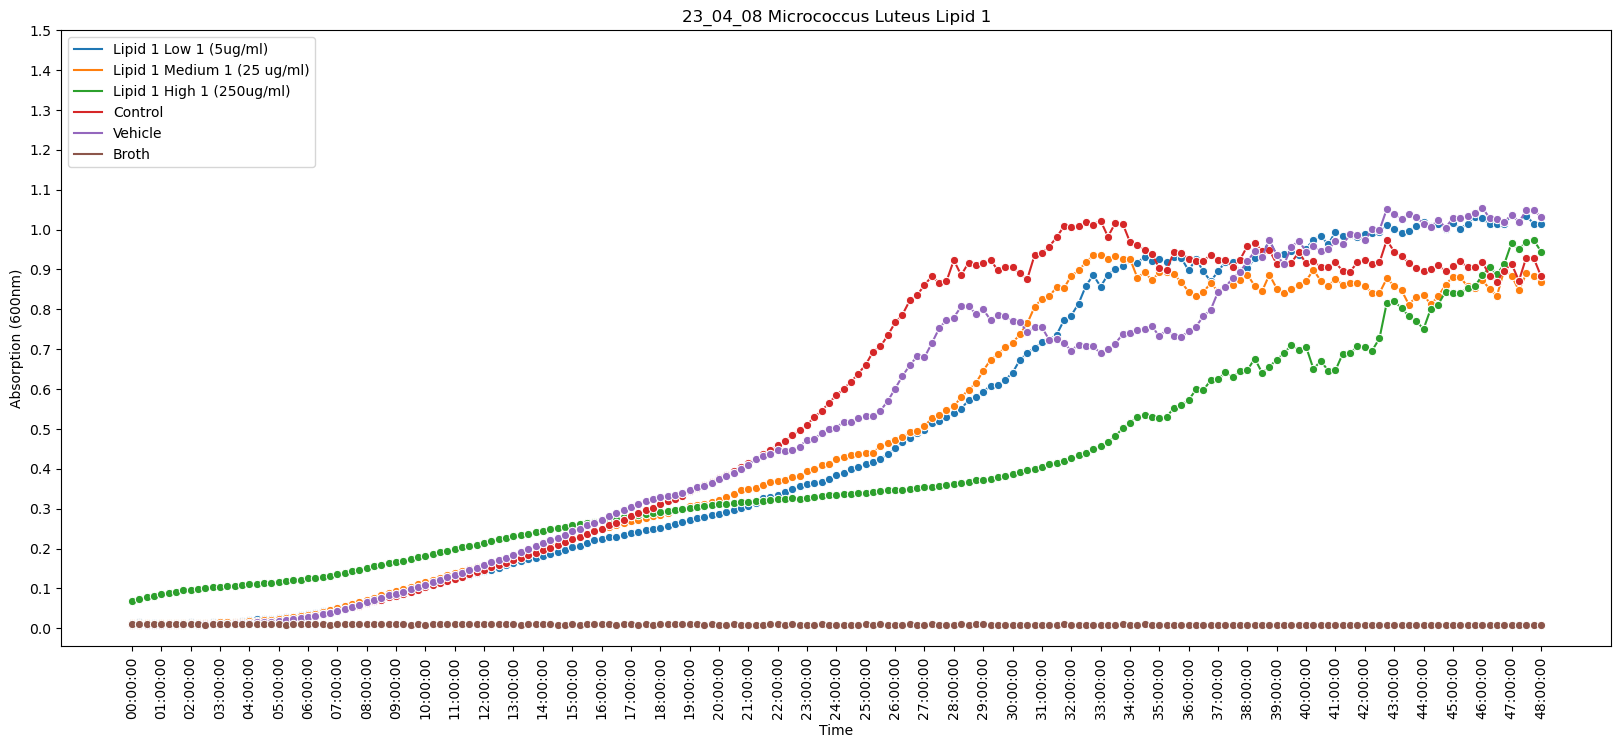

In [138]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 1", one)

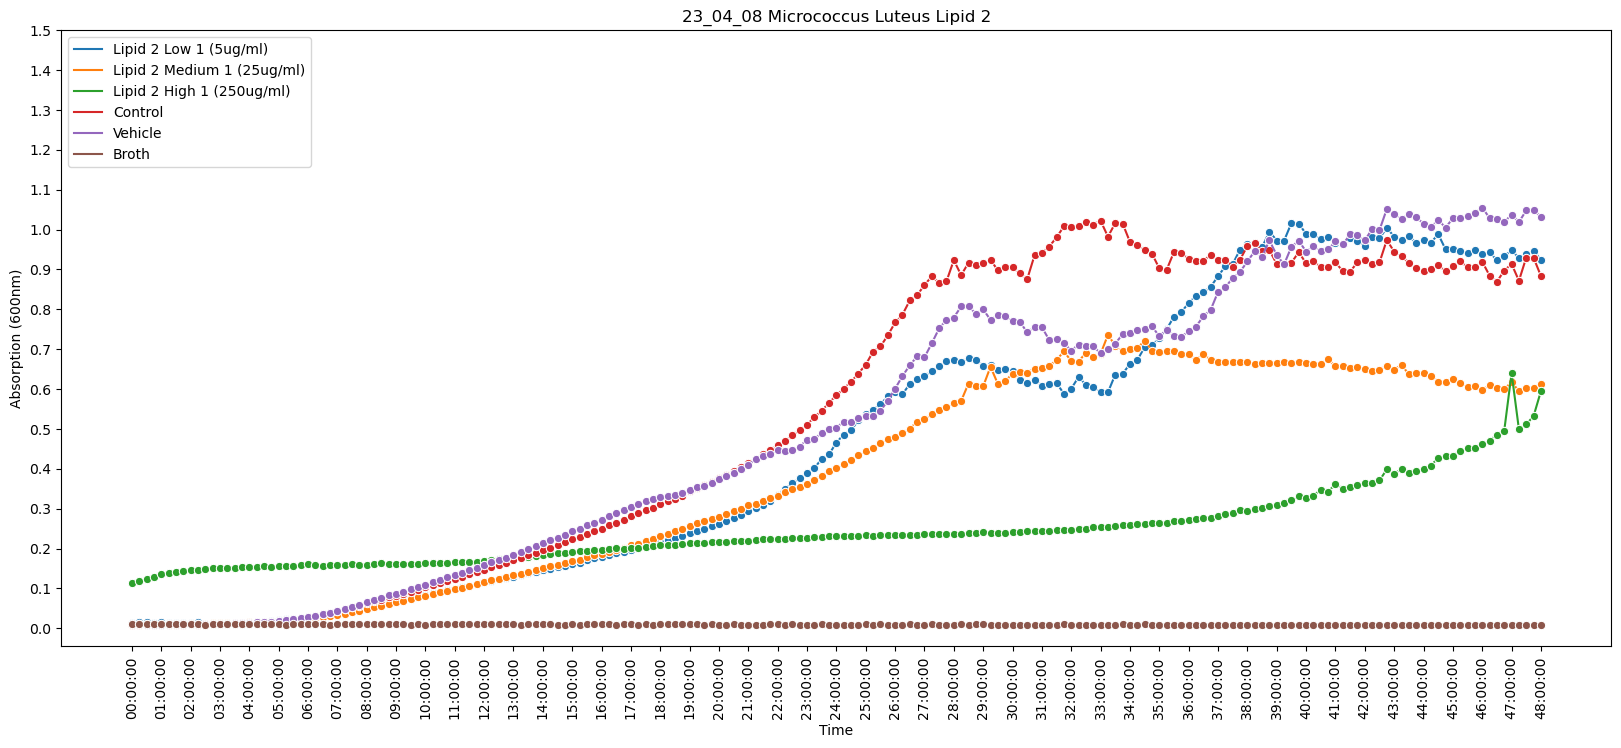

In [139]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 2", two)

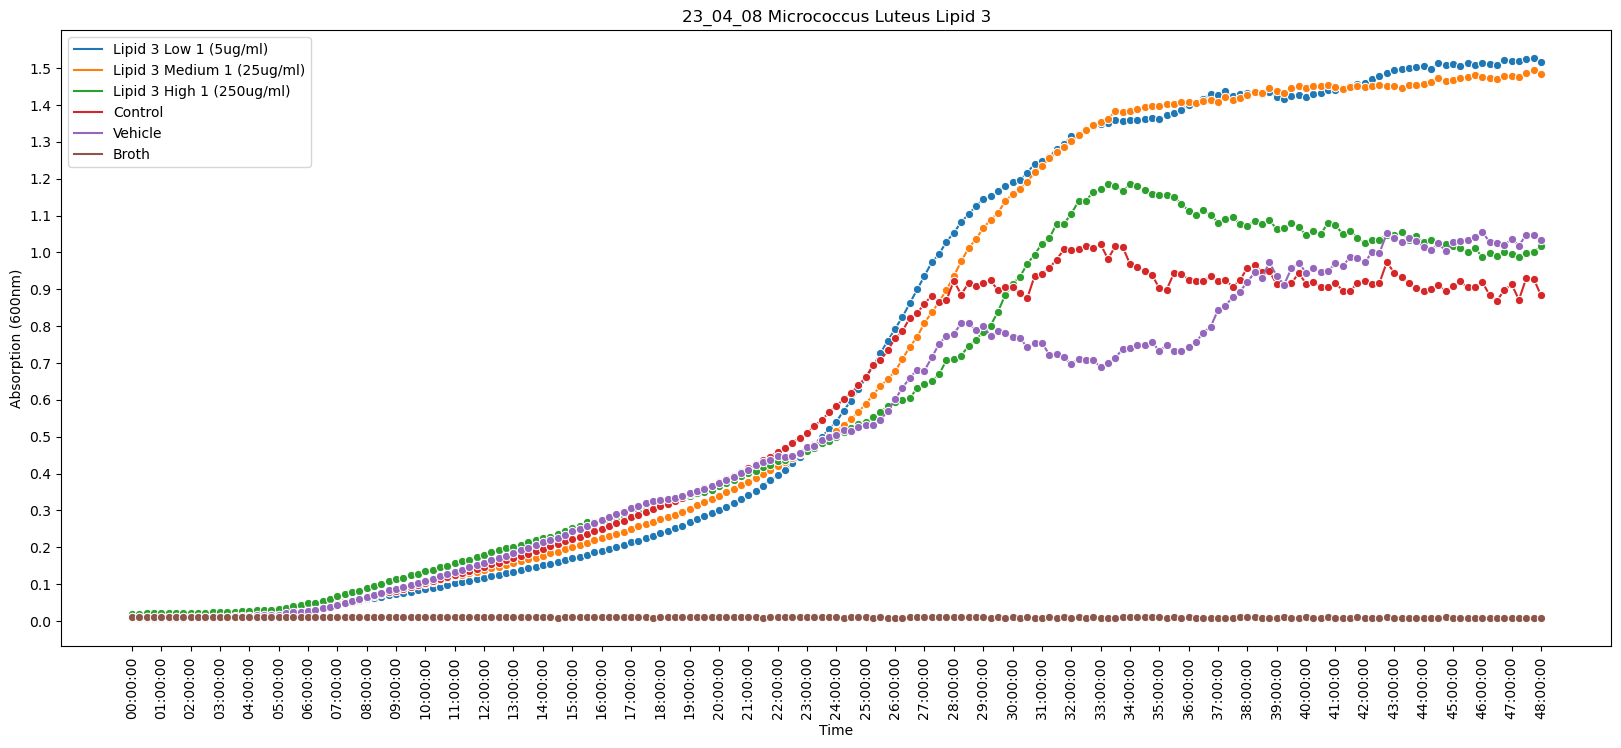

In [140]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 3", three)

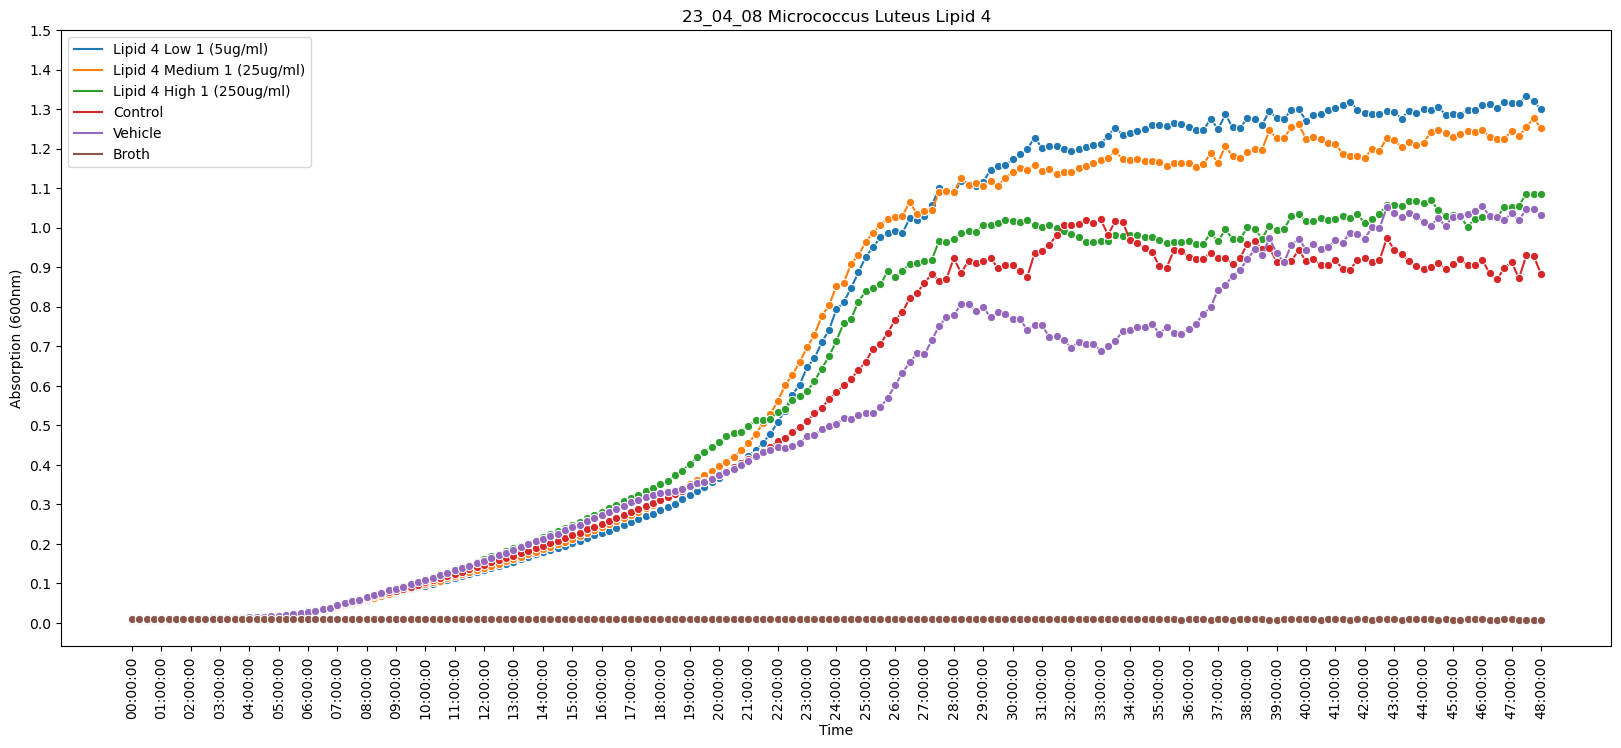

In [141]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 4", four)

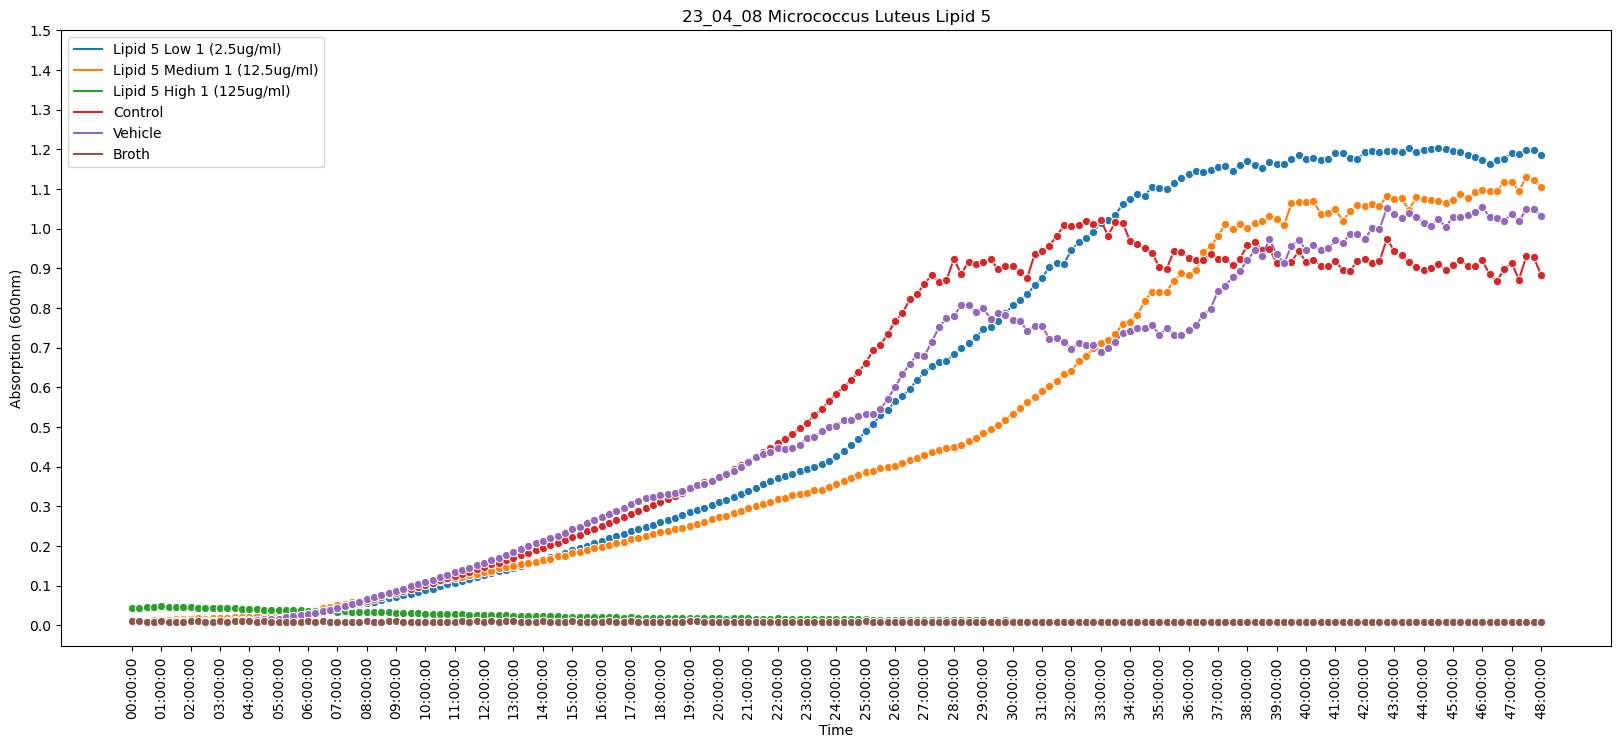

In [142]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 5", five)

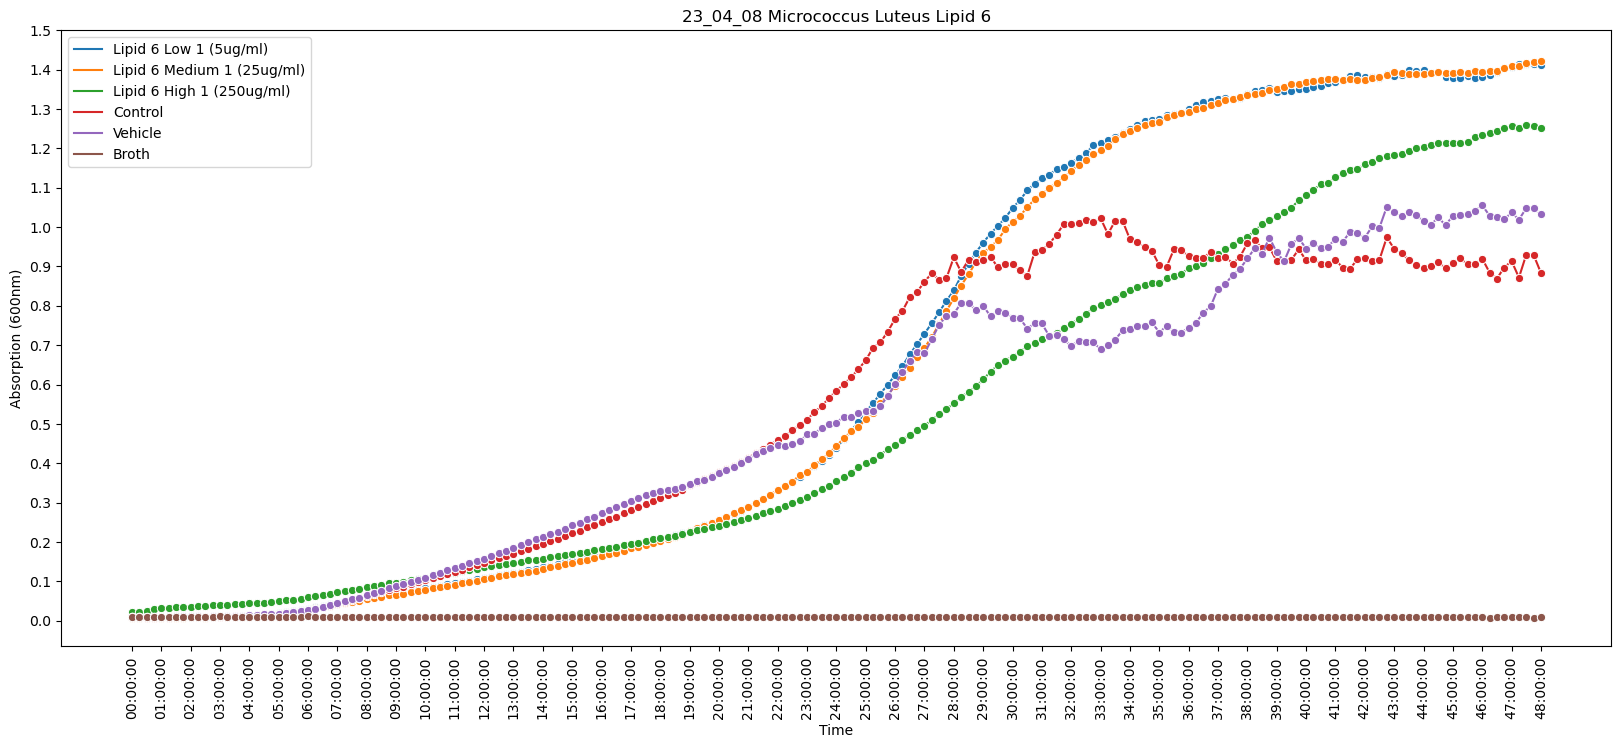

In [143]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 6", six)

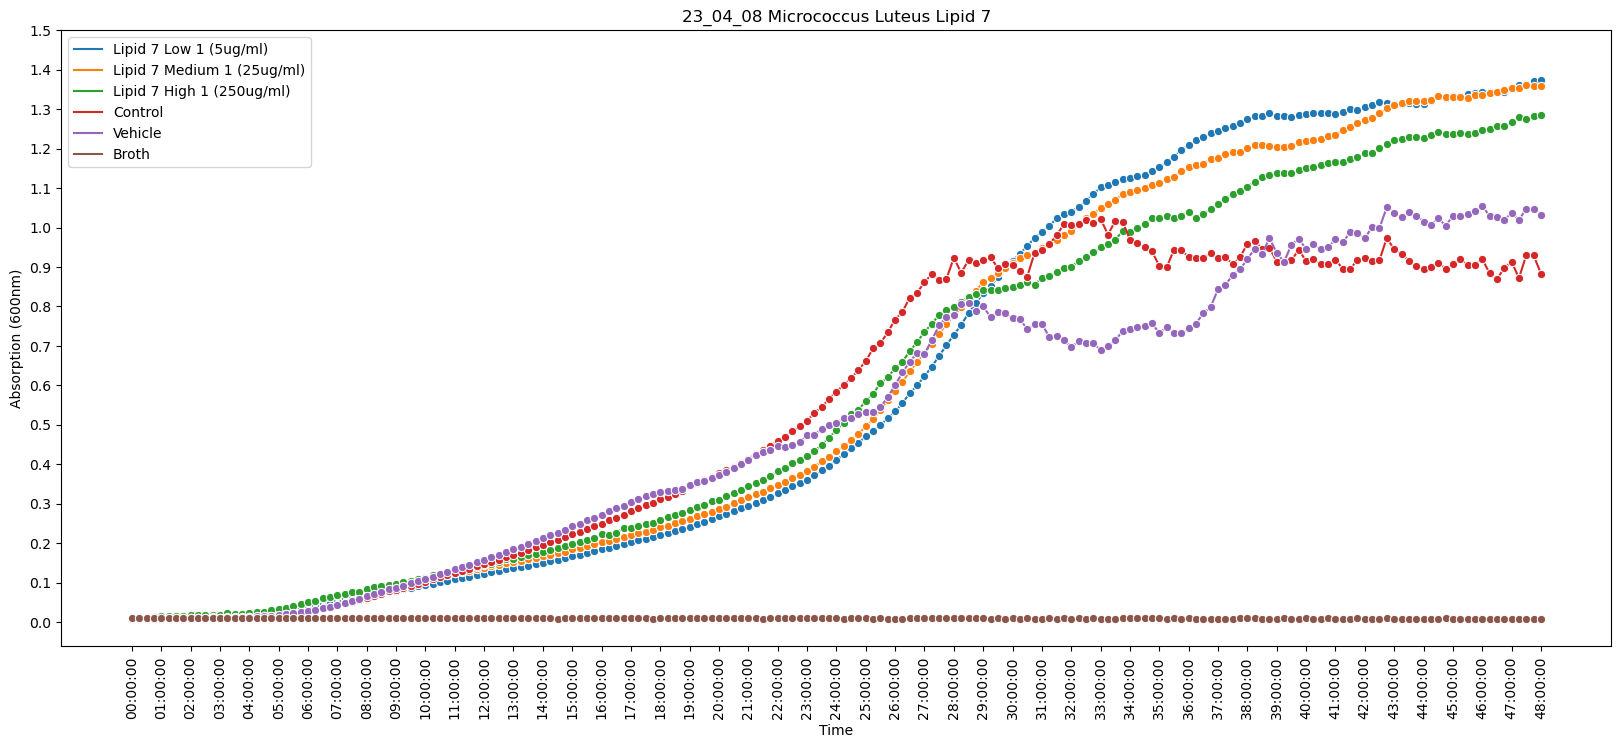

In [144]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 7", seven)

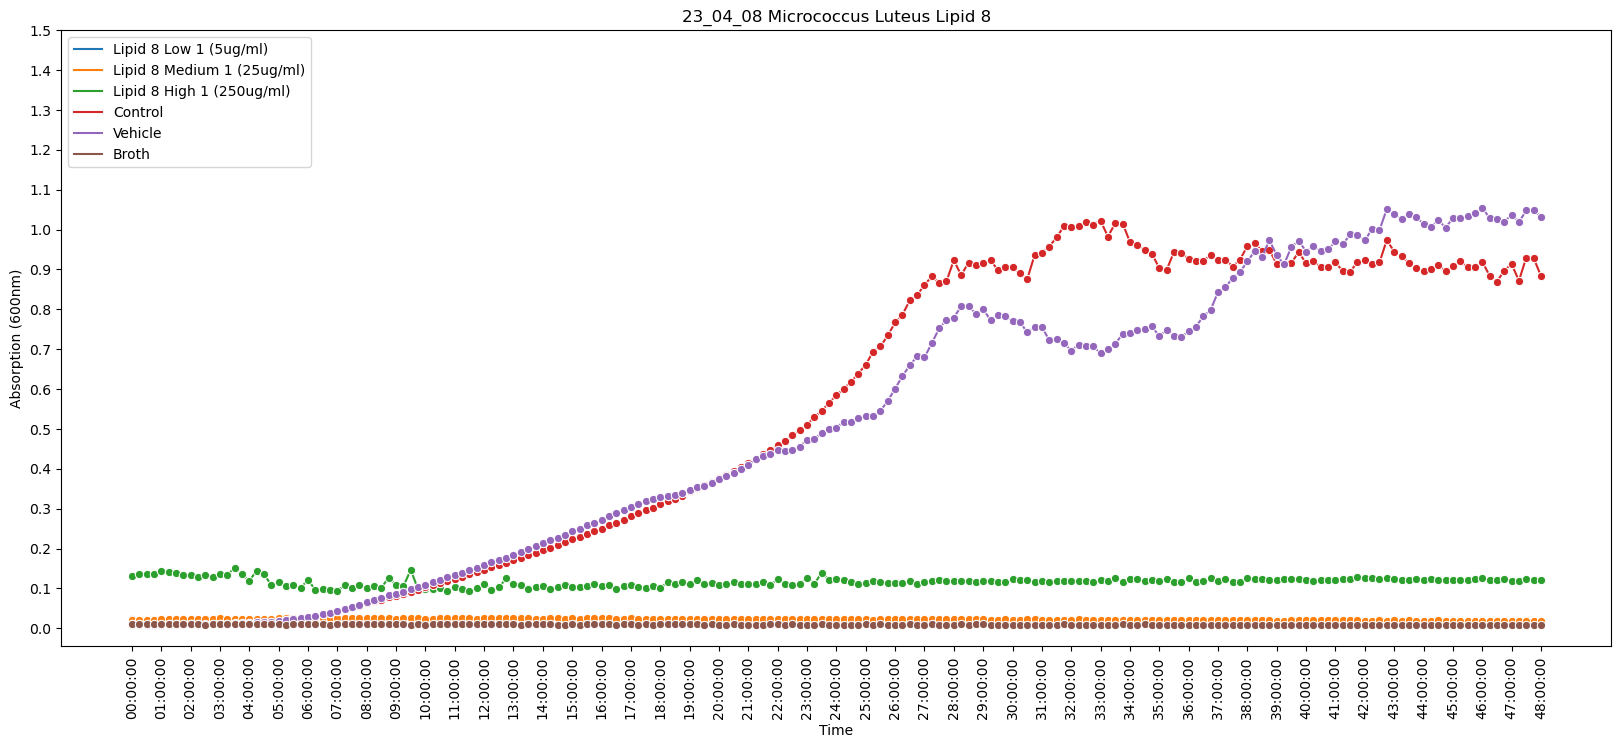

In [145]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 8", eight)

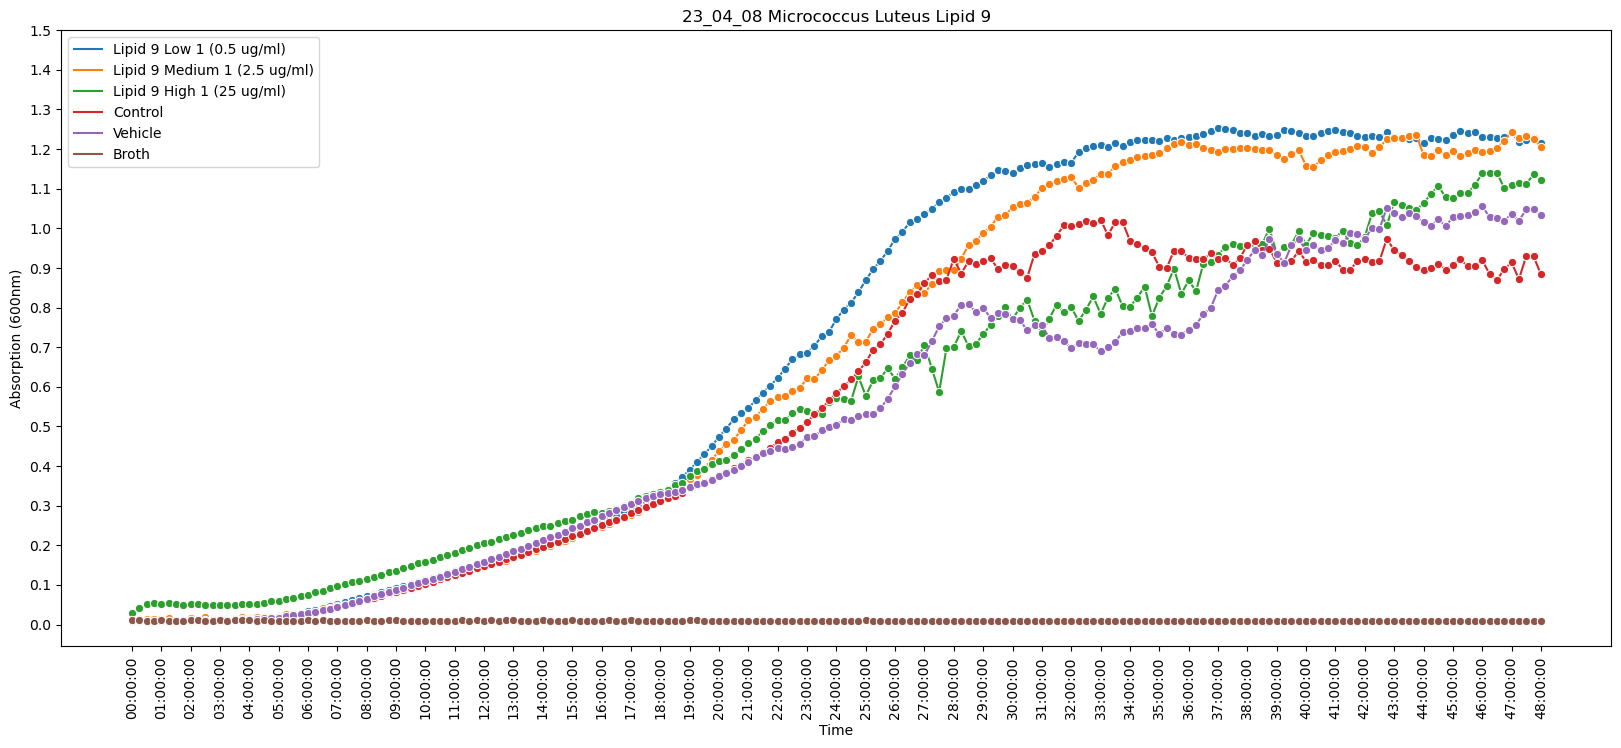

In [146]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 9", nine)

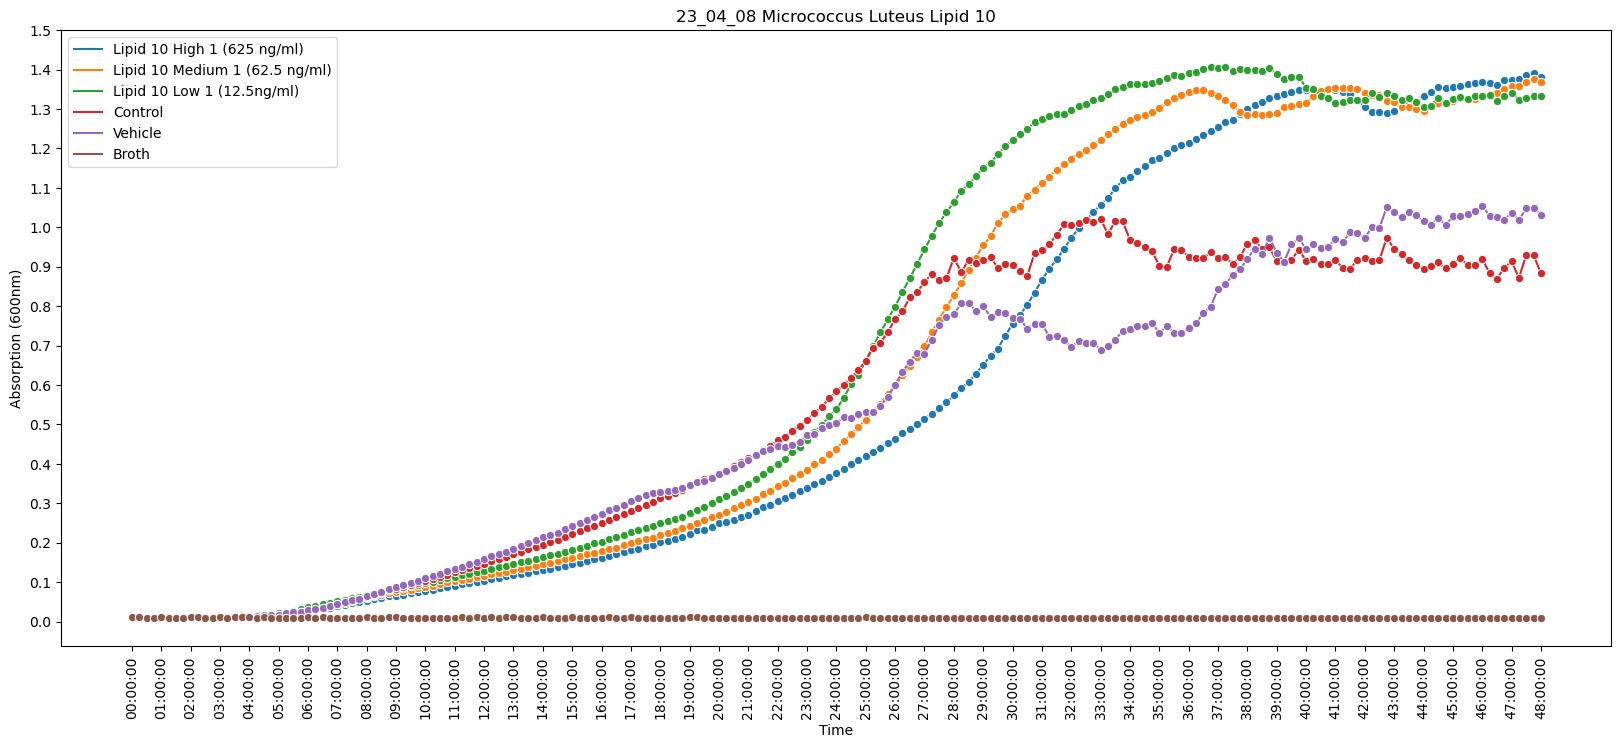

In [147]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 10", ten)

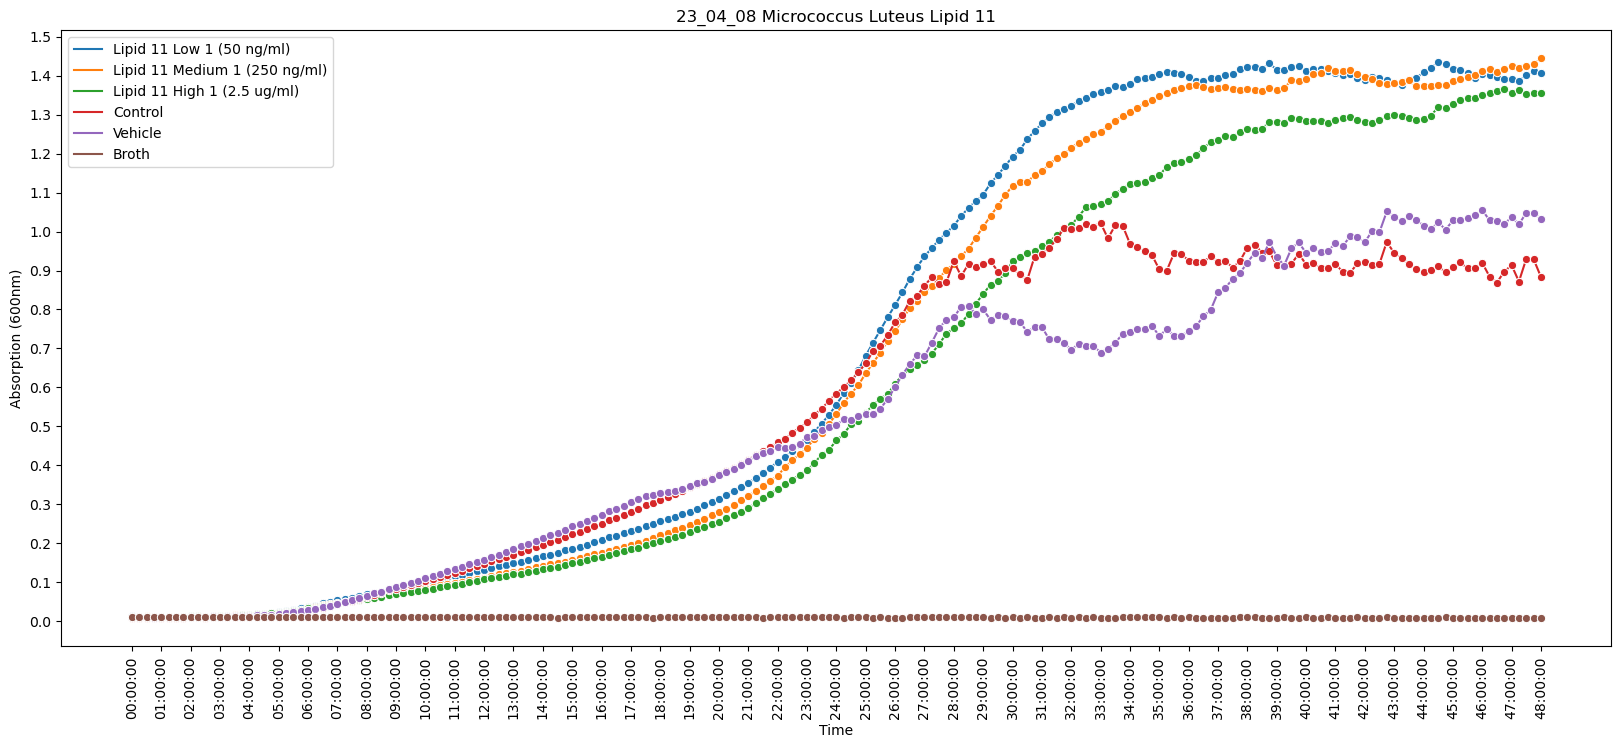

In [148]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 11", eleven)

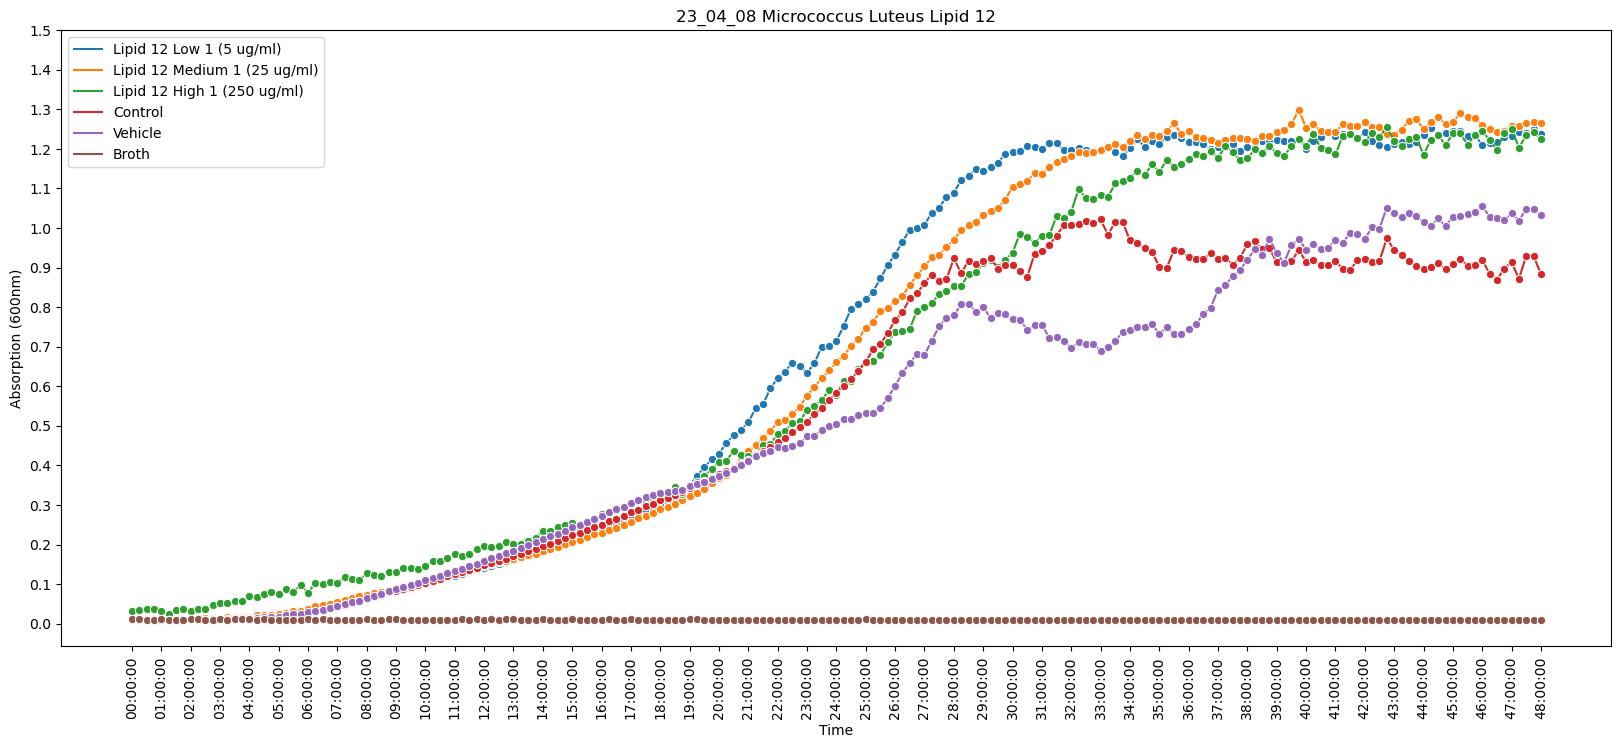

In [149]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 12", twelve)

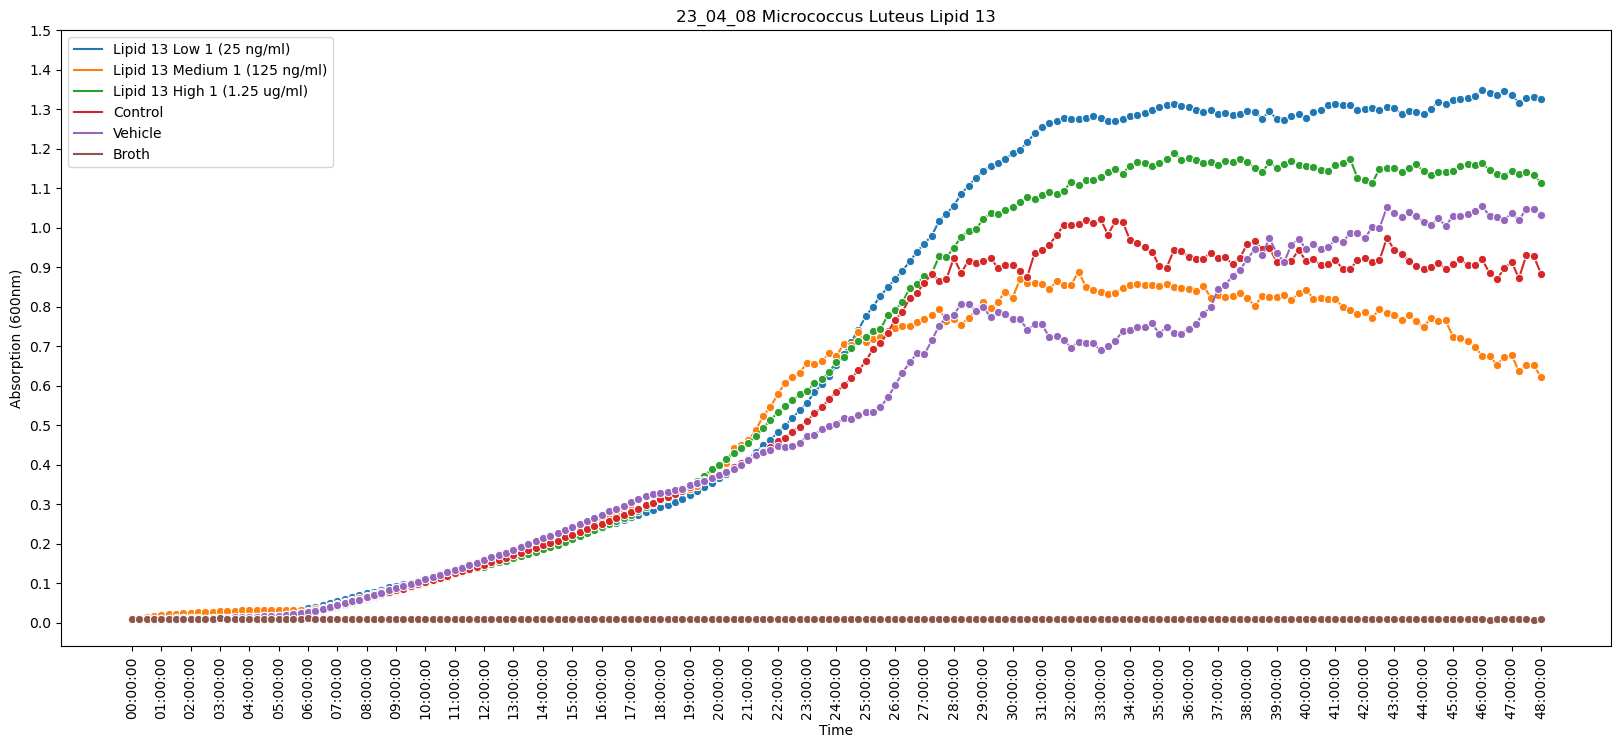

In [150]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 13", thirteen)

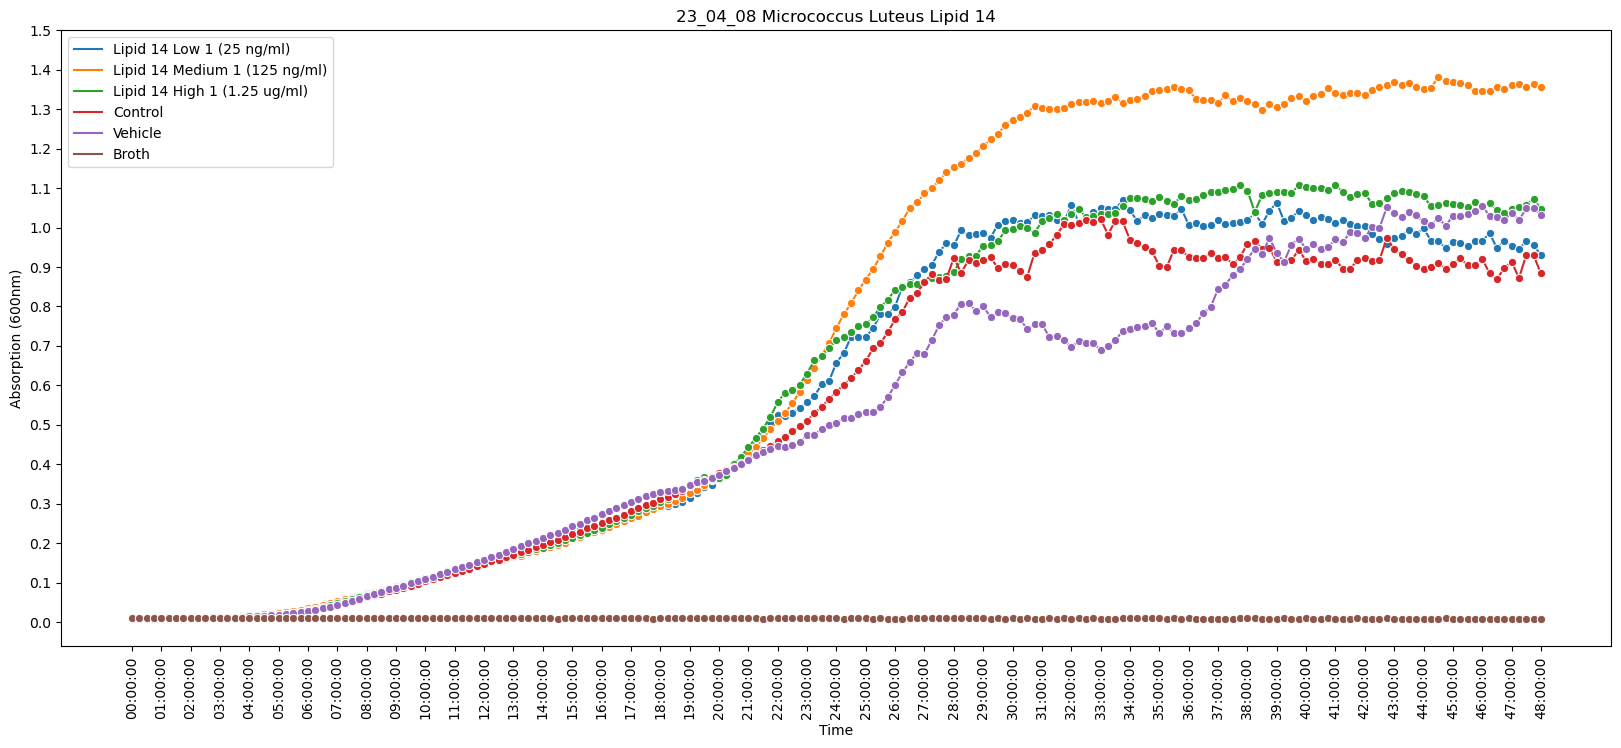

In [151]:
make_graph(f"{datetime.today().strftime('%y_%m_%d')} {strain} Lipid 14", fourteen)

In [152]:
def create_presentation(graph_list):
  prs=Presentation()
  lyt=prs.slide_layouts[6]
  
  for graph in graph_list:
    slide=prs.slides.add_slide(lyt)
    path = graph
    prs.slide_width = Inches(16)
    prs.slide_height = Inches(9)
    left=Inches(0)
    top=Inches(1.5)
    width=Inches(16)
    height=Inches(6.4)
    img=slide.shapes.add_picture(path,left,top,width,height)

  prs.save(f"{datetime.today().strftime('%y_%m_%d')} {strain} graphs.pptx")

In [153]:
create_presentation(graph_list)

In [154]:
print(f"Program was in run {datetime.now() - start}")

Program was in run 0:00:35.917626
